# **NO2 PREDICTION**

by Nicolás Goyena Serveto (******840)
Data Science and Engineering Degree

# Loading of the saved datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
#The following is required to print the plots inside the notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #High quality figures
import seaborn as sns
sns.set_theme()

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
training_no2_hourly_imputed_global_df = pd.read_csv("/content/drive/MyDrive/TFG/training_no2_hourly_imputed_global_df.csv")

In [ ]:
training_no2_hourly_imputed_global_df.set_index('FECHA', inplace=True)

In [ ]:
testing_no2_hourly_imputed_df=pd.read_csv("/content/drive/MyDrive/TFG/testing_no2_hourly_imputed_df.csv")

In [ ]:
testing_no2_hourly_imputed_df.set_index('FECHA', inplace=True)

In [ ]:
alldata=pd.concat([training_no2_hourly_imputed_global_df,testing_no2_hourly_imputed_df])
total_hours = len(alldata)
alldata['Trend'] = 1 - np.linspace(0, 0.5, total_hours)

# Add 'Policies' column
alldata['Policies'] = 1
alldata.loc[:'2018-11-30 23:00', 'Policies'] = 0

# Add 'COVID' column
alldata['COVID'] = 1
alldata.loc[:'2020-03-13 23:00', 'COVID'] = 0

# Remove 'PoliciesandCovid' column
alldata = alldata.drop(['PoliciesandCovid'], axis=1, errors='ignore')



In [ ]:
training_start_date = '2011-01-01 00:00'
training_end_date = '2018-01-01 00:00'
testing_start_date = '2018-01-01 00:00'
testing_end_date = '2021-01-01 00:00'

# Create training and testing DataFrames
training_no2_hourly_imputed_global_df = alldata.loc[training_start_date:training_end_date].copy()
testing_no2_hourly_imputed_df = alldata.loc[testing_start_date:testing_end_date].copy()


In [ ]:
testing_no2_hourly_imputed_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2018-01-01 00:00:00     33.00     11.00     12.00     23.00     32.00   
2018-01-01 01:00:00     64.00     33.00     26.00     43.00     41.00   
2018-01-01 02:00:00     63.00     27.00     39.00     34.00     26.00   
2018-01-01 03:00:00     51.00     16.00     17.00     29.00     22.00   
2018-01-01 04:00:00     57.00     11.00     14.00     18.00     28.00   
...                       ...       ...       ...       ...       ...   
2020-12-31 19:00:00     39.62     20.00     27.00     27.00     18.00   
2020-12-31 20:00:00     41.17     19.00     24.00     33.00     22.00   
2020-12-31 21:00:00     34.93     18.00     27.00     29.00     23.00   
2020-12-31 22:00:00     28.04     14.00     21.00     19.00     16.00   
2020-12-31 23:00:00     26.40     11.00     12.00     14.00     12.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2018-01-01 00:00:00      1.00      9.00     19.00     16.00     13.00  ...   
2018-01-01 01:00:00      6.00     13.00     29.00     43.00     40.00  ...   
2018-01-01 02:00:00      8.00     21.00     35.00     49.00     23.00  ...   
2018-01-01 03:00:00      3.00     11.00     38.00     29.00     14.00  ...   
2018-01-01 04:00:00      5.00     13.00     29.00     22.00     14.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-12-31 19:00:00      3.00     23.00     17.00     32.00     23.00  ...   
2020-12-31 20:00:00      4.00     21.00     16.00     33.00     22.00  ...   
2020-12-31 21:00:00      4.00     22.00     21.00     26.00     21.00  ...   
2020-12-31 22:00:00      2.00     17.00     18.00     20.00     17.00  ...   
2020-12-31 23:00:00      2.00     10.00     11.00     16.00     13.00  ...   

                     DayOfWeek_Saturday  DayOfWeek_Sunday  TEMPERATURA  \
FECHA                                                                    
2018-01-01 00:00:00                   0                 0         7.00   
2018-01-01 01:00:00                   0                 0         6.70   
2018-01-01 02:00:00                   0                 0         5.70   
2018-01-01 03:00:00                   0                 0         5.90   
2018-01-01 04:00:00                   0                 0         5.20   
...                                 ...               ...          ...   
2020-12-31 19:00:00                   0                 0         5.10   
2020-12-31 20:00:00                   0                 0         5.20   
2020-12-31 21:00:00                   0                 0         5.10   
2020-12-31 22:00:00                   0                 0         4.60   
2020-12-31 23:00:00                   0                 0         3.20   

                     VIENTO  PRECIPITACION  PRESION  WorkingDay  Trend  \
FECHA                                                                    
2018-01-01 00:00:00   15.00           0.00  9519.00           0   0.65   
2018-01-01 01:00:00   11.00           0.00  9520.86           0   0.65   
2018-01-01 02:00:00    6.00           0.00  9522.71           0   0.65   
2018-01-01 03:00:00   11.00           0.00  9524.57           0   0.65   
2018-01-01 04:00:00    3.00           0.00  9526.43           0   0.65   
...                     ...            ...      ...         ...    ...   
2020-12-31 19:00:00   25.50           0.00  9338.00           1   0.50   
2020-12-31 20:00:00   22.00           0.00  9338.00           1   0.50   
2020-12-31 21:00:00   22.50           0.00  9338.00           1   0.50   
2020-12-31 22:00:00   14.50           5.00  9338.00           1   0.50   
2020-12-31 23:00:00   19.00           1.00  9338.00           1   0.50   

                     Policies  COVID  
FECHA                                 
2018-01-01 00:00:00         0      0  
2018-01-01 01

In [ ]:
training_no2_hourly_imputed_global_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2017-12-31 19:00:00     43.00     40.00     31.00     33.00     33.00   
2017-12-31 20:00:00     40.00     42.00     27.00     47.00     35.00   
2017-12-31 21:00:00     64.00     28.00     23.00     26.00     34.00   
2017-12-31 22:00:00     42.00     13.00     13.00     16.00     20.00   
2017-12-31 23:00:00     20.00      9.00      9.00     13.00     16.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-12-31 19:00:00      6.00     12.00     36.00     45.00     49.00  ...   
2017-12-31 20:00:00      6.00     16.00     39.00     48.00     48.00  ...   
2017-12-31 21:00:00      8.00     15.00     37.00     35.00     19.00  ...   
2017-12-31 22:00:00      6.00     10.00     29.00     27.00      9.00  ...   
2017-12-31 23:00:00      1.00     10.00     21.00     10.00      5.00  ...   

                     DayOfWeek_Saturday  DayOfWeek_Sunday  TEMPERATURA  \
FECHA                                                                    
2011-01-01 00:00:00                   1                 0         7.20   
2011-01-01 01:00:00                   1                 0         7.50   
2011-01-01 02:00:00                   1                 0         7.40   
2011-01-01 03:00:00                   1                 0         7.20   
2011-01-01 04:00:00                   1                 0         6.80   
...                                 ...               ...          ...   
2017-12-31 19:00:00                   0                 1         8.10   
2017-12-31 20:00:00                   0                 1         8.40   
2017-12-31 21:00:00                   0                 1         7.40   
2017-12-31 22:00:00                   0                 1         7.30   
2017-12-31 23:00:00                   0                 1         7.20   

                     VIENTO  PRECIPITACION  PRESION  WorkingDay  Trend  \
FECHA                                                                    
2011-01-01 00:00:00    7.00           0.00  9410.00           0   1.00   
2011-01-01 01:00:00    9.00           0.00  9411.00           0   1.00   
2011-01-01 02:00:00    9.00           0.00  9412.00           0   1.00   
2011-01-01 03:00:00    6.00           0.00  9413.00           0   1.00   
2011-01-01 04:00:00    6.00           0.00  9414.00           0   1.00   
...                     ...            ...      ...         ...    ...   
2017-12-31 19:00:00   10.00           0.00  9453.00           0   0.65   
2017-12-31 20:00:00   15.00           0.00  9453.00           0   0.65   
2017-12-31 21:00:00   13.00           0.00  9453.00           0   0.65   
2017-12-31 22:00:00    4.00           0.00  9453.00           0   0.65   
2017-12-31 23:00:00   15.00           0.00  9453.00           0   0.65   

                     Policies  COVID  
FECHA                                 
2011-01-01 00:00:00         0      0  
2011-01-01 01

In [ ]:
station_columns = ['28079008', '28079011', '28079016', '28079017', '28079018', '28079024', '28079027', '28079035', '28079036', '28079038', '28079039', '28079040', '28079048', '28079050', '28079054', '28079055', '28079057', '28079058', '28079059', '28079060']

# Melt the DataFrame to combine NO2 values from different stations into a single column
df_melted = pd.melt(training_no2_hourly_imputed_global_df, id_vars=['Day', 'Month', 'Year','Hour', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'TEMPERATURA', 'VIENTO', 'PRECIPITACION', 'PRESION', 'WorkingDay', 'Trend','Policies','COVID'], value_vars=station_columns, var_name='Station', value_name='NO2_Value')
df_melted_test = pd.melt(testing_no2_hourly_imputed_df, id_vars=['Day', 'Month', 'Year','Hour', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'TEMPERATURA', 'VIENTO', 'PRECIPITACION', 'PRESION', 'WorkingDay', 'Trend','Policies','COVID'], value_vars=station_columns, var_name='Station', value_name='NO2_Value')

In [ ]:
df_melted['Timestamp'] = pd.to_datetime(df_melted[['Year', 'Month', 'Day', 'Hour']])
df_melted_test['Timestamp'] = pd.to_datetime(df_melted_test[['Year', 'Month', 'Day', 'Hour']])

df_melted.set_index('Timestamp', inplace=True)
df_melted_test.set_index('Timestamp', inplace=True)

In [ ]:
df_melted_noweekdays=pd.get_dummies(df_melted, columns=['Station'], prefix='Station')
df_melted_test_noweekdays=pd.get_dummies(df_melted_test, columns=['Station'], prefix='Station')

In [ ]:
 df_melted_noweekdays=df_melted.drop(['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday','DayOfWeek_Friday','DayOfWeek_Saturday','DayOfWeek_Sunday'], axis=1)
 df_melted_noweekdays=pd.get_dummies(df_melted_noweekdays, columns=['Station'], prefix='Station')
 df_melted_test_noweekdays=df_melted_test.drop(['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday','DayOfWeek_Friday','DayOfWeek_Saturday','DayOfWeek_Sunday'], axis=1)
 df_melted_test_noweekdays=pd.get_dummies(df_melted_test_noweekdays, columns=['Station'], prefix='Station')

In [ ]:
for col in  df_melted_noweekdays.columns:
  print(col)

Day
Month
Year
Hour
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
Trend
Policies
COVID
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


In [ ]:
for col in df_melted_test_noweekdays.columns:
  print(col)

Day
Month
Year
Hour
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
Trend
Policies
COVID
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


In [ ]:
df_melted_test_noweekdays

Day  Month  Year  Hour  TEMPERATURA  VIENTO  \
Timestamp                                                          
2018-01-01 00:00:00    1      1  2018     0         7.00   15.00   
2018-01-01 01:00:00    1      1  2018     1         6.70   11.00   
2018-01-01 02:00:00    1      1  2018     2         5.70    6.00   
2018-01-01 03:00:00    1      1  2018     3         5.90   11.00   
2018-01-01 04:00:00    1      1  2018     4         5.20    3.00   
...                  ...    ...   ...   ...          ...     ...   
2020-12-31 19:00:00   31     12  2020    19         5.10   25.50   
2020-12-31 20:00:00   31     12  2020    20         5.20   22.00   
2020-12-31 21:00:00   31     12  2020    21         5.10   22.50   
2020-12-31 22:00:00   31     12  2020    22         4.60   14.50   
2020-12-31 23:00:00   31     12  2020    23         3.20   19.00   

                     PRECIPITACION  PRESION  WorkingDay  Trend  ...  \
Timestamp                                                       ...   
2018-01-01 00:00:00           0.00  9519.00           0   0.65  ...   
2018-01-01 01:00:00           0.00  9520.86           0   0.65  ...   
2018-01-01 02:00:00           0.00  9522.71           0   0.65  ...   
2018-01-01 03:00:00           0.00  9524.57           0   0.65  ...   
2018-01-01 04:00:00           0.00  9526.43           0   0.65  ...   
...                            ...      ...         ...    ...  ...   
2020-12-31 19:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 20:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 21:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 22:00:00           5.00  9338.00           1   0.50  ...   
2020-12-31 23:00:00           1.00  9338.00           1   0.50  ...   

                     Station_28079039  Station_28079040  Station_28079048  \
Timestamp                                                                   
2018-01-01 00:00:00                 0                 0                 0   
2018-01-01 01:00:00                 0                 0                 0   
2018-01-01 02:00:00                 0                 0                 0   
2018-01-01 03:00:00                 0                 0                 0   
2018-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2020-12-31 19:00:00                 0                 0                 0   
2020-12-31 20:00:00                 0                 0                 0   
2020-12-31 21:00:00                 0                 0                 0   
2020-12-31 22:00:00                 0                 0                 0   
2020-12-31 23:00:00                 0                 0                 0   

                     Station_28079050  Station_28079054  Station_28079055  \
Timestamp                                                                   
2018-01-01 00:00:00                 0                 0                 0   
2018-01-01 01:00:00                 0                 0                 0   
2018-01-01 02:00:00                 0                 0                 0   
2018-01-01 03:00:00                 0                 0                 0   
2018-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2020-12-31 19:00:00                 0                 0                 0   
2020-12-31 20:00:00                 0                 0                 0   
2020-12-31 21:00:00                 0                 0                 0   
2020-12-31 22:00:00                 0                 0                 0   
2020-12-31 23:00:00                 0                 0                 0   

                     Station_28079057  Station_28079058  Station_28079059  \
Timestamp                                                                   
2018-01-01 00:00:00                 0                 

In [ ]:
alldata_melted=pd.concat([df_melted_noweekdays,df_melted_test_noweekdays])

In [ ]:
alldata_melted

Day  Month  Year  Hour  TEMPERATURA  VIENTO  \
Timestamp                                                          
2011-01-01 00:00:00    1      1  2011     0         7.20    7.00   
2011-01-01 01:00:00    1      1  2011     1         7.50    9.00   
2011-01-01 02:00:00    1      1  2011     2         7.40    9.00   
2011-01-01 03:00:00    1      1  2011     3         7.20    6.00   
2011-01-01 04:00:00    1      1  2011     4         6.80    6.00   
...                  ...    ...   ...   ...          ...     ...   
2020-12-31 19:00:00   31     12  2020    19         5.10   25.50   
2020-12-31 20:00:00   31     12  2020    20         5.20   22.00   
2020-12-31 21:00:00   31     12  2020    21         5.10   22.50   
2020-12-31 22:00:00   31     12  2020    22         4.60   14.50   
2020-12-31 23:00:00   31     12  2020    23         3.20   19.00   

                     PRECIPITACION  PRESION  WorkingDay  Trend  ...  \
Timestamp                                                       ...   
2011-01-01 00:00:00           0.00  9410.00           0   1.00  ...   
2011-01-01 01:00:00           0.00  9411.00           0   1.00  ...   
2011-01-01 02:00:00           0.00  9412.00           0   1.00  ...   
2011-01-01 03:00:00           0.00  9413.00           0   1.00  ...   
2011-01-01 04:00:00           0.00  9414.00           0   1.00  ...   
...                            ...      ...         ...    ...  ...   
2020-12-31 19:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 20:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 21:00:00           0.00  9338.00           1   0.50  ...   
2020-12-31 22:00:00           5.00  9338.00           1   0.50  ...   
2020-12-31 23:00:00           1.00  9338.00           1   0.50  ...   

                     Station_28079039  Station_28079040  Station_28079048  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 02:00:00                 0                 0                 0   
2011-01-01 03:00:00                 0                 0                 0   
2011-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2020-12-31 19:00:00                 0                 0                 0   
2020-12-31 20:00:00                 0                 0                 0   
2020-12-31 21:00:00                 0                 0                 0   
2020-12-31 22:00:00                 0                 0                 0   
2020-12-31 23:00:00                 0                 0                 0   

                     Station_28079050  Station_28079054  Station_28079055  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 02:00:00                 0                 0                 0   
2011-01-01 03:00:00                 0                 0                 0   
2011-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2020-12-31 19:00:00                 0                 0                 0   
2020-12-31 20:00:00                 0                 0                 0   
2020-12-31 21:00:00                 0                 0                 0   
2020-12-31 22:00:00                 0                 0                 0   
2020-12-31 23:00:00                 0                 0                 0   

                     Station_28079057  Station_28079058  Station_28079059  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 

# Loading rest of datasets

In [ ]:
no2 = pd.read_csv("/content/drive/MyDrive/TFG/NO2.csv",delim_whitespace=True)

In [ ]:
temp=pd.read_csv("/content/drive/MyDrive/TFG/Temperatura.csv",sep=';',encoding='latin-1',on_bad_lines='skip')
maestro=pd.read_csv("/content/drive/MyDrive/TFG/Maestro.csv",sep=';')
precip=pd.read_csv("/content/drive/MyDrive/TFG/Precipitacion.csv",sep=';',encoding='latin-1',on_bad_lines='skip')
pres=pd.read_csv("/content/drive/MyDrive/TFG/Presion.csv",sep=';',encoding='latin-1',on_bad_lines='skip')
wind=pd.read_csv("/content/drive/MyDrive/TFG/Viento.csv",sep=';',encoding='latin-1',on_bad_lines='skip')
stations=pd.read_csv("/content/drive/MyDrive/TFG/informacion_estaciones_red_calidad_aire.csv",sep=',')

<ipython-input-14-be60065f5814>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  wind=pd.read_csv("/content/drive/MyDrive/TFG/Viento.csv",sep=';',encoding='latin-1',on_bad_lines='skip')


In [ ]:
no2

Estacion_Code Magnitud_Code Magnitud_Abrev Tecnica_Code Dato_Horario  \
0            28079001            08            NO2           08           02   
1            28079001            08            NO2           08           02   
2            28079001            08            NO2           08           02   
3            28079001            08            NO2           08           02   
4            28079001            08            NO2           08           02   
...               ...           ...            ...          ...          ...   
4306813      28079060            08            NO2           08           02   
4306814      28079060            08            NO2           08           02   
4306815      28079060            08            NO2           08           02   
4306816      28079060            08            NO2           08           02   
4306817      28079060            08            NO2           08           02   

                    Fecha Validacion_Code Valor   Año  
0        2001-01-01 00:00         missing   NaN  2001  
1        2001-01-01 01:00         missing   NaN  2001  
2        2001-01-01 02:00         missing   NaN  2001  
3        2001-01-01 03:00         missing   NaN  2001  
4        2001-01-01 04:00         missing   NaN  2001  
...                   ...             ...   ...   ...  
4306813  2020-07-31 19:00               V    10  2020  
4306814  2020-07-31 20:00               V    15  2020  
4306815  2020-07-31 21:00               V    22  2020  
4306816  2020-07-31 22:00               V    32  2020  
4306817  2020-07-31 23:00               V    29  2020  

[4306818 rows x 9 columns]

In [ ]:
filtered_rows = no2[no2['Año'] == 'Año']

filtered_rows

Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code  \
19344    Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
36817    Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
56162    Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
74883    Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
93484    Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
...                ...            ...             ...           ...   
4218685  Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
4236542  Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
4253823  Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
4271680  Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   
4288961  Estacion_Code  Magnitud_Code  Magnitud_Abrev  Tecnica_Code   

         Dato_Horario  Fecha  Validacion_Code  Valor  Año  
19344    Dato_Horario  Fecha  Validacion_Code  Valor  Año  
36817    Dato_Horario  Fecha  Validacion_Code  Valor  Año  
56162    Dato_Horario  Fecha  Validacion_Code  Valor  Año  
74883    Dato_Horario  Fecha  Validacion_Code  Valor  Año  
93484    Dato_Horario  Fecha  Validacion_Code  Valor  Año  
...               ...    ...              ...    ...  ...  
4218685  Dato_Horario  Fecha  Validacion_Code  Valor  Año  
4236542  Dato_Horario  Fecha  Validacion_Code  Valor  Año  
4253823  Dato_Horario  Fecha  Validacion_Code  Valor  Año  
4271680  Dato_Horario  Fecha  Validacion_Code  Valor  Año  
4288961  Dato_Horario  Fecha  Validacion_Code  Valor  Año  

[234 rows x 9 columns]

#2020 data

In [ ]:
no2020=pd.read_csv("/content/drive/MyDrive/TFG/2020no2.csv",sep = ';')

In [ ]:
no2020.drop(columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD'], inplace=True)
no2020=no2020[no2020['ANO']==2020]
no2020 = no2020[no2020['PUNTO_MUESTREO'].str.endswith('_8_8')]

# Extract the initial 8-digit number from the 'PUNTO_MUESTREO' column
no2020['Estacion_Code'] = no2020['PUNTO_MUESTREO'].str.extract(r'(\d{8})')

no2020['Estacion_Code'] = no2020['Estacion_Code'].replace('28079003', '28079035').replace('28079086', '28079060').replace('28079013', '28079040').replace('28079005', '28079039').replace('28079010', '28079038').replace('28079020', '28079036').replace('28079026','28079055')
modern_stations = {'28079024', '28079058', '28079059','28079016','28079027','28079054','28079018','28079035','28079057','28079060','28079055','28079040','28079017','28079011','28079039','28079038','28079008','28079036','28079048','28079050','28079006','28079014'}

# Filtering the DataFrame
no2020 = no2020[no2020['Estacion_Code'].isin(modern_stations)]

# Convert date columns to datetime format
date_columns = ['ANO', 'MES', 'DIA']
no2020[date_columns] = no2020[date_columns].astype(str)
no2020['FECHA'] = pd.to_datetime(no2020[date_columns].agg('-'.join, axis=1))
no2020.drop(columns=['PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'], inplace=True)

# Extract the hours from column titles and add them to the 'FECHA' datetime column
hour_columns = [f'H{i:02d}' for i in range(1, 25)]
no2020[hour_columns] = no2020[hour_columns].astype(float)
validacion_columns = [f'V{i:02d}' for i in range(1, 25)]
melted_h = pd.melt(
    no2020,
    id_vars=['Estacion_Code', 'FECHA'],
    value_vars=hour_columns,
    var_name='Hour',
    value_name='Valor'
)

# Melt the DataFrame to include 'V' columns
melted_v = pd.melt(
    no2020,
    id_vars=['Estacion_Code', 'FECHA'],
    value_vars=validacion_columns,
    var_name='Validacion_Hora',
    value_name='Validacion_Code'
)
no2020.sort_values(by=['Estacion_Code', 'FECHA'], inplace=True)
# Extract hour information from the 'Hour' column
melted_h['Hour'] = melted_h['Hour'].str.extract(r'H(\d+)').astype(int)

# Combine the 'FECHA' and 'Hour' columns to get the complete datetime
melted_h['FECHA'] = melted_h['FECHA'] + pd.to_timedelta(melted_h['Hour'], unit='H')

melted_h.drop(columns=['Hour'], inplace=True)
melted_h.sort_values(by=['Estacion_Code', 'FECHA'], inplace=True)
print(melted_h.head())

# Extract hour information from the 'Validacion_Hora' column
melted_v['Hour'] = melted_v['Validacion_Hora'].str.extract(r'V(\d+)').astype(int)

# Combine the 'FECHA' and 'Hour' columns to get the complete datetime
melted_v['FECHA'] = melted_v['FECHA'] + pd.to_timedelta(melted_v['Hour'], unit='H')

melted_v.drop(columns=['Hour', 'Validacion_Hora'], inplace=True)
melted_h.sort_values(by=['Estacion_Code', 'FECHA'], inplace=True)
melted_v.sort_values(by=['Estacion_Code', 'FECHA'], inplace=True)

# Merge the two melted DataFrames
no2020 = pd.merge(melted_h, melted_v, on=['Estacion_Code', 'FECHA'])
no2020 = no2020[no2020['FECHA'].dt.year == 2020]
no2020.sort_values(by=['Estacion_Code', 'FECHA'], inplace=True)




      Estacion_Code               FECHA  Valor
0          28079008 2020-08-01 01:00:00  83.00
3059       28079008 2020-08-01 02:00:00  47.00
6118       28079008 2020-08-01 03:00:00  68.00
9177       28079008 2020-08-01 04:00:00  56.00
12236      28079008 2020-08-01 05:00:00  78.00


In [ ]:
no2020['Valor'].isnull().sum()

0

In [ ]:
no2020

Estacion_Code               FECHA  Valor Validacion_Code
0          28079008 2020-08-01 01:00:00  83.00               V
1          28079008 2020-08-01 02:00:00  47.00               V
2          28079008 2020-08-01 03:00:00  68.00               V
3          28079008 2020-08-01 04:00:00  56.00               V
4          28079008 2020-08-01 05:00:00  78.00               V
...             ...                 ...    ...             ...
73410      28079060 2020-12-31 19:00:00  21.00               V
73411      28079060 2020-12-31 20:00:00  23.00               V
73412      28079060 2020-12-31 21:00:00  20.00               V
73413      28079060 2020-12-31 22:00:00  17.00               V
73414      28079060 2020-12-31 23:00:00  14.00               V

[73397 rows x 4 columns]

In [ ]:
from itertools import product
# Create a list of all possible hours from August 1st, 01:00 to December 31st, 23:00
all_hours = pd.date_range(start='2020-08-01 00:00', end='2020-12-31 23:00', freq='H')

# Create a list of all possible Estacion_Code values
all_stations = no2020['Estacion_Code'].unique()

# Create a DataFrame with all possible combinations of hours and Estacion_Code
all_combinations = pd.DataFrame(list(product(all_stations, all_hours)), columns=['Estacion_Code', 'FECHA'])

# Merge the all_combinations DataFrame with the actual data (no2020)
merged_df = pd.merge(all_combinations, no2020, on=['Estacion_Code', 'FECHA'], how='left')

# Display rows where Valor is missing (NaN)
missing_rows = merged_df[merged_df['Valor'].isna()]
print(missing_rows)


      Estacion_Code               FECHA  Valor Validacion_Code
0          28079008 2020-08-01 00:00:00    NaN             NaN
3649       28079008 2020-12-31 01:00:00    NaN             NaN
3650       28079008 2020-12-31 02:00:00    NaN             NaN
3651       28079008 2020-12-31 03:00:00    NaN             NaN
3652       28079008 2020-12-31 04:00:00    NaN             NaN
3653       28079008 2020-12-31 05:00:00    NaN             NaN
3654       28079008 2020-12-31 06:00:00    NaN             NaN
3655       28079008 2020-12-31 07:00:00    NaN             NaN
3656       28079008 2020-12-31 08:00:00    NaN             NaN
3657       28079008 2020-12-31 09:00:00    NaN             NaN
3658       28079008 2020-12-31 10:00:00    NaN             NaN
3659       28079008 2020-12-31 11:00:00    NaN             NaN
3660       28079008 2020-12-31 12:00:00    NaN             NaN
3661       28079008 2020-12-31 13:00:00    NaN             NaN
3662       28079008 2020-12-31 14:00:00    NaN         

In [ ]:
no2020 = pd.concat([no2020, missing_rows], ignore_index=True)

In [ ]:
no2020.loc[no2020['Validacion_Code'] != 'V', 'Valor'] = float('nan')

In [ ]:
# Group by 'Estacion_Code' and count NaN values in 'Valor' column
nan_count_per_estacion = no2020.groupby('Estacion_Code')['Valor'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')
nan_count_per_estacion['Percentage'] = (nan_count_per_estacion['NaN_Count'] / 3671) * 100

print(nan_count_per_estacion)


   Estacion_Code  NaN_Count  Percentage
0       28079008         87        2.37
1       28079011          7        0.19
2       28079016         12        0.33
3       28079017         12        0.33
4       28079018         43        1.17
5       28079024         15        0.41
6       28079027         15        0.41
7       28079035         19        0.52
8       28079036         10        0.27
9       28079038         17        0.46
10      28079039         19        0.52
11      28079040         43        1.17
12      28079048          7        0.19
13      28079050          7        0.19
14      28079054         13        0.35
15      28079055         19        0.52
16      28079057         11        0.30
17      28079058          6        0.16
18      28079059         14        0.38
19      28079060         18        0.49


# Cleaning NO2 Dataset

Remove unnecesary columns

In [ ]:
no2.drop(['Magnitud_Code','Magnitud_Abrev','Tecnica_Code','Dato_Horario'],axis=1,inplace=True)
no2.rename(columns = {'Fecha':'FECHA'}, inplace = True)
no2=no2[no2['Año']!='Año']
no2['Año']=no2['Año'].astype(int)
no2=no2[no2['Año']>=2011]
no2['Valor']=no2['Valor'].astype(float)
no2 = no2[no2['Estacion_Code'].notna()]

In [ ]:
no2['Estacion_Code'] = no2['Estacion_Code'].replace('28079003', '28079035').replace('28079086', '28079060').replace('28079013', '28079040').replace('28079005', '28079039').replace('28079010', '28079038').replace('28079020', '28079036').replace('28079026','28079055')
modern_stations = {'28079024', '28079058', '28079059','28079016','28079027','28079054','28079018','28079035','28079057','28079060','28079055','28079040','28079017','28079011','28079039','28079038','28079008','28079036','28079048','28079050','28079006','28079014'}
no2 = no2[no2['Estacion_Code'].isin(modern_stations)]

In [ ]:
no2.isnull().sum()

Estacion_Code         0
FECHA                 0
Validacion_Code       0
Valor              3744
Año                   0
dtype: int64

In [ ]:
no2

Estacion_Code             FECHA Validacion_Code  Valor   Año
2291448      28079008  2011-01-01 00:00               V  50.00  2011
2291449      28079008  2011-01-01 01:00               V  67.00  2011
2291450      28079008  2011-01-01 02:00               V  73.00  2011
2291451      28079008  2011-01-01 03:00               V  54.00  2011
2291452      28079008  2011-01-01 04:00               V  42.00  2011
...               ...               ...             ...    ...   ...
4306813      28079060  2020-07-31 19:00               V  10.00  2020
4306814      28079060  2020-07-31 20:00               V  15.00  2020
4306815      28079060  2020-07-31 21:00               V  22.00  2020
4306816      28079060  2020-07-31 22:00               V  32.00  2020
4306817      28079060  2020-07-31 23:00               V  29.00  2020

[1680000 rows x 5 columns]

In [ ]:
unique_values = no2['Validacion_Code'].unique()

print(unique_values)

['missing' 'N' 'V' 'Validacion_Code' 'M' 'C']


In [ ]:
no2['FECHA'] = pd.to_datetime(no2['FECHA'])
all_hours = pd.date_range(start='2011-01-01 00:00', end='2020-07-31 23:00', freq='H')
all_stations = no2['Estacion_Code'].unique()
all_combinations = pd.DataFrame(list(product(all_stations, all_hours)), columns=['Estacion_Code', 'FECHA'])
merged_df = pd.merge(all_combinations, no2, on=['Estacion_Code', 'FECHA'], how='left')
missing_rows = merged_df[merged_df['Valor'].isna()]
print(missing_rows)

        Estacion_Code               FECHA Validacion_Code  Valor   Año
18048        28079008 2013-01-22 00:00:00         missing    NaN  2013
18049        28079008 2013-01-22 01:00:00         missing    NaN  2013
18050        28079008 2013-01-22 02:00:00         missing    NaN  2013
18051        28079008 2013-01-22 03:00:00         missing    NaN  2013
18052        28079008 2013-01-22 04:00:00         missing    NaN  2013
...               ...                 ...             ...    ...   ...
1587403      28079059 2019-08-08 19:00:00         missing    NaN  2019
1587404      28079059 2019-08-08 20:00:00         missing    NaN  2019
1587405      28079059 2019-08-08 21:00:00         missing    NaN  2019
1587406      28079059 2019-08-08 22:00:00         missing    NaN  2019
1587407      28079059 2019-08-08 23:00:00         missing    NaN  2019

[3744 rows x 5 columns]


In [ ]:
no2.loc[no2['Validacion_Code'] != 'V', 'Valor'] = float('nan')
no2.drop(columns=['Año'], inplace=True)
no2 = pd.concat([no2, no2020], ignore_index=True)
no2['FECHA'] = pd.to_datetime(no2['FECHA'])
no2.sort_values(by=['FECHA','Estacion_Code'], inplace=True)

In [ ]:
no2

Estacion_Code               FECHA Validacion_Code  Valor
0            28079008 2011-01-01 00:00:00               V  50.00
744          28079011 2011-01-01 00:00:00               V  45.00
1488         28079016 2011-01-01 00:00:00               V  39.00
2232         28079017 2011-01-01 00:00:00               V  68.00
2976         28079018 2011-01-01 00:00:00               V  50.00
...               ...                 ...             ...    ...
1738712      28079055 2020-12-31 23:00:00               V  10.00
1742383      28079057 2020-12-31 23:00:00               V   9.00
1746054      28079058 2020-12-31 23:00:00               V   4.00
1749725      28079059 2020-12-31 23:00:00               V   5.00
1753396      28079060 2020-12-31 23:00:00               V  14.00

[1753440 rows x 4 columns]

In [ ]:
nan_count = no2.groupby('Estacion_Code')['Valor'].apply(lambda x: x.isna().sum()).reset_index(name='NaN_Count')
nan_count['Percentage'] = (nan_count['NaN_Count'] / 91344) * 100
print(nan_count)

   Estacion_Code  NaN_Count  Percentage
0       28079008       1312        1.44
1       28079011        279        0.31
2       28079016        300        0.33
3       28079017        374        0.41
4       28079018       1201        1.31
5       28079024        826        0.90
6       28079027        196        0.21
7       28079035       1245        1.36
8       28079036        816        0.89
9       28079038        654        0.72
10      28079039        644        0.71
11      28079040        473        0.52
12      28079048        414        0.45
13      28079050        530        0.58
14      28079054        348        0.38
15      28079055        354        0.39
16      28079057        408        0.45
17      28079058        437        0.48
18      28079059        930        1.02
19      28079060        228        0.25


In [ ]:
no2 = no2.reset_index(drop=True)

In [ ]:
no2

Estacion_Code               FECHA Validacion_Code  Valor
0            28079008 2011-01-01 00:00:00               V  50.00
1            28079011 2011-01-01 00:00:00               V  45.00
2            28079016 2011-01-01 00:00:00               V  39.00
3            28079017 2011-01-01 00:00:00               V  68.00
4            28079018 2011-01-01 00:00:00               V  50.00
...               ...                 ...             ...    ...
1753435      28079055 2020-12-31 23:00:00               V  10.00
1753436      28079057 2020-12-31 23:00:00               V   9.00
1753437      28079058 2020-12-31 23:00:00               V   4.00
1753438      28079059 2020-12-31 23:00:00               V   5.00
1753439      28079060 2020-12-31 23:00:00               V  14.00

[1753440 rows x 4 columns]

# Analyzing Missing NO2 Data

In [ ]:
df=no2
df['FECHA'] = pd.to_datetime(df['FECHA'])
start_date = pd.Timestamp('2011-01-01 00:00:00')
end_date = pd.Timestamp('2020-12-31 23:00:00')
expected_timestamps = pd.date_range(start=start_date, end=end_date, freq='H')

# Compare expected timestamps with timestamps in the DataFrame
missing_hours = expected_timestamps[~expected_timestamps.isin(df['FECHA'])]

# Print the missing hours, if any
if missing_hours.empty:
    print("No missing hours in the DataFrame.")
else:
    print("Missing hours:")
    print(missing_hours)


No missing hours in the DataFrame.


In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
results = []
df['Missing'] = df['Valor'].isnull()

# Group by 'Estacion_Code' and find consecutive ranges
for key, group in df.groupby('Estacion_Code'):
    group = group.reset_index(drop=True)
    consecutive_hours = 0
    start = None
    for i in range(len(group)):
        if not group['Missing'][i]:
            if consecutive_hours > 0:
                results.append({'Estacion_Code': key, 'Start': start, 'End': group['FECHA'][i - 1], 'Consecutive Hours': consecutive_hours})
                consecutive_hours = 0
            continue

        if consecutive_hours == 0:
            start = group['FECHA'][i]
        consecutive_hours += 1

    # Check for missing data at the end of the group
    if consecutive_hours > 0:
        results.append({'Estacion_Code': key, 'Start': start, 'End': group['FECHA'].iloc[-1], 'Consecutive Hours': consecutive_hours})

result_df = pd.DataFrame(results)
result_df



Estacion_Code               Start                 End  Consecutive Hours
0         28079008 2011-02-07 11:00:00 2011-02-07 11:00:00                  1
1         28079008 2011-02-24 09:00:00 2011-02-24 09:00:00                  1
2         28079008 2011-02-28 13:00:00 2011-02-28 14:00:00                  2
3         28079008 2011-03-01 10:00:00 2011-03-01 13:00:00                  4
4         28079008 2011-03-02 11:00:00 2011-03-02 13:00:00                  3
...            ...                 ...                 ...                ...
3825      28079060 2020-10-06 15:00:00 2020-10-06 15:00:00                  1
3826      28079060 2020-10-19 20:00:00 2020-10-19 20:00:00                  1
3827      28079060 2020-11-05 09:00:00 2020-11-05 10:00:00                  2
3828      28079060 2020-12-16 20:00:00 2020-12-16 20:00:00                  1
3829      28079060 2020-12-29 14:00:00 2020-12-29 14:00:00                  1

[3830 rows x 4 columns]

In [ ]:
counts = result_df['Consecutive Hours'].value_counts()
bins = [1, 5, 15, 24, result_df['Consecutive Hours'].max()]
labels = ['1-5', '5-15','15-24', 'More than 24']
result_df['Consecutive Hours Bin'] = pd.cut(result_df['Consecutive Hours'], bins=bins, labels=labels, right=False)

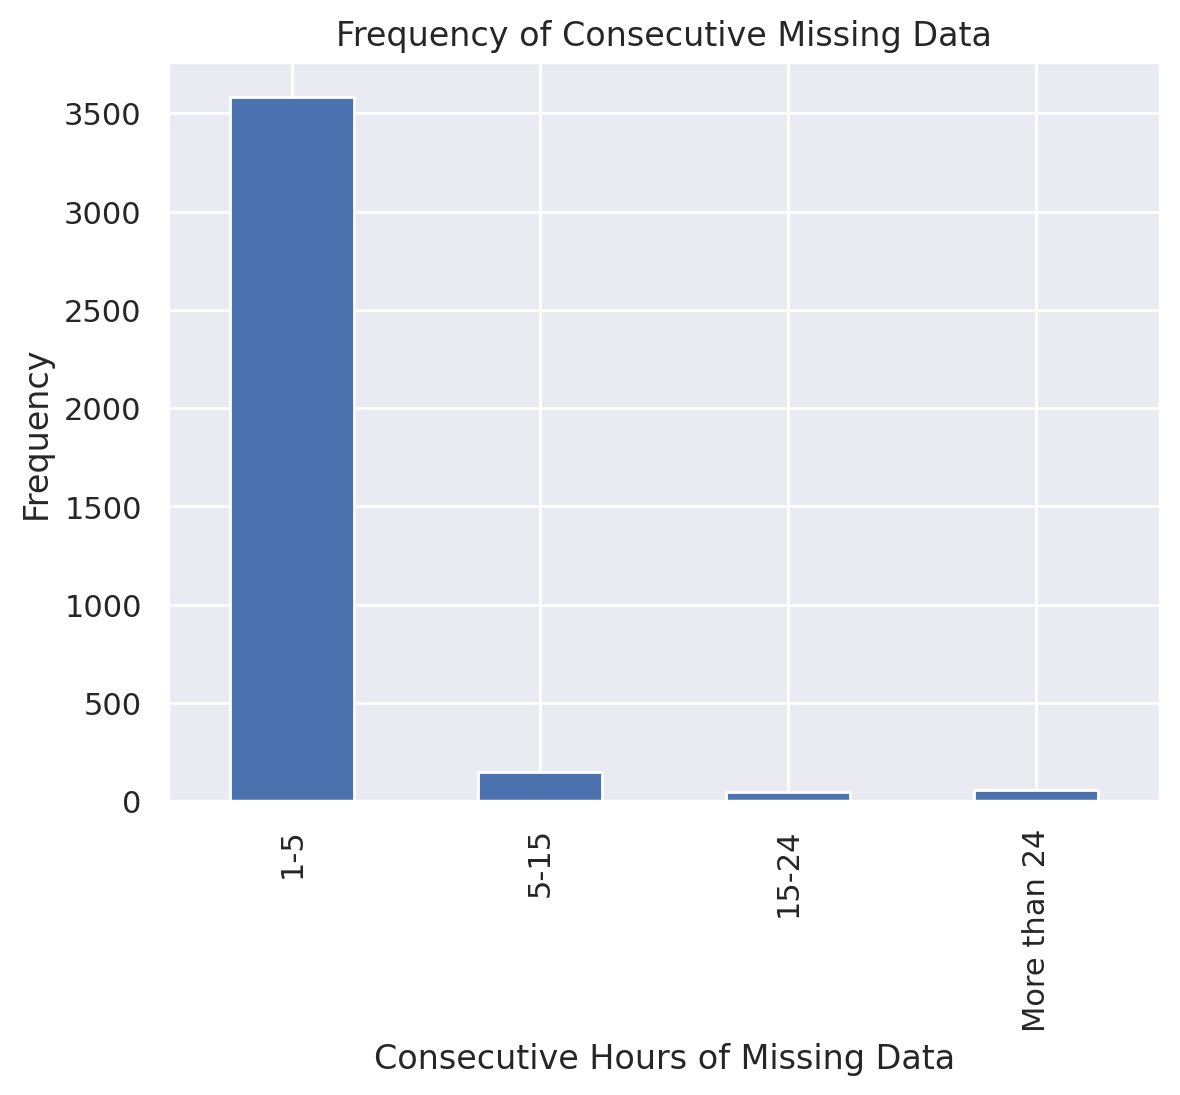

In [ ]:
freq_table = result_df['Consecutive Hours Bin'].value_counts().sort_index()
freq_table.plot(kind='bar')
plt.xlabel('Consecutive Hours of Missing Data')
plt.ylabel('Frequency')
plt.title('Frequency of Consecutive Missing Data')
plt.show()

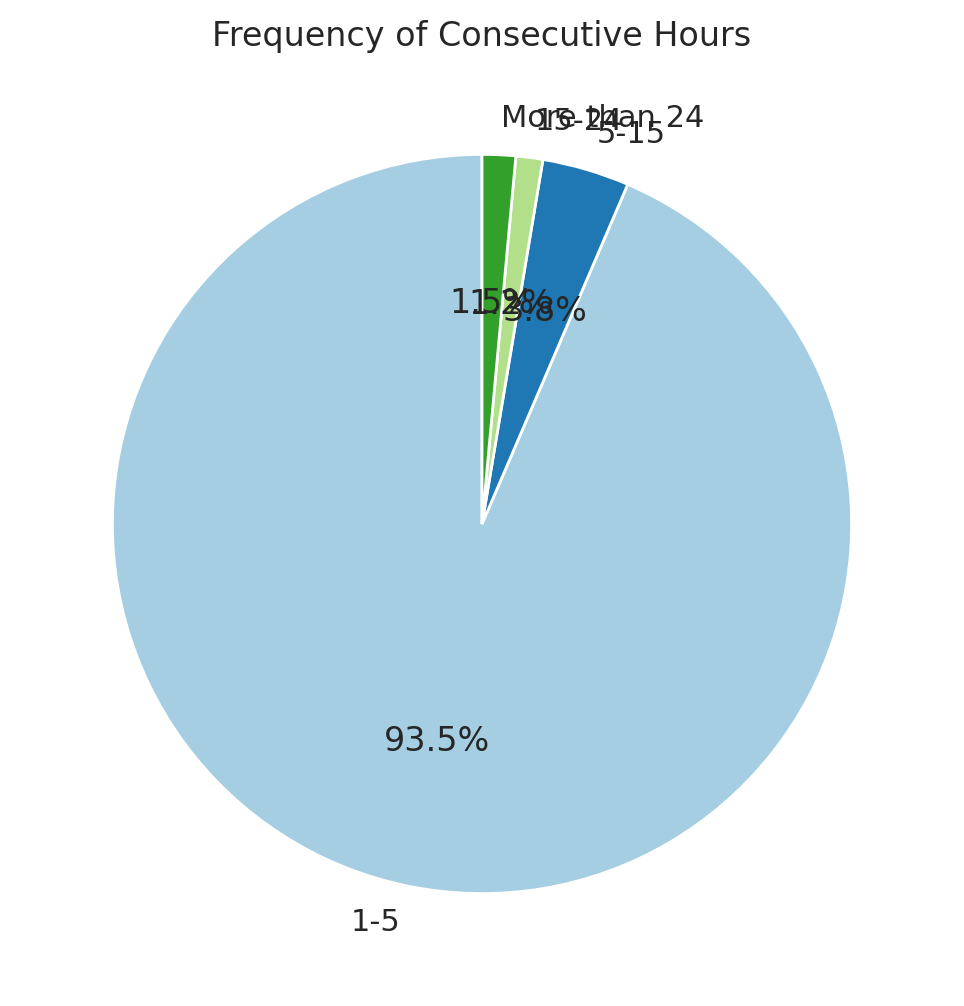

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(freq_table, labels=freq_table.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Frequency of Consecutive Hours')
plt.show()

In [ ]:
from google.colab import files
no2.to_csv('no2.csv',index=False)
files.download("no2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# NO2 Data Imputation

In [ ]:
no2['FECHA'] = pd.to_datetime(no2['FECHA'])
# Define the date range for training data
start_date_training = '2011-01-01 00:00:00'
end_date_training = '2017-12-31 23:00:00'
# Filter the DataFrame for training data
training_no2 = no2[(no2['FECHA'] >= start_date_training) & (no2['FECHA'] <= end_date_training)]
# Filter the DataFrame for testing data
testing_no2 = no2[no2['FECHA'] > end_date_training]
# Reset index if needed
training_no2.reset_index(drop=True, inplace=True)
testing_no2.reset_index(drop=True, inplace=True)
print("Training data shape:", training_no2.shape)
print("Testing data shape:", testing_no2.shape)

Training data shape: (1227360, 4)
Testing data shape: (526080, 4)


In [ ]:
training_no2

Estacion_Code               FECHA Validacion_Code  Valor
0            28079008 2011-01-01 00:00:00               V  50.00
1            28079011 2011-01-01 00:00:00               V  45.00
2            28079016 2011-01-01 00:00:00               V  39.00
3            28079017 2011-01-01 00:00:00               V  68.00
4            28079018 2011-01-01 00:00:00               V  50.00
...               ...                 ...             ...    ...
1227355      28079055 2017-12-31 23:00:00               V   6.00
1227356      28079057 2017-12-31 23:00:00               V   3.00
1227357      28079058 2017-12-31 23:00:00               V   1.00
1227358      28079059 2017-12-31 23:00:00               V   3.00
1227359      28079060 2017-12-31 23:00:00               V   5.00

[1227360 rows x 4 columns]

In [ ]:
from sklearn.impute import KNNImputer
# Pivot the DataFrame
pivot_df = training_no2.pivot(index='FECHA', columns='Estacion_Code', values='Valor')
# Reset the index to make 'FECHA' a column again
pivot_df.reset_index(inplace=True)
values_df = pivot_df.drop(columns=['FECHA']).values
training_no2_hourly = pd.DataFrame(data=values_df, columns=pivot_df.columns[1:])

# KNN imputation
imputer = KNNImputer(n_neighbors=5)
training_no2_hourly_imputed_global = imputer.fit_transform(training_no2_hourly)

training_no2_hourly_imputed_global_df = pd.DataFrame(data=training_no2_hourly_imputed_global, columns=training_no2_hourly.columns)

# Insert 'FECHA' back as an index
training_no2_hourly_imputed_global_df.insert(0, 'FECHA', pivot_df['FECHA'])

# Set 'FECHA' as an index
training_no2_hourly_imputed_global_df.set_index('FECHA', inplace=True)
# Add columns for hour, month, and year
training_no2_hourly_imputed_global_df['Hour'] = training_no2_hourly_imputed_global_df.index.hour
training_no2_hourly_imputed_global_df['Day'] = training_no2_hourly_imputed_global_df.index.day
training_no2_hourly_imputed_global_df['Month'] = training_no2_hourly_imputed_global_df.index.month
training_no2_hourly_imputed_global_df['Year'] = training_no2_hourly_imputed_global_df.index.year
# One-hot encode the day of the week
day_of_week_encoded = pd.get_dummies(training_no2_hourly_imputed_global_df.index.day_name(), prefix='', prefix_sep='DayOfWeek_')
desired_column_order = ['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']
day_of_week_encoded = day_of_week_encoded[desired_column_order]
day_of_week_encoded.index = training_no2_hourly_imputed_global_df.index  # Align the index
# Add one-hot encoded columns for day of the week individually
training_no2_hourly_imputed_global_df = pd.concat([training_no2_hourly_imputed_global_df, day_of_week_encoded], axis=1)


In [ ]:
day_of_week_encoded

DayOfWeek_Monday  DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
FECHA                                                                           
2011-01-01 00:00:00                 0                  0                    0   
2011-01-01 01:00:00                 0                  0                    0   
2011-01-01 02:00:00                 0                  0                    0   
2011-01-01 03:00:00                 0                  0                    0   
2011-01-01 04:00:00                 0                  0                    0   
...                               ...                ...                  ...   
2017-12-31 19:00:00                 0                  0                    0   
2017-12-31 20:00:00                 0                  0                    0   
2017-12-31 21:00:00                 0                  0                    0   
2017-12-31 22:00:00                 0                  0                    0   
2017-12-31 23:00:00                 0                  0                    0   

                     DayOfWeek_Thursday  DayOfWeek_Friday  DayOfWeek_Saturday  \
FECHA                                                                           
2011-01-01 00:00:00                   0                 0                   1   
2011-01-01 01:00:00                   0                 0                   1   
2011-01-01 02:00:00                   0                 0                   1   
2011-01-01 03:00:00                   0                 0                   1   
2011-01-01 04:00:00                   0                 0                   1   
...                                 ...               ...                 ...   
2017-12-31 19:00:00                   0                 0                   0   
2017-12-31 20:00:00                   0                 0                   0   
2017-12-31 21:00:00                   0                 0                   0   
2017-12-31 22:00:00                   0                 0                   0   
2017-12-31 23:00:00                   0                 0                   0   

                     DayOfWeek_Sunday  
FECHA                                  
2011-01-01 00:00:00                 0  
2011-01-01 01:00:00                 0  
2011-01-01 02:00:00                 0  
2011-01-01 03:00:00                 0  
2011-01-01 04:00:00                 0  
...                               ...  
2017-12-31 19:00:00                 1  
2017-12-31 20:00:00                 1  
2017-12-31 21:00:00                 1  
2017-12-31 22:00:00                 1  
2017-12-31 23:00:00                 1  

[61368 rows x 7 columns]

In [ ]:
training_no2_hourly_imputed_global_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2017-12-31 19:00:00     43.00     40.00     31.00     33.00     33.00   
2017-12-31 20:00:00     40.00     42.00     27.00     47.00     35.00   
2017-12-31 21:00:00     64.00     28.00     23.00     26.00     34.00   
2017-12-31 22:00:00     42.00     13.00     13.00     16.00     20.00   
2017-12-31 23:00:00     20.00      9.00      9.00     13.00     16.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-12-31 19:00:00      6.00     12.00     36.00     45.00     49.00  ...   
2017-12-31 20:00:00      6.00     16.00     39.00     48.00     48.00  ...   
2017-12-31 21:00:00      8.00     15.00     37.00     35.00     19.00  ...   
2017-12-31 22:00:00      6.00     10.00     29.00     27.00      9.00  ...   
2017-12-31 23:00:00      1.00     10.00     21.00     10.00      5.00  ...   

                     Day  Month  Year  DayOfWeek_Monday  DayOfWeek_Tuesday  \
FECHA                                                                        
2011-01-01 00:00:00    1      1  2011                 0                  0   
2011-01-01 01:00:00    1      1  2011                 0                  0   
2011-01-01 02:00:00    1      1  2011                 0                  0   
2011-01-01 03:00:00    1      1  2011                 0                  0   
2011-01-01 04:00:00    1      1  2011                 0                  0   
...                  ...    ...   ...               ...                ...   
2017-12-31 19:00:00   31     12  2017                 0                  0   
2017-12-31 20:00:00   31     12  2017                 0                  0   
2017-12-31 21:00:00   31     12  2017                 0                  0   
2017-12-31 22:00:00   31     12  2017                 0                  0   
2017-12-31 23:00:00   31     12  2017                 0                  0   

                     DayOfWeek_Wednesday  DayOfWeek_Thursday  \
FECHA                                                          
2011-01-01 00:00:00                    0                   0   
2011-01-01 01:00:00                    0                   0   
2011-01-01 02:00:00                    0                   0   
2011-01-01 03:00:00                    0                   0   
2011-01-01 04:00:00                    0                   0   
...                                  ...                 ...   
2017-12-31 19:00:00                    0                   0   
2017-12-31 20:00:00                    0                   0   
2017-12-31 21:00:00                    0                   0   
2017-12-31 22:00:00                    0                   0   
2017-12-31 23:00:00                    0                   0   

                     DayOfWeek_Friday  DayOfWeek_Saturday  DayOfWeek_Sunday  
FECHA                                                                        
2011-01-01 00:00:00                 0               

In [ ]:
# Melt the DataFrame
melted_df = pd.melt(training_no2_hourly_imputed_global_df.reset_index(), id_vars=['FECHA'] + list(training_no2_hourly_imputed_global_df.columns[20:]), value_vars=training_no2_hourly_imputed_global_df.columns[:20], var_name='Station', value_name='NO2')
# Perform one-hot encoding
melted_df_encoded = pd.get_dummies(melted_df, columns=['Station'], prefix='station', drop_first=True)
melted_df_encoded = melted_df_encoded.drop(columns=['FECHA'])
melted_df_encoded_train = melted_df_encoded[['NO2'] + [col for col in melted_df_encoded.columns if col != 'NO2']]
melted_df_encoded_train

NO2  Hour  Day  Month  Year  DayOfWeek_Monday  DayOfWeek_Tuesday  \
0       50.00     0    1      1  2011                 0                  0   
1       67.00     1    1      1  2011                 0                  0   
2       73.00     2    1      1  2011                 0                  0   
3       54.00     3    1      1  2011                 0                  0   
4       42.00     4    1      1  2011                 0                  0   
...       ...   ...  ...    ...   ...               ...                ...   
1227355 16.00    19   31     12  2017                 0                  0   
1227356 20.00    20   31     12  2017                 0                  0   
1227357 18.00    21   31     12  2017                 0                  0   
1227358  7.00    22   31     12  2017                 0                  0   
1227359  5.00    23   31     12  2017                 0                  0   

         DayOfWeek_Wednesday  DayOfWeek_Thursday  DayOfWeek_Friday  ...  \
0                          0                   0                 0  ...   
1                          0                   0                 0  ...   
2                          0                   0                 0  ...   
3                          0                   0                 0  ...   
4                          0                   0                 0  ...   
...                      ...                 ...               ...  ...   
1227355                    0                   0                 0  ...   
1227356                    0                   0                 0  ...   
1227357                    0                   0                 0  ...   
1227358                    0                   0                 0  ...   
1227359                    0                   0                 0  ...   

         station_28079039  station_28079040  station_28079048  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   
...                   ...               ...               ...   
1227355                 0                 0                 0   
1227356                 0                 0                 0   
1227357                 0                 0                 0   
1227358                 0                 0                 0   
1227359                 0                 0                 0   

         station_28079050  station_28079054  station_28079055  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   
...                   ...               ...               ...   
1227355                 0                 0                 0   
1227356                 0                 0                 0   
1227357                 0                 0                 0   
1227358                 0                 0                 0   
1227359                 0                 0                 0   

         station_28079057  station_28079058  station_28079059  \
0                       0                 0                 0   
1                       0                 0                 0   
2                       0                 0                 0   
3                       0                 0                 0   
4                       0                 0                 0   
...                   ...               ...               ...   
1227355                 0                 0                 0   
1227356                 0                 0                 0   
1227357                 0

In [ ]:
testing_no2

Estacion_Code               FECHA Validacion_Code  Valor
0           28079008 2018-01-01 00:00:00               V  33.00
1           28079011 2018-01-01 00:00:00               V  11.00
2           28079016 2018-01-01 00:00:00               V  12.00
3           28079017 2018-01-01 00:00:00               V  23.00
4           28079018 2018-01-01 00:00:00               V  32.00
...              ...                 ...             ...    ...
526075      28079055 2020-12-31 23:00:00               V  10.00
526076      28079057 2020-12-31 23:00:00               V   9.00
526077      28079058 2020-12-31 23:00:00               V   4.00
526078      28079059 2020-12-31 23:00:00               V   5.00
526079      28079060 2020-12-31 23:00:00               V  14.00

[526080 rows x 4 columns]

In [ ]:
pivot_df = testing_no2.pivot(index='FECHA', columns='Estacion_Code', values='Valor')
pivot_df.reset_index(inplace=True)
values_df = pivot_df.drop(columns=['FECHA']).values
testing_no2_hourly = pd.DataFrame(data=values_df, columns=pivot_df.columns[1:])

In [ ]:
testing_no2_hourly

Estacion_Code  28079008  28079011  28079016  28079017  28079018  28079024  \
0                 33.00     11.00     12.00     23.00     32.00      1.00   
1                 64.00     33.00     26.00     43.00     41.00      6.00   
2                 63.00     27.00     39.00     34.00     26.00      8.00   
3                 51.00     16.00     17.00     29.00     22.00      3.00   
4                 57.00     11.00     14.00     18.00     28.00      5.00   
...                 ...       ...       ...       ...       ...       ...   
26299               NaN     20.00     27.00     27.00     18.00      3.00   
26300               NaN     19.00     24.00     33.00     22.00      4.00   
26301               NaN     18.00     27.00     29.00     23.00      4.00   
26302               NaN     14.00     21.00     19.00     16.00      2.00   
26303               NaN     11.00     12.00     14.00     12.00      2.00   

Estacion_Code  28079027  28079035  28079036  28079038  28079039  28079040  \
0                  9.00     19.00     16.00     13.00     12.00     12.00   
1                 13.00     29.00     43.00     40.00     25.00     37.00   
2                 21.00     35.00     49.00     23.00     32.00     43.00   
3                 11.00     38.00     29.00     14.00     27.00     29.00   
4                 13.00     29.00     22.00     14.00     14.00     23.00   
...                 ...       ...       ...       ...       ...       ...   
26299             23.00     17.00     32.00     23.00     26.00     25.00   
26300             21.00     16.00     33.00     22.00     23.00     28.00   
26301             22.00     21.00     26.00     21.00     20.00     19.00   
26302             17.00     18.00     20.00     17.00     15.00     17.00   
26303             10.00     11.00     16.00     13.00     11.00     16.00   

Estacion_Code  28079048  28079050  28079054  28079055  28079057  28079058  \
0                 11.00     12.00      8.00      9.00      5.00      1.00   
1                 38.00     36.00     31.00     15.00     16.00      1.00   
2                 35.00     35.00     33.00     29.00     30.00     18.00   
3                 22.00     22.00     22.00     15.00     18.00      6.00   
4                 18.00     15.00     14.00     16.00     11.00      1.00   
...                 ...       ...       ...       ...       ...       ...   
26299             31.00     26.00     16.00     30.00     22.00      7.00   
26300             30.00     26.00     16.00     27.00     17.00      8.00   
26301             29.00     24.00     16.00     28.00     14.00      6.00   
26302             24.00     16.00     12.00     21.00     12.00      4.00   
26303             17.00     14.00     10.00     10.00      9.00      4.00   

Estacion_Code  28079059  28079060  
0                  5.00      8.00  
1                 12.00     17.00  
2                 19.00     19.00  
3                  9.00     17.00  
4                  8.00     12.00  
...                 ...       ...  
26299             11.00     21.00  
26300              9.00     23.00  
26301              9.00     20.00  
26302              7.00     17.00  
26303              5.00     14.00  

[26304 rows x 20 columns]

In [ ]:
import time
nmissing = np.sum(np.isnan(testing_no2_hourly), axis=1)
where_missing = np.where(nmissing > 0)[0]
testing_no2_hourly_imputed = np.copy(testing_no2_hourly)
start_time = time.time()

# Iterate over indices with missing values
for i in where_missing:
    imputation_data = testing_no2_hourly_imputed[:i + 1, :]
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(imputation_data)
    testing_no2_hourly_imputed[i, :] = imputed_data[i, :]

end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.2f} seconds")


Elapsed time: 34.38 seconds


In [ ]:
testing_no2_hourly_imputed_df = pd.DataFrame(data=testing_no2_hourly_imputed, columns=testing_no2_hourly.columns)
testing_no2_hourly_imputed_df.insert(0, 'FECHA', pivot_df['FECHA'])
testing_no2_hourly_imputed_df.set_index('FECHA', inplace=True)
testing_no2_hourly_imputed_df['Hour'] = testing_no2_hourly_imputed_df.index.hour
testing_no2_hourly_imputed_df['Day'] = testing_no2_hourly_imputed_df.index.day
testing_no2_hourly_imputed_df['Month'] = testing_no2_hourly_imputed_df.index.month
testing_no2_hourly_imputed_df['Year'] = testing_no2_hourly_imputed_df.index.year
day_of_week_encoded = pd.get_dummies(testing_no2_hourly_imputed_df.index.day_name(), prefix='', prefix_sep='DayOfWeek_')
desired_column_order = ['DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']
day_of_week_encoded = day_of_week_encoded[desired_column_order]
day_of_week_encoded.index = testing_no2_hourly_imputed_df.index
testing_no2_hourly_imputed_df = pd.concat([testing_no2_hourly_imputed_df, day_of_week_encoded], axis=1)

In [ ]:
melted_df = pd.melt(testing_no2_hourly_imputed_df.reset_index(), id_vars=['FECHA'] + list(testing_no2_hourly_imputed_df.columns[20:]), value_vars=testing_no2_hourly_imputed_df.columns[:20], var_name='Station', value_name='NO2')
melted_df_encoded = pd.get_dummies(melted_df, columns=['Station'], prefix='station', drop_first=True)
melted_df_encoded = melted_df_encoded.drop(columns=['FECHA'])
melted_df_encoded_test = melted_df_encoded[['NO2'] + [col for col in melted_df_encoded.columns if col != 'NO2']]
melted_df_encoded_test

NO2  Hour  Day  Month  Year  DayOfWeek_Monday  DayOfWeek_Tuesday  \
0      33.00     0    1      1  2018                 1                  0   
1      64.00     1    1      1  2018                 1                  0   
2      63.00     2    1      1  2018                 1                  0   
3      51.00     3    1      1  2018                 1                  0   
4      57.00     4    1      1  2018                 1                  0   
...      ...   ...  ...    ...   ...               ...                ...   
526075 21.00    19   31     12  2020                 0                  0   
526076 23.00    20   31     12  2020                 0                  0   
526077 20.00    21   31     12  2020                 0                  0   
526078 17.00    22   31     12  2020                 0                  0   
526079 14.00    23   31     12  2020                 0                  0   

        DayOfWeek_Wednesday  DayOfWeek_Thursday  DayOfWeek_Friday  ...  \
0                         0                   0                 0  ...   
1                         0                   0                 0  ...   
2                         0                   0                 0  ...   
3                         0                   0                 0  ...   
4                         0                   0                 0  ...   
...                     ...                 ...               ...  ...   
526075                    0                   1                 0  ...   
526076                    0                   1                 0  ...   
526077                    0                   1                 0  ...   
526078                    0                   1                 0  ...   
526079                    0                   1                 0  ...   

        station_28079039  station_28079040  station_28079048  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
526075                 0                 0                 0   
526076                 0                 0                 0   
526077                 0                 0                 0   
526078                 0                 0                 0   
526079                 0                 0                 0   

        station_28079050  station_28079054  station_28079055  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
526075                 0                 0                 0   
526076                 0                 0                 0   
526077                 0                 0                 0   
526078                 0                 0                 0   
526079                 0                 0                 0   

        station_28079057  station_28079058  station_28079059  station_28079060  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0                 0                 0                 0  
4                      0                 0                 0                 0  
...                  ...               ...               ...               ...  
526075                 0                 0                 0                 1  
526076   

In [ ]:
testing_no2_hourly_imputed_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2018-01-01 00:00:00     33.00     11.00     12.00     23.00     32.00   
2018-01-01 01:00:00     64.00     33.00     26.00     43.00     41.00   
2018-01-01 02:00:00     63.00     27.00     39.00     34.00     26.00   
2018-01-01 03:00:00     51.00     16.00     17.00     29.00     22.00   
2018-01-01 04:00:00     57.00     11.00     14.00     18.00     28.00   
...                       ...       ...       ...       ...       ...   
2020-12-31 19:00:00     39.62     20.00     27.00     27.00     18.00   
2020-12-31 20:00:00     41.17     19.00     24.00     33.00     22.00   
2020-12-31 21:00:00     34.93     18.00     27.00     29.00     23.00   
2020-12-31 22:00:00     28.04     14.00     21.00     19.00     16.00   
2020-12-31 23:00:00     26.40     11.00     12.00     14.00     12.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2018-01-01 00:00:00      1.00      9.00     19.00     16.00     13.00  ...   
2018-01-01 01:00:00      6.00     13.00     29.00     43.00     40.00  ...   
2018-01-01 02:00:00      8.00     21.00     35.00     49.00     23.00  ...   
2018-01-01 03:00:00      3.00     11.00     38.00     29.00     14.00  ...   
2018-01-01 04:00:00      5.00     13.00     29.00     22.00     14.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-12-31 19:00:00      3.00     23.00     17.00     32.00     23.00  ...   
2020-12-31 20:00:00      4.00     21.00     16.00     33.00     22.00  ...   
2020-12-31 21:00:00      4.00     22.00     21.00     26.00     21.00  ...   
2020-12-31 22:00:00      2.00     17.00     18.00     20.00     17.00  ...   
2020-12-31 23:00:00      2.00     10.00     11.00     16.00     13.00  ...   

                     Day  Month  Year  DayOfWeek_Monday  DayOfWeek_Tuesday  \
FECHA                                                                        
2018-01-01 00:00:00    1      1  2018                 1                  0   
2018-01-01 01:00:00    1      1  2018                 1                  0   
2018-01-01 02:00:00    1      1  2018                 1                  0   
2018-01-01 03:00:00    1      1  2018                 1                  0   
2018-01-01 04:00:00    1      1  2018                 1                  0   
...                  ...    ...   ...               ...                ...   
2020-12-31 19:00:00   31     12  2020                 0                  0   
2020-12-31 20:00:00   31     12  2020                 0                  0   
2020-12-31 21:00:00   31     12  2020                 0                  0   
2020-12-31 22:00:00   31     12  2020                 0                  0   
2020-12-31 23:00:00   31     12  2020                 0                  0   

                     DayOfWeek_Wednesday  DayOfWeek_Thursday  \
FECHA                                                          
2018-01-01 00:00:00                    0                   0   
2018-01-01 01:00:00                    0                   0   
2018-01-01 02:00:00                    0                   0   
2018-01-01 03:00:00                    0                   0   
2018-01-01 04:00:00                    0                   0   
...                                  ...                 ...   
2020-12-31 19:00:00                    0                   1   
2020-12-31 20:00:00                    0                   1   
2020-12-31 21:00:00                    0                   1   
2020-12-31 22:00:00                    0                   1   
2020-12-31 23:00:00                    0                   1   

                     DayOfWeek_Friday  DayOfWeek_Saturday  DayOfWeek_Sunday  
FECHA                                                                        
2018-01-01 00:00:00                 0               

# ASSOCIATING WEATHER STATIONS WITH NO2 STATIONS

In [ ]:
import math
import folium
from folium import Map, Marker, Icon, Popup, IFrame

In [ ]:
maestro

INDICATIVO                    NOMBRE NOM_PROV NOM_MUNI  ALTITUD  LATITUD  \
0       3129            MADRID/BARAJAS   MADRID   MADRID      609   402800   
1      3194U  MADRID, C. UNIVERSITARIA   MADRID   MADRID      664   402706   
2       3195             MADRID,RETIRO   MADRID   MADRID      667   402443   
3       3196     MADRID/CUATRO VIENTOS   MADRID   MADRID      690   402232   

   LONGITUD     C_X      C_Y   DATUM  IND_SYN        ALTA  BAJA  
0    333202  452902  4479703  ETRS89     8221  01/01/1945   NaN  
1    343272  438594  4478142  ETRS89     8220  01/01/1972   NaN  
2    340412  442470  4473702  ETRS89     8222  01/03/1893   NaN  
3    347102  433267  4469738  ETRS89     8223  01/05/1945   NaN

In [ ]:
wst = maestro[['NOMBRE']].copy()
wst.loc[:, 'LATITUD'] = [40.4666667, 40.4516667, 40.4119444, 40.3755556]
wst.loc[:, 'LONGITUD'] = [-3.5555555555555554, -3.7269444444444444, -3.6780555555555554, -3.786111111111111]

In [ ]:
wst

NOMBRE  LATITUD  LONGITUD
0            MADRID/BARAJAS    40.47     -3.56
1  MADRID, C. UNIVERSITARIA    40.45     -3.73
2             MADRID,RETIRO    40.41     -3.68
3     MADRID/CUATRO VIENTOS    40.38     -3.79

In [ ]:
no2st=stations[['CODIGO','ESTACION','LATITUD','LONGITUD']]
map = folium.Map(location=[no2st['LATITUD'].mean(), no2st['LONGITUD'].mean()], zoom_start=10, control_scale=True)
for index, location_info in no2st.iterrows():
    folium.Marker([location_info["LATITUD"], location_info["LONGITUD"]], popup=[location_info["CODIGO"],location_info['ESTACION']],icon=Icon(color='blue')).add_to(map)
for index, location_info in wst.iterrows():
    folium.Marker([location_info["LATITUD"], location_info["LONGITUD"]], popup=location_info["NOMBRE"],icon=Icon(color='green')).add_to(map)

In [ ]:
map

In [ ]:
a = list(zip(wst['LATITUD'], wst['LONGITUD']))
b = list(zip(no2st['LATITUD'], no2st['LONGITUD']))
c = {str(name): coordinates for name, coordinates in zip(wst['NOMBRE'], a)}
d = {str(estacion): coordinates for estacion, coordinates in zip(no2st['ESTACION'], b)}
c, d


({'MADRID/BARAJAS': (40.4666667, -3.5555555555555554),
  'MADRID, C. UNIVERSITARIA': (40.4516667, -3.7269444444444444),
  'MADRID,RETIRO': (40.4119444, -3.6780555555555554),
  'MADRID/CUATRO VIENTOS': (40.3755556, -3.786111111111111)},
 {'Plaza de España': (40.4238823, -3.7122567),
  'Escuelas Aguirre': (40.4215533, -3.6823158),
  'Ramón y Cajal': (40.4514734, -3.6773491),
  'Arturo Soria': (40.4400457, -3.6392422),
  'Villaverde': (40.347147, -3.7133167),
  'Farolillo': (40.3947825, -3.7318356),
  'Casa de Campo': (40.4193577, -3.7473445),
  'Barajas Pueblo': (40.4769179, -3.5800258),
  'Plaza del Carmen': (40.4192091, -3.7031662),
  'Moratalaz': (40.4079517, -3.6453104),
  'Cuatro Caminos': (40.4455439, -3.7071303),
  'Barrio del Pilar': (40.4782322, -3.7115364),
  'Vallecas': (40.3881478, -3.6515286),
  'Méndez Álvaro': (40.3980991, -3.6868138),
  'Castellana': (40.4398904, -3.6903729),
  'Parque del Retiro': (40.4144444, -3.6824999),
  'Plaza Castilla': (40.4655841, -3.6887449),
  

In [ ]:
import math

dists = [
    [dkey, min(c, key=lambda ckey: math.dist(dvalue, c[ckey]))]
    for dkey, dvalue in d.items()
]

for i in dists:
    if i[0] == 'Villaverde':
        i[1] = 'MADRID/CUATRO VIENTOS'

print(dists)

[['Plaza de España', 'MADRID, C. UNIVERSITARIA'], ['Escuelas Aguirre', 'MADRID,RETIRO'], ['Ramón y Cajal', 'MADRID,RETIRO'], ['Arturo Soria', 'MADRID,RETIRO'], ['Villaverde', 'MADRID/CUATRO VIENTOS'], ['Farolillo', 'MADRID,RETIRO'], ['Casa de Campo', 'MADRID, C. UNIVERSITARIA'], ['Barajas Pueblo', 'MADRID/BARAJAS'], ['Plaza del Carmen', 'MADRID,RETIRO'], ['Moratalaz', 'MADRID,RETIRO'], ['Cuatro Caminos', 'MADRID, C. UNIVERSITARIA'], ['Barrio del Pilar', 'MADRID, C. UNIVERSITARIA'], ['Vallecas', 'MADRID,RETIRO'], ['Méndez Álvaro', 'MADRID,RETIRO'], ['Castellana', 'MADRID,RETIRO'], ['Parque del Retiro', 'MADRID,RETIRO'], ['Plaza Castilla', 'MADRID, C. UNIVERSITARIA'], ['Ensanche de Vallecas', 'MADRID,RETIRO'], ['Urb. Embajada', 'MADRID/BARAJAS'], ['Plaza Elíptica', 'MADRID,RETIRO'], ['Sanchinarro', 'MADRID, C. UNIVERSITARIA'], ['El Pardo', 'MADRID, C. UNIVERSITARIA'], ['Juan Carlos I', 'MADRID/BARAJAS'], ['Tres Olivos', 'MADRID, C. UNIVERSITARIA']]


We can see that there is no NO2 station which is closer to Cuatro Vientos Weather Station, although Villaverde Station is practically at the same distance from Cuatro Vientos and Retirp. When assigning each no2 station a weather station,I decided to (at least initially) assign Cuatro Vientos Station to Villaverde, since I think it is important to take into account that the conditions of the surroundings may affect the weather features (specially temperature as it may depends on the concentration of cars and pollution infraestructures, as well as the wind (places with a higher density of biuldings and their height)) Since Cuatro Vientos in Carabanchel has more similar conditions as this as in Villaverde ,I decided to do this assignment

In [ ]:
correspondence = pd.DataFrame(dists, columns = ['NO2 Station', 'NOMBRE'])
correspondence[['Estacion_Code']]=stations[['CODIGO']]
correspondence

NO2 Station                    NOMBRE  Estacion_Code
0        Plaza de España  MADRID, C. UNIVERSITARIA       28079004
1       Escuelas Aguirre             MADRID,RETIRO       28079008
2          Ramón y Cajal             MADRID,RETIRO       28079011
3           Arturo Soria             MADRID,RETIRO       28079016
4             Villaverde     MADRID/CUATRO VIENTOS       28079017
5              Farolillo             MADRID,RETIRO       28079018
6          Casa de Campo  MADRID, C. UNIVERSITARIA       28079024
7         Barajas Pueblo            MADRID/BARAJAS       28079027
8       Plaza del Carmen             MADRID,RETIRO       28079035
9              Moratalaz             MADRID,RETIRO       28079036
10        Cuatro Caminos  MADRID, C. UNIVERSITARIA       28079038
11      Barrio del Pilar  MADRID, C. UNIVERSITARIA       28079039
12              Vallecas             MADRID,RETIRO       28079040
13         Méndez Álvaro             MADRID,RETIRO       28079047
14            Castellana             MADRID,RETIRO       28079048
15     Parque del Retiro             MADRID,RETIRO       28079049
16        Plaza Castilla  MADRID, C. UNIVERSITARIA       28079050
17  Ensanche de Vallecas             MADRID,RETIRO       28079054
18         Urb. Embajada            MADRID/BARAJAS       28079055
19        Plaza Elíptica             MADRID,RETIRO       28079056
20           Sanchinarro  MADRID, C. UNIVERSITARIA       28079057
21              El Pardo  MADRID, C. UNIVERSITARIA       28079058
22         Juan Carlos I            MADRID/BARAJAS       28079059
23           Tres Olivos  MADRID, C. UNIVERSITARIA       28079060

In [ ]:
no2['Estacion_Code']=no2['Estacion_Code'].astype(int)
no2 = pd.merge(no2, correspondence, on="Estacion_Code")
no2

Estacion_Code               FECHA Validacion_Code  Valor  \
0             28079008 2011-01-01 00:00:00               V  50.00   
1             28079008 2011-01-01 01:00:00               V  67.00   
2             28079008 2011-01-01 02:00:00               V  73.00   
3             28079008 2011-01-01 03:00:00               V  54.00   
4             28079008 2011-01-01 04:00:00               V  42.00   
...                ...                 ...             ...    ...   
1753435       28079060 2020-12-31 19:00:00               V  21.00   
1753436       28079060 2020-12-31 20:00:00               V  23.00   
1753437       28079060 2020-12-31 21:00:00               V  20.00   
1753438       28079060 2020-12-31 22:00:00               V  17.00   
1753439       28079060 2020-12-31 23:00:00               V  14.00   

              NO2 Station                    NOMBRE  
0        Escuelas Aguirre             MADRID,RETIRO  
1        Escuelas Aguirre             MADRID,RETIRO  
2        Escuelas Aguirre             MADRID,RETIRO  
3        Escuelas Aguirre             MADRID,RETIRO  
4        Escuelas Aguirre             MADRID,RETIRO  
...                   ...                       ...  
1753435       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753436       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753437       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753438       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753439       Tres Olivos  MADRID, C. UNIVERSITARIA  

[1753440 rows x 6 columns]

In [ ]:
no2['FECHA']=no2['FECHA'].astype(str)
no2['FECHA'] =  pd.to_datetime(no2['FECHA'],format='%Y-%m-%d %H:%M',yearfirst=True,errors='coerce')
no2

Estacion_Code               FECHA Validacion_Code  Valor  \
0             28079008 2011-01-01 00:00:00               V  50.00   
1             28079008 2011-01-01 01:00:00               V  67.00   
2             28079008 2011-01-01 02:00:00               V  73.00   
3             28079008 2011-01-01 03:00:00               V  54.00   
4             28079008 2011-01-01 04:00:00               V  42.00   
...                ...                 ...             ...    ...   
1753435       28079060 2020-12-31 19:00:00               V  21.00   
1753436       28079060 2020-12-31 20:00:00               V  23.00   
1753437       28079060 2020-12-31 21:00:00               V  20.00   
1753438       28079060 2020-12-31 22:00:00               V  17.00   
1753439       28079060 2020-12-31 23:00:00               V  14.00   

              NO2 Station                    NOMBRE  
0        Escuelas Aguirre             MADRID,RETIRO  
1        Escuelas Aguirre             MADRID,RETIRO  
2        Escuelas Aguirre             MADRID,RETIRO  
3        Escuelas Aguirre             MADRID,RETIRO  
4        Escuelas Aguirre             MADRID,RETIRO  
...                   ...                       ...  
1753435       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753436       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753437       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753438       Tres Olivos  MADRID, C. UNIVERSITARIA  
1753439       Tres Olivos  MADRID, C. UNIVERSITARIA  

[1753440 rows x 6 columns]

In [ ]:
no2.groupby([no2["FECHA"].dt.weekday, "NO2 Station"])["Valor"].mean()

FECHA  NO2 Station     
0      Arturo Soria       38.04
       Barajas Pueblo     35.40
       Barrio del Pilar   41.47
       Casa de Campo      22.31
       Castellana         38.36
                           ... 
6      Sanchinarro        24.58
       Tres Olivos        23.26
       Urb. Embajada      32.40
       Vallecas           28.83
       Villaverde         31.74
Name: Valor, Length: 140, dtype: float64

# Cleaning Weather Data

In [ ]:
from IPython.display import display
import numpy as np
import pandas as pd

def clean_dataset(data, valuename):
    data = data.drop(columns=['INDICATIVO', 'ALTITUD', 'NOM_PROV'])

    if valuename == 'PRECIPITACION':
        data['PH00'] = data['PH24']
        data = data.drop(columns=['PH24'])
        data = data[['AÑO', 'MES', 'DIA', 'NOMBRE', 'PH00', 'PH01', 'PH02', 'PH03', 'PH04', 'PH05', 'PH06', 'PH07', 'PH08', 'PH09', 'PH10', 'PH11', 'PH12', 'PH13', 'PH14', 'PH15', 'PH16', 'PH17', 'PH18', 'PH19', 'PH20', 'PH21', 'PH22', 'PH23']]

    data = data[data['AÑO'] >= 2011]
    datatitles = list(data)
    datatitles = datatitles[4:28]
    data = data.melt(id_vars=["AÑO", "MES", 'DIA', 'NOMBRE'], value_vars=datatitles, var_name='HORA', value_name=valuename)

    if valuename == 'TEMPERATURA':
        data['HORA'] = data['HORA'].str[1:]
        data[valuename] = data[valuename] / 10
    elif valuename == 'VIENTO':
        data = data[data.columns.drop(list(data.filter(regex='DIR')))]
        data['HORA'] = data['HORA'].str[4:]
    elif valuename == 'PRECIPITACION':
        data['HORA'] = data['HORA'].str[2:]
        data['PRECIPITACION'] = np.where(data['PRECIPITACION'] == -3, 0.5, data['PRECIPITACION'])

    data = data[['AÑO', 'MES', 'DIA', 'HORA', 'NOMBRE', valuename]]
    data[["MES", "DIA"]] = data[["MES", "DIA"]].astype(str)
    data['MES'] = data['MES'].str.zfill(2)
    data['DIA'] = data['DIA'].str.zfill(2)

    w = data['AÑO'].astype(str) + data['MES'].astype(str) + data['DIA'].astype(str) + data['HORA'].astype(str)
    e = pd.to_datetime(w, format='%Y%m%d%H', yearfirst=True, errors='ignore')
    data['FECHA'] = e

    data = data.drop(columns=['AÑO', 'MES', 'DIA', 'HORA'])
    data = data.sort_values(by='FECHA')
    data = data.sort_values(['NOMBRE'], ascending=True).groupby(['NOMBRE'], sort=False).apply(
        lambda x: x.sort_values(['FECHA'], ascending=True)).reset_index(drop=True)

    data = data.drop_duplicates()
    display(data)

    return data


temp = clean_dataset(temp, 'TEMPERATURA')
precip = clean_dataset(precip, 'PRECIPITACION')
wind = clean_dataset(wind, 'VIENTO')


NOMBRE  TEMPERATURA               FECHA
0       MADRID, C. UNIVERSITARIA         4.90 2011-01-01 00:00:00
1       MADRID, C. UNIVERSITARIA         6.50 2011-01-01 01:00:00
2       MADRID, C. UNIVERSITARIA         7.20 2011-01-01 02:00:00
3       MADRID, C. UNIVERSITARIA         6.70 2011-01-01 03:00:00
4       MADRID, C. UNIVERSITARIA         6.50 2011-01-01 04:00:00
...                          ...          ...                 ...
343459     MADRID/CUATRO VIENTOS         4.90 2020-12-31 19:00:00
343460     MADRID/CUATRO VIENTOS         4.80 2020-12-31 20:00:00
343461     MADRID/CUATRO VIENTOS         4.80 2020-12-31 21:00:00
343462     MADRID/CUATRO VIENTOS         4.40 2020-12-31 22:00:00
343463     MADRID/CUATRO VIENTOS         3.80 2020-12-31 23:00:00

[343464 rows x 3 columns]

NOMBRE  PRECIPITACION               FECHA
0       MADRID, C. UNIVERSITARIA           0.00 2011-01-09 00:00:00
1       MADRID, C. UNIVERSITARIA           3.00 2011-01-09 01:00:00
2       MADRID, C. UNIVERSITARIA           2.00 2011-01-09 02:00:00
3       MADRID, C. UNIVERSITARIA           3.00 2011-01-09 03:00:00
4       MADRID, C. UNIVERSITARIA           1.00 2011-01-09 04:00:00
...                          ...            ...                 ...
341851     MADRID/CUATRO VIENTOS           0.50 2020-12-31 19:00:00
341852     MADRID/CUATRO VIENTOS           0.00 2020-12-31 20:00:00
341853     MADRID/CUATRO VIENTOS           0.00 2020-12-31 21:00:00
341854     MADRID/CUATRO VIENTOS           0.00 2020-12-31 22:00:00
341855     MADRID/CUATRO VIENTOS           0.00 2020-12-31 23:00:00

[341856 rows x 3 columns]

NOMBRE  VIENTO               FECHA
0       MADRID, C. UNIVERSITARIA    8.00 2011-01-01 00:00:00
1       MADRID, C. UNIVERSITARIA   10.00 2011-01-01 00:00:00
2       MADRID, C. UNIVERSITARIA    6.00 2011-01-01 01:00:00
3       MADRID, C. UNIVERSITARIA   10.00 2011-01-01 01:00:00
4       MADRID, C. UNIVERSITARIA   10.00 2011-01-01 02:00:00
...                          ...     ...                 ...
310675     MADRID/CUATRO VIENTOS   22.00 2020-12-31 09:00:00
310676     MADRID/CUATRO VIENTOS   17.00 2020-12-31 10:00:00
310677     MADRID/CUATRO VIENTOS   11.00 2020-12-31 10:00:00
310678     MADRID/CUATRO VIENTOS   23.00 2020-12-31 11:00:00
310679     MADRID/CUATRO VIENTOS   11.00 2020-12-31 11:00:00

[285872 rows x 3 columns]

In [ ]:
import pandas as pd
import numpy as np

def clean_pressure(data):
    data = data.drop(columns=['INDICATIVO', 'ALTITUD', 'NOM_PROV', 'PRESMAX', 'HPRESMAX', 'PRESMIN', 'HPRESMIN'])
    data = data[data['AÑO'] >= 2011]
    retirodata = data[data['NOMBRE'] == 'MADRID,RETIRO']
    retirodata['NOMBRE'] = 'MADRID, C. UNIVERSITARIA'
    data = pd.concat([data, retirodata], axis=0)
    datarest = data[['AÑO', 'MES', 'DIA', 'NOMBRE']]
    data = data.drop(columns=['AÑO', 'MES', 'DIA', 'NOMBRE'])
    qlist = ['01', '02', '03', '04', '05', '06', '08', '09', '10', '11', '12', '14', '15', '16', '17', '19', '20', '21', '22', '23']
    for i in qlist:
        data[i] = np.nan
    data.rename(columns={'PRES00': '00', 'PRES07': '07', 'PRES13': '13', 'PRES18': '18'}, inplace=True)
    data = data[['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']]
    data = data.interpolate(axis=1)
    data = datarest.join(data)
    datatitles = list(data)
    datatitles = datatitles[4:28]
    data = data.melt(id_vars=["AÑO", "MES", 'DIA', 'NOMBRE'], value_vars=datatitles, var_name='HORA', value_name='PRESION')
    data = data[['AÑO', 'MES', 'DIA', 'HORA', 'NOMBRE', 'PRESION']]
    data[["MES", "DIA"]] = data[["MES", "DIA"]].astype(str)
    data['MES'] = data['MES'].str.zfill(2)
    data['DIA'] = data['DIA'].str.zfill(2)
    w = data['AÑO'].astype(str) + data['MES'].astype(str) + data['DIA'].astype(str) + data['HORA'].astype(str)
    e = pd.to_datetime(w, format='%Y%m%d%H', yearfirst=True, errors='ignore')
    data['FECHA'] = e
    data = data.drop(columns=['AÑO', 'MES', 'DIA', 'HORA'])
    data = data.sort_values(by='FECHA')
    data = data.sort_values(['NOMBRE'], ascending=True) \
        .groupby(['NOMBRE'], sort=False) \
        .apply(lambda x: x.sort_values(['FECHA'], ascending=True)) \
        .reset_index(drop=True)
    data = data.drop_duplicates()
    display(data)
    return data
pres=clean_pressure(pres)

<ipython-input-31-24fe91dc8962>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retirodata['NOMBRE'] = 'MADRID, C. UNIVERSITARIA'


NOMBRE  PRESION               FECHA
0       MADRID, C. UNIVERSITARIA  9410.00 2011-01-01 00:00:00
2       MADRID, C. UNIVERSITARIA  9411.00 2011-01-01 01:00:00
4       MADRID, C. UNIVERSITARIA  9412.00 2011-01-01 02:00:00
6       MADRID, C. UNIVERSITARIA  9413.00 2011-01-01 03:00:00
8       MADRID, C. UNIVERSITARIA  9414.00 2011-01-01 04:00:00
...                          ...      ...                 ...
522859     MADRID/CUATRO VIENTOS  9315.00 2020-12-31 19:00:00
522860     MADRID/CUATRO VIENTOS  9315.00 2020-12-31 20:00:00
522861     MADRID/CUATRO VIENTOS  9315.00 2020-12-31 21:00:00
522862     MADRID/CUATRO VIENTOS  9315.00 2020-12-31 22:00:00
522863     MADRID/CUATRO VIENTOS  9315.00 2020-12-31 23:00:00

[349104 rows x 3 columns]

In [ ]:
precip['PRECIPITACION'] = pd.to_numeric(precip['PRECIPITACION'], errors='coerce')
temp_pivot = temp.pivot(index="FECHA", columns="NOMBRE", values="TEMPERATURA")
wind_pivot = wind.pivot(index="FECHA", columns="NOMBRE", values="VIENTO")
pres_pivot = pres.pivot(index="FECHA", columns="NOMBRE", values="PRESION")
precip_pivot = precip.pivot(index="FECHA", columns="NOMBRE", values="PRECIPITACION")
temp_array = temp_pivot.to_numpy()
wind_array = wind_pivot.to_numpy()
pres_array = pres_pivot.to_numpy()
precip_array = precip_pivot.to_numpy()

# Calculating row means
temp_row_means = np.nanmean(temp_array, axis=1)
wind_row_means = np.nanmean(wind_array, axis=1)
pres_row_means = np.nanmean(pres_array, axis=1)
precip_row_means = np.nanmean(precip_array, axis=1)

# Replacing NaN values with row means
temp_array_filled = np.where(np.isnan(temp_array), temp_row_means[:, np.newaxis], temp_array)
wind_array_filled = np.where(np.isnan(wind_array), wind_row_means[:, np.newaxis], wind_array)
pres_array_filled = np.where(np.isnan(pres_array), pres_row_means[:, np.newaxis], pres_array)
precip_array_filled = np.where(np.isnan(precip_array), precip_row_means[:, np.newaxis], precip_array)

temp_pivot= pd.DataFrame(temp_array_filled, index=temp_pivot.index, columns=temp_pivot.columns)
wind_pivot= pd.DataFrame(wind_array_filled, index=wind_pivot.index, columns=wind_pivot.columns)
pres_pivot= pd.DataFrame(pres_array_filled, index=pres_pivot.index, columns=pres_pivot.columns)
precip_pivot= pd.DataFrame(precip_array_filled, index=precip_pivot.index, columns=precip_pivot.columns)



In [ ]:
has_all_nan = precip_pivot.isnull().all(axis=1).any()
if has_all_nan:
    count_empty_rows = precip_pivot.isnull().all(axis=1).sum()
    print(f"There are {count_empty_rows} row(s) with all NaN values.")
else:
    print("No row has all NaN values.")


No row has all NaN values.


In [ ]:
temp = pd.melt(temp_pivot, ignore_index=False, var_name="NOMBRE", value_name="TEMPERATURA")
wind = pd.melt(wind_pivot, ignore_index=False, var_name="NOMBRE", value_name="VIENTO")
pres = pd.melt(pres_pivot, ignore_index=False, var_name="NOMBRE", value_name="PRESION")
precip = pd.melt(precip_pivot, ignore_index=False, var_name="NOMBRE", value_name="PRECIPITACION")

In [ ]:
temp

In [ ]:
temp_pivot

In [ ]:
temp_pivot["2015-01-01":"2015-12-31"]['MADRID/BARAJAS'].plot()

In [ ]:
alldata=pd.merge(no2, temp, on=['FECHA','NOMBRE'])
alldata=pd.merge(alldata,wind,on=['FECHA','NOMBRE'])
alldata=pd.merge(alldata,precip,on=['FECHA','NOMBRE'])
alldata=pd.merge(alldata,pres,on=['FECHA','NOMBRE'])
alldata=alldata[['Estacion_Code','NOMBRE','NO2 Station','FECHA','TEMPERATURA','VIENTO','PRECIPITACION','PRESION','Valor']]
alldata

Estacion_Code          NOMBRE       NO2 Station               FECHA  \
0             28079008   MADRID,RETIRO  Escuelas Aguirre 2011-01-01 00:00:00   
1             28079011   MADRID,RETIRO     Ramón y Cajal 2011-01-01 00:00:00   
2             28079016   MADRID,RETIRO      Arturo Soria 2011-01-01 00:00:00   
3             28079018   MADRID,RETIRO         Farolillo 2011-01-01 00:00:00   
4             28079035   MADRID,RETIRO  Plaza del Carmen 2011-01-01 00:00:00   
...                ...             ...               ...                 ...   
1753435       28079055  MADRID/BARAJAS     Urb. Embajada 2020-12-31 22:00:00   
1753436       28079059  MADRID/BARAJAS     Juan Carlos I 2020-12-31 22:00:00   
1753437       28079027  MADRID/BARAJAS    Barajas Pueblo 2020-12-31 23:00:00   
1753438       28079055  MADRID/BARAJAS     Urb. Embajada 2020-12-31 23:00:00   
1753439       28079059  MADRID/BARAJAS     Juan Carlos I 2020-12-31 23:00:00   

         TEMPERATURA  VIENTO  PRECIPITACION  PRESION  Valor  
0               7.20    7.00           0.00  9410.00  50.00  
1               7.20    7.00           0.00  9410.00  45.00  
2               7.20    7.00           0.00  9410.00  39.00  
3               7.20    7.00           0.00  9410.00  50.00  
4               7.20    7.00           0.00  9410.00  57.00  
...              ...     ...            ...      ...    ...  
1753435         5.10   16.00           9.00  9431.00  21.00  
1753436         5.10   16.00           9.00  9431.00   7.00  
1753437         4.40   18.00           0.00  9431.00  10.00  
1753438         4.40   18.00           0.00  9431.00  10.00  
1753439         4.40   18.00           0.00  9431.00   5.00  

[1753440 rows x 9 columns]

In [ ]:
training_no2_hourly_imputed_global_df

In [ ]:
wdata=alldata[['FECHA','TEMPERATURA','VIENTO','PRECIPITACION','PRESION']]

In [ ]:
wdata

In [ ]:
numdata=alldata[['TEMPERATURA','VIENTO','PRECIPITACION','PRESION','Valor']]

In [ ]:
wdata = wdata.drop_duplicates(subset='FECHA')

In [ ]:
wdata

# Joining all data

In [ ]:
precip

NOMBRE  PRECIPITACION
FECHA                                                       
2011-01-01 00:00:00  MADRID, C. UNIVERSITARIA           0.00
2011-01-01 01:00:00  MADRID, C. UNIVERSITARIA           0.00
2011-01-01 02:00:00  MADRID, C. UNIVERSITARIA           0.00
2011-01-01 03:00:00  MADRID, C. UNIVERSITARIA           0.00
2011-01-01 04:00:00  MADRID, C. UNIVERSITARIA           0.00
...                                       ...            ...
2020-12-31 19:00:00     MADRID/CUATRO VIENTOS           0.50
2020-12-31 20:00:00     MADRID/CUATRO VIENTOS           0.00
2020-12-31 21:00:00     MADRID/CUATRO VIENTOS           0.00
2020-12-31 22:00:00     MADRID/CUATRO VIENTOS           0.00
2020-12-31 23:00:00     MADRID/CUATRO VIENTOS           0.00

[350688 rows x 2 columns]

In [ ]:
wdata

FECHA  TEMPERATURA  VIENTO  PRECIPITACION  PRESION
0      2011-01-01 00:00:00         7.20    7.00           0.00  9410.00
9      2011-01-01 01:00:00         7.50    9.00           0.00  9411.00
18     2011-01-01 02:00:00         7.40    9.00           0.00  9412.00
27     2011-01-01 03:00:00         7.20    6.00           0.00  9413.00
36     2011-01-01 04:00:00         6.80    6.00           0.00  9414.00
...                    ...          ...     ...            ...      ...
789003 2020-12-31 19:00:00         5.10   25.50           0.00  9338.00
789012 2020-12-31 20:00:00         5.20   22.00           0.00  9338.00
789021 2020-12-31 21:00:00         5.10   22.50           0.00  9338.00
789030 2020-12-31 22:00:00         4.60   14.50           5.00  9338.00
789039 2020-12-31 23:00:00         3.20   19.00           1.00  9338.00

[87672 rows x 5 columns]

In [ ]:
training_no2_hourly_imputed_global_df['FECHA'] = pd.to_datetime(training_no2_hourly_imputed_global_df.index)
training_no2_hourly_imputed_global_df.reset_index(drop=True, inplace=True)
training_no2_hourly_imputed_global_df = training_no2_hourly_imputed_global_df.merge(wdata, on='FECHA', how='left')
training_no2_hourly_imputed_global_df.set_index('FECHA', inplace=True)  # Set the "FECHA" column as the index

In [ ]:
testing_no2_hourly_imputed_df['FECHA'] = pd.to_datetime(testing_no2_hourly_imputed_df.index)
testing_no2_hourly_imputed_df.reset_index(drop=True, inplace=True)
testing_no2_hourly_imputed_df= testing_no2_hourly_imputed_df.merge(wdata, on='FECHA', how='left')
testing_no2_hourly_imputed_df.set_index('FECHA', inplace=True)  # Set the "FECHA" column as the index

In [ ]:
training_no2_hourly_imputed_global_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2017-12-31 19:00:00     43.00     40.00     31.00     33.00     33.00   
2017-12-31 20:00:00     40.00     42.00     27.00     47.00     35.00   
2017-12-31 21:00:00     64.00     28.00     23.00     26.00     34.00   
2017-12-31 22:00:00     42.00     13.00     13.00     16.00     20.00   
2017-12-31 23:00:00     20.00      9.00      9.00     13.00     16.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-12-31 19:00:00      6.00     12.00     36.00     45.00     49.00  ...   
2017-12-31 20:00:00      6.00     16.00     39.00     48.00     48.00  ...   
2017-12-31 21:00:00      8.00     15.00     37.00     35.00     19.00  ...   
2017-12-31 22:00:00      6.00     10.00     29.00     27.00      9.00  ...   
2017-12-31 23:00:00      1.00     10.00     21.00     10.00      5.00  ...   

                     TEMPERATURA_x  VIENTO_x  PRECIPITACION_x  PRESION_x  \
FECHA                                                                      
2011-01-01 00:00:00           7.20      7.00             0.00    9410.00   
2011-01-01 01:00:00           7.50      9.00             0.00    9411.00   
2011-01-01 02:00:00           7.40      9.00             0.00    9412.00   
2011-01-01 03:00:00           7.20      6.00             0.00    9413.00   
2011-01-01 04:00:00           6.80      6.00             0.00    9414.00   
...                            ...       ...              ...        ...   
2017-12-31 19:00:00           8.10     10.00             0.00    9453.00   
2017-12-31 20:00:00           8.40     15.00             0.00    9453.00   
2017-12-31 21:00:00           7.40     13.00             0.00    9453.00   
2017-12-31 22:00:00           7.30      4.00             0.00    9453.00   
2017-12-31 23:00:00           7.20     15.00             0.00    9453.00   

                     WorkingDay  PoliciesandCovid  TEMPERATURA_y  VIENTO_y  \
FECHA                                                                        
2011-01-01 00:00:00           0              1.00           7.20      7.00   
2011-01-01 01:00:00           0              1.00           7.50      9.00   
2011-01-01 02:00:00           0              1.00           7.40      9.00   
2011-01-01 03:00:00           0              1.00           7.20      6.00   
2011-01-01 04:00:00           0              1.00           6.80      6.00   
...                         ...               ...            ...       ...   
2017-12-31 19:00:00           0              0.43           8.10     10.00   
2017-12-31 20:00:00           0              0.43           8.40     15.00   
2017-12-31 21:00:00           0              0.43           7.40     13.00   
2017-12-31 22:00:00           0              0.43           7.30      4.00   
2017-12-31 23:00:00           0              0.43           7.20     15.00   

                     PRECIPITACION_y  PRESION_y  
FE

In [ ]:
!pip install workalendar

In [ ]:
result_df = pd.concat([training_no2_hourly_imputed_global_df, testing_no2_hourly_imputed_df])

In [ ]:
from datetime import date, timedelta
from workalendar.europe import Spain
result_df.index = pd.to_datetime(result_df.index)
# Initializing an instance of the Spanish calendar
cal = Spain()
start_year = 2011
end_year = 2020
holidays_weekends_all_years = []
for year in range(start_year, end_year + 1):
    # Get the holidays for the current year
    holidays_year = cal.holidays(year)
    # Extend the list of holidays and weekends for all years
    for holiday in holidays_year:
        holidays_weekends_all_years.append(holiday[0].strftime('%Y-%m-%d'))
    # Include weekends for the current year
    start_date = date(year, 1, 1)
    end_date = date(year, 12, 31)
    delta = timedelta(days=1)

    while start_date <= end_date:
        if start_date.weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
            holidays_weekends_all_years.append(start_date.strftime('%Y-%m-%d'))
        start_date += delta
import datetime
holidays_weekends_all_years = [datetime.datetime.strptime(date_str, '%Y-%m-%d').date() for date_str in holidays_weekends_all_years]
result_df['WorkingDay'] = 1
for index in result_df.index:
    if index.date() in holidays_weekends_all_years:
        result_df.at[index, 'WorkingDay'] = 0

In [ ]:
result_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2020-12-31 19:00:00     39.62     20.00     27.00     27.00     18.00   
2020-12-31 20:00:00     41.17     19.00     24.00     33.00     22.00   
2020-12-31 21:00:00     34.93     18.00     27.00     29.00     23.00   
2020-12-31 22:00:00     28.04     14.00     21.00     19.00     16.00   
2020-12-31 23:00:00     26.40     11.00     12.00     14.00     12.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2020-12-31 19:00:00      3.00     23.00     17.00     32.00     23.00  ...   
2020-12-31 20:00:00      4.00     21.00     16.00     33.00     22.00  ...   
2020-12-31 21:00:00      4.00     22.00     21.00     26.00     21.00  ...   
2020-12-31 22:00:00      2.00     17.00     18.00     20.00     17.00  ...   
2020-12-31 23:00:00      2.00     10.00     11.00     16.00     13.00  ...   

                     TEMPERATURA_x  VIENTO_x  PRECIPITACION_x  PRESION_x  \
FECHA                                                                      
2011-01-01 00:00:00           7.20      7.00             0.00    9410.00   
2011-01-01 01:00:00           7.50      9.00             0.00    9411.00   
2011-01-01 02:00:00           7.40      9.00             0.00    9412.00   
2011-01-01 03:00:00           7.20      6.00             0.00    9413.00   
2011-01-01 04:00:00           6.80      6.00             0.00    9414.00   
...                            ...       ...              ...        ...   
2020-12-31 19:00:00           5.10     25.50             0.00    9338.00   
2020-12-31 20:00:00           5.20     22.00             0.00    9338.00   
2020-12-31 21:00:00           5.10     22.50             0.00    9338.00   
2020-12-31 22:00:00           4.60     14.50             5.00    9338.00   
2020-12-31 23:00:00           3.20     19.00             1.00    9338.00   

                     WorkingDay  PoliciesandCovid  TEMPERATURA_y  VIENTO_y  \
FECHA                                                                        
2011-01-01 00:00:00           0              1.00           7.20      7.00   
2011-01-01 01:00:00           0              1.00           7.50      9.00   
2011-01-01 02:00:00           0              1.00           7.40      9.00   
2011-01-01 03:00:00           0              1.00           7.20      6.00   
2011-01-01 04:00:00           0              1.00           6.80      6.00   
...                         ...               ...            ...       ...   
2020-12-31 19:00:00           1              0.00           5.10     25.50   
2020-12-31 20:00:00           1              0.00           5.20     22.00   
2020-12-31 21:00:00           1              0.00           5.10     22.50   
2020-12-31 22:00:00           1              0.00           4.60     14.50   
2020-12-31 23:00:00           1              0.00           3.20     19.00   

                     PRECIPITACION_y  PRESION_y  
FE

In [ ]:
result_df.index = pd.to_datetime(result_df.index)
# Create a new column with default values of 1
result_df['PoliciesandCovid'] = 1
# Set the values to decrease linearly from 1 to 0.25 until March 12, 2020
condition = result_df.index <= '2020-03-12'
result_df.loc[condition, 'PoliciesandCovid'] = 1 - 0.75 * (result_df[condition].index - result_df[condition].index[0]).days / ((pd.Timestamp('2020-03-12') - result_df[condition].index[0]).days)
# Set the values to 0 from March 13, 2020, to December 31, 2020
result_df.loc[(result_df.index > '2020-03-12') & (result_df.index <= '2021-01-01'), 'PoliciesandCovid'] = 0




In [ ]:
result_df.index = pd.to_datetime(result_df.index)

# Create two separate DataFrames based on date ranges
training_no2_hourly_imputed_global_df = result_df.loc[result_df.index <= '2017-12-31 23:00:00']
testing_no2_hourly_imputed_df = result_df.loc[result_df.index >= '2018-01-01']


In [ ]:
training_no2_hourly_imputed_global_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2017-12-31 19:00:00     43.00     40.00     31.00     33.00     33.00   
2017-12-31 20:00:00     40.00     42.00     27.00     47.00     35.00   
2017-12-31 21:00:00     64.00     28.00     23.00     26.00     34.00   
2017-12-31 22:00:00     42.00     13.00     13.00     16.00     20.00   
2017-12-31 23:00:00     20.00      9.00      9.00     13.00     16.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-12-31 19:00:00      6.00     12.00     36.00     45.00     49.00  ...   
2017-12-31 20:00:00      6.00     16.00     39.00     48.00     48.00  ...   
2017-12-31 21:00:00      8.00     15.00     37.00     35.00     19.00  ...   
2017-12-31 22:00:00      6.00     10.00     29.00     27.00      9.00  ...   
2017-12-31 23:00:00      1.00     10.00     21.00     10.00      5.00  ...   

                     TEMPERATURA_x  VIENTO_x  PRECIPITACION_x  PRESION_x  \
FECHA                                                                      
2011-01-01 00:00:00           7.20      7.00             0.00    9410.00   
2011-01-01 01:00:00           7.50      9.00             0.00    9411.00   
2011-01-01 02:00:00           7.40      9.00             0.00    9412.00   
2011-01-01 03:00:00           7.20      6.00             0.00    9413.00   
2011-01-01 04:00:00           6.80      6.00             0.00    9414.00   
...                            ...       ...              ...        ...   
2017-12-31 19:00:00           8.10     10.00             0.00    9453.00   
2017-12-31 20:00:00           8.40     15.00             0.00    9453.00   
2017-12-31 21:00:00           7.40     13.00             0.00    9453.00   
2017-12-31 22:00:00           7.30      4.00             0.00    9453.00   
2017-12-31 23:00:00           7.20     15.00             0.00    9453.00   

                     WorkingDay  PoliciesandCovid  TEMPERATURA_y  VIENTO_y  \
FECHA                                                                        
2011-01-01 00:00:00           0              1.00           7.20      7.00   
2011-01-01 01:00:00           0              1.00           7.50      9.00   
2011-01-01 02:00:00           0              1.00           7.40      9.00   
2011-01-01 03:00:00           0              1.00           7.20      6.00   
2011-01-01 04:00:00           0              1.00           6.80      6.00   
...                         ...               ...            ...       ...   
2017-12-31 19:00:00           0              0.43           8.10     10.00   
2017-12-31 20:00:00           0              0.43           8.40     15.00   
2017-12-31 21:00:00           0              0.43           7.40     13.00   
2017-12-31 22:00:00           0              0.43           7.30      4.00   
2017-12-31 23:00:00           0              0.43           7.20     15.00   

                     PRECIPITACION_y  PRESION_y  
FE

In [ ]:
# Create a dictionary mapping original names to new names
column_mapping = dict(zip(correspondence['Estacion_Code'], correspondence['NO2 Station']))

# Rename columns in df1 using the mapping
training_no2_hourly_imputed_global_df.rename(columns=column_mapping, inplace=True)


<ipython-input-78-f7e766027a31>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_no2_hourly_imputed_global_df.rename(columns=column_mapping, inplace=True)


In [ ]:
column_mapping

{28079004: 'Plaza de España',
 28079008: 'Escuelas Aguirre',
 28079011: 'Ramón y Cajal',
 28079016: 'Arturo Soria',
 28079017: 'Villaverde',
 28079018: 'Farolillo',
 28079024: 'Casa de Campo',
 28079027: 'Barajas Pueblo',
 28079035: 'Plaza del Carmen',
 28079036: 'Moratalaz',
 28079038: 'Cuatro Caminos',
 28079039: 'Barrio del Pilar',
 28079040: 'Vallecas',
 28079047: 'Méndez Álvaro',
 28079048: 'Castellana',
 28079049: 'Parque del Retiro',
 28079050: 'Plaza Castilla',
 28079054: 'Ensanche de Vallecas',
 28079055: 'Urb. Embajada',
 28079056: 'Plaza Elíptica',
 28079057: 'Sanchinarro',
 28079058: 'El Pardo',
 28079059: 'Juan Carlos I',
 28079060: 'Tres Olivos'}

In [ ]:
training_no2_hourly_imputed_global_df

28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2011-01-01 00:00:00     50.00     45.00     39.00     68.00     50.00   
2011-01-01 01:00:00     67.00     64.00     51.00     65.00     54.00   
2011-01-01 02:00:00     73.00     59.00     39.00     66.00     65.00   
2011-01-01 03:00:00     54.00     43.00     33.00     49.00     70.00   
2011-01-01 04:00:00     42.00     29.00     31.00     43.00     58.00   
...                       ...       ...       ...       ...       ...   
2017-12-31 19:00:00     43.00     40.00     31.00     33.00     33.00   
2017-12-31 20:00:00     40.00     42.00     27.00     47.00     35.00   
2017-12-31 21:00:00     64.00     28.00     23.00     26.00     34.00   
2017-12-31 22:00:00     42.00     13.00     13.00     16.00     20.00   
2017-12-31 23:00:00     20.00      9.00      9.00     13.00     16.00   

                     28079024  28079027  28079035  28079036  28079038  ...  \
FECHA                                                                  ...   
2011-01-01 00:00:00     34.00     38.00     57.00     46.00     65.00  ...   
2011-01-01 01:00:00     42.00     38.00     62.00     64.00     94.00  ...   
2011-01-01 02:00:00     59.00     33.00     65.00     50.00     96.00  ...   
2011-01-01 03:00:00     52.00     33.00     54.00     37.00     59.00  ...   
2011-01-01 04:00:00     40.00     28.00     47.00     40.00     43.00  ...   
...                       ...       ...       ...       ...       ...  ...   
2017-12-31 19:00:00      6.00     12.00     36.00     45.00     49.00  ...   
2017-12-31 20:00:00      6.00     16.00     39.00     48.00     48.00  ...   
2017-12-31 21:00:00      8.00     15.00     37.00     35.00     19.00  ...   
2017-12-31 22:00:00      6.00     10.00     29.00     27.00      9.00  ...   
2017-12-31 23:00:00      1.00     10.00     21.00     10.00      5.00  ...   

                     TEMPERATURA_x  VIENTO_x  PRECIPITACION_x  PRESION_x  \
FECHA                                                                      
2011-01-01 00:00:00           7.20      7.00             0.00    9410.00   
2011-01-01 01:00:00           7.50      9.00             0.00    9411.00   
2011-01-01 02:00:00           7.40      9.00             0.00    9412.00   
2011-01-01 03:00:00           7.20      6.00             0.00    9413.00   
2011-01-01 04:00:00           6.80      6.00             0.00    9414.00   
...                            ...       ...              ...        ...   
2017-12-31 19:00:00           8.10     10.00             0.00    9453.00   
2017-12-31 20:00:00           8.40     15.00             0.00    9453.00   
2017-12-31 21:00:00           7.40     13.00             0.00    9453.00   
2017-12-31 22:00:00           7.30      4.00             0.00    9453.00   
2017-12-31 23:00:00           7.20     15.00             0.00    9453.00   

                     WorkingDay  PoliciesandCovid  TEMPERATURA_y  VIENTO_y  \
FECHA                                                                        
2011-01-01 00:00:00           0              1.00           7.20      7.00   
2011-01-01 01:00:00           0              1.00           7.50      9.00   
2011-01-01 02:00:00           0              1.00           7.40      9.00   
2011-01-01 03:00:00           0              1.00           7.20      6.00   
2011-01-01 04:00:00           0              1.00           6.80      6.00   
...                         ...               ...            ...       ...   
2017-12-31 19:00:00           0              0.43           8.10     10.00   
2017-12-31 20:00:00           0              0.43           8.40     15.00   
2017-12-31 21:00:00           0              0.43           7.40     13.00   
2017-12-31 22:00:00           0              0.43           7.30      4.00   
2017-12-31 23:00:00           0              0.43           7.20     15.00   

                     PRECIPITACION_y  PRESION_y  
FE

In [ ]:
from google.colab import files

training_no2_hourly_imputed_global_df.to_csv('training_no2_hourly_imputed_global_df.csv')
files.download('training_no2_hourly_imputed_global_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
testing_no2_hourly_imputed_df.to_csv('testing_no2_hourly_imputed_df.csv')
files.download('testing_no2_hourly_imputed_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DATA VISUALIZATION AND ANALYSIS

In [ ]:
for col in alldata_melted.columns:
  print(col)

Day
Month
Year
Hour
DayOfWeek_Monday
DayOfWeek_Tuesday
DayOfWeek_Wednesday
DayOfWeek_Thursday
DayOfWeek_Friday
DayOfWeek_Saturday
DayOfWeek_Sunday
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
PoliciesandCovid
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


In [ ]:
alldata_melted

Day  Month  Year  Hour  DayOfWeek_Monday  \
Timestamp                                                       
2011-01-01 00:00:00    1      1  2011     0                 0   
2011-01-01 01:00:00    1      1  2011     1                 0   
2011-01-01 02:00:00    1      1  2011     2                 0   
2011-01-01 03:00:00    1      1  2011     3                 0   
2011-01-01 04:00:00    1      1  2011     4                 0   
...                  ...    ...   ...   ...               ...   
2020-12-31 19:00:00   31     12  2020    19                 0   
2020-12-31 20:00:00   31     12  2020    20                 0   
2020-12-31 21:00:00   31     12  2020    21                 0   
2020-12-31 22:00:00   31     12  2020    22                 0   
2020-12-31 23:00:00   31     12  2020    23                 0   

                     DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
Timestamp                                                     
2011-01-01 00:00:00                  0                    0   
2011-01-01 01:00:00                  0                    0   
2011-01-01 02:00:00                  0                    0   
2011-01-01 03:00:00                  0                    0   
2011-01-01 04:00:00                  0                    0   
...                                ...                  ...   
2020-12-31 19:00:00                  0                    0   
2020-12-31 20:00:00                  0                    0   
2020-12-31 21:00:00                  0                    0   
2020-12-31 22:00:00                  0                    0   
2020-12-31 23:00:00                  0                    0   

                     DayOfWeek_Thursday  DayOfWeek_Friday  DayOfWeek_Saturday  \
Timestamp                                                                       
2011-01-01 00:00:00                   0                 0                   1   
2011-01-01 01:00:00                   0                 0                   1   
2011-01-01 02:00:00                   0                 0                   1   
2011-01-01 03:00:00                   0                 0                   1   
2011-01-01 04:00:00                   0                 0                   1   
...                                 ...               ...                 ...   
2020-12-31 19:00:00                   1                 0                   0   
2020-12-31 20:00:00                   1                 0                   0   
2020-12-31 21:00:00                   1                 0                   0   
2020-12-31 22:00:00                   1                 0                   0   
2020-12-31 23:00:00                   1                 0                   0   

                     ...  Station_28079039  Station_28079040  \
Timestamp            ...                                       
2011-01-01 00:00:00  ...                 0                 0   
2011-01-01 01:00:00  ...                 0                 0   
2011-01-01 02:00:00  ...                 0                 0   
2011-01-01 03:00:00  ...                 0                 0   
2011-01-01 04:00:00  ...                 0                 0   
...                  ...               ...               ...   
2020-12-31 19:00:00  ...                 0                 0   
2020-12-31 20:00:00  ...                 0                 0   
2020-12-31 21:00:00  ...                 0                 0   
2020-12-31 22:00:00  ...                 0                 0   
2020-12-31 23:00:00  ...                 0                 0   

                     Station_28079048  Station_28079050  Station_28079054  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 02:00:00                 0                 0                 0   
2011-01-01 03:00:00                 0                 0                 0   
2011-0

In [ ]:
correspondence

NO2 Station                    NOMBRE  Estacion_Code
0       Escuelas Aguirre             MADRID,RETIRO       28079004
1          Ramón y Cajal             MADRID,RETIRO       28079008
2           Arturo Soria             MADRID,RETIRO       28079011
3             Villaverde     MADRID/CUATRO VIENTOS       28079016
4              Farolillo             MADRID,RETIRO       28079017
5          Casa de Campo  MADRID, C. UNIVERSITARIA       28079018
6         Barajas Pueblo            MADRID/BARAJAS       28079024
7       Plaza del Carmen             MADRID,RETIRO       28079027
8              Moratalaz             MADRID,RETIRO       28079035
9         Cuatro Caminos  MADRID, C. UNIVERSITARIA       28079036
10      Barrio del Pilar  MADRID, C. UNIVERSITARIA       28079038
11              Vallecas             MADRID,RETIRO       28079039
12            Castellana             MADRID,RETIRO       28079040
13        Plaza Castilla  MADRID, C. UNIVERSITARIA       28079047
14  Ensanche de Vallecas             MADRID,RETIRO       28079048
15         Urb. Embajada            MADRID/BARAJAS       28079049
16           Sanchinarro  MADRID, C. UNIVERSITARIA       28079050
17              El Pardo  MADRID, C. UNIVERSITARIA       28079054
18         Juan Carlos I            MADRID/BARAJAS       28079055
19           Tres Olivos  MADRID, C. UNIVERSITARIA       28079056

In [ ]:
binary_columns

Index(['Station_28079008', 'Station_28079011', 'Station_28079016',
       'Station_28079017', 'Station_28079018', 'Station_28079024',
       'Station_28079027', 'Station_28079035', 'Station_28079036',
       'Station_28079038', 'Station_28079039', 'Station_28079040',
       'Station_28079048', 'Station_28079050', 'Station_28079054',
       'Station_28079055', 'Station_28079057', 'Station_28079058',
       'Station_28079059', 'Station_28079060'],
      dtype='object')

In [ ]:
binary_columns = alldata_melted.columns[18:]
# Create a mapping dictionary for renaming
mapping_dict = {col: correspondence.loc[correspondence['Estacion_Code'] == int(col.split('_')[-1]), 'NO2 Station'].values[0] for col in binary_columns if col.split('_')[-1].isdigit()}
# Rename the binary columns using the mapping dictionary
alldata_melted.rename(columns=mapping_dict, inplace=True)
# Remove the 'Station_' part from the column names
alldata_melted.columns = [col.replace('Station_', '') for col in alldata_melted.columns]
print(alldata_melted)



                     Day  Month  Year  Hour  DayOfWeek_Monday  \
Timestamp                                                       
2011-01-01 00:00:00    1      1  2011     0                 0   
2011-01-01 01:00:00    1      1  2011     1                 0   
2011-01-01 02:00:00    1      1  2011     2                 0   
2011-01-01 03:00:00    1      1  2011     3                 0   
2011-01-01 04:00:00    1      1  2011     4                 0   
...                  ...    ...   ...   ...               ...   
2020-12-31 19:00:00   31     12  2020    19                 0   
2020-12-31 20:00:00   31     12  2020    20                 0   
2020-12-31 21:00:00   31     12  2020    21                 0   
2020-12-31 22:00:00   31     12  2020    22                 0   
2020-12-31 23:00:00   31     12  2020    23                 0   

                     DayOfWeek_Tuesday  DayOfWeek_Wednesday  \
Timestamp                                                     
2011-01-01 00:00:00         

In [ ]:
correspondence

NO2 Station                    NOMBRE  Estacion_Code
0        Plaza de España  MADRID, C. UNIVERSITARIA       28079004
1       Escuelas Aguirre             MADRID,RETIRO       28079008
2          Ramón y Cajal             MADRID,RETIRO       28079011
3           Arturo Soria             MADRID,RETIRO       28079016
4             Villaverde     MADRID/CUATRO VIENTOS       28079017
5              Farolillo             MADRID,RETIRO       28079018
6          Casa de Campo  MADRID, C. UNIVERSITARIA       28079024
7         Barajas Pueblo            MADRID/BARAJAS       28079027
8       Plaza del Carmen             MADRID,RETIRO       28079035
9              Moratalaz             MADRID,RETIRO       28079036
10        Cuatro Caminos  MADRID, C. UNIVERSITARIA       28079038
11      Barrio del Pilar  MADRID, C. UNIVERSITARIA       28079039
12              Vallecas             MADRID,RETIRO       28079040
13         Méndez Álvaro             MADRID,RETIRO       28079047
14            Castellana             MADRID,RETIRO       28079048
15     Parque del Retiro             MADRID,RETIRO       28079049
16        Plaza Castilla  MADRID, C. UNIVERSITARIA       28079050
17  Ensanche de Vallecas             MADRID,RETIRO       28079054
18         Urb. Embajada            MADRID/BARAJAS       28079055
19        Plaza Elíptica             MADRID,RETIRO       28079056
20           Sanchinarro  MADRID, C. UNIVERSITARIA       28079057
21              El Pardo  MADRID, C. UNIVERSITARIA       28079058
22         Juan Carlos I            MADRID/BARAJAS       28079059
23           Tres Olivos  MADRID, C. UNIVERSITARIA       28079060

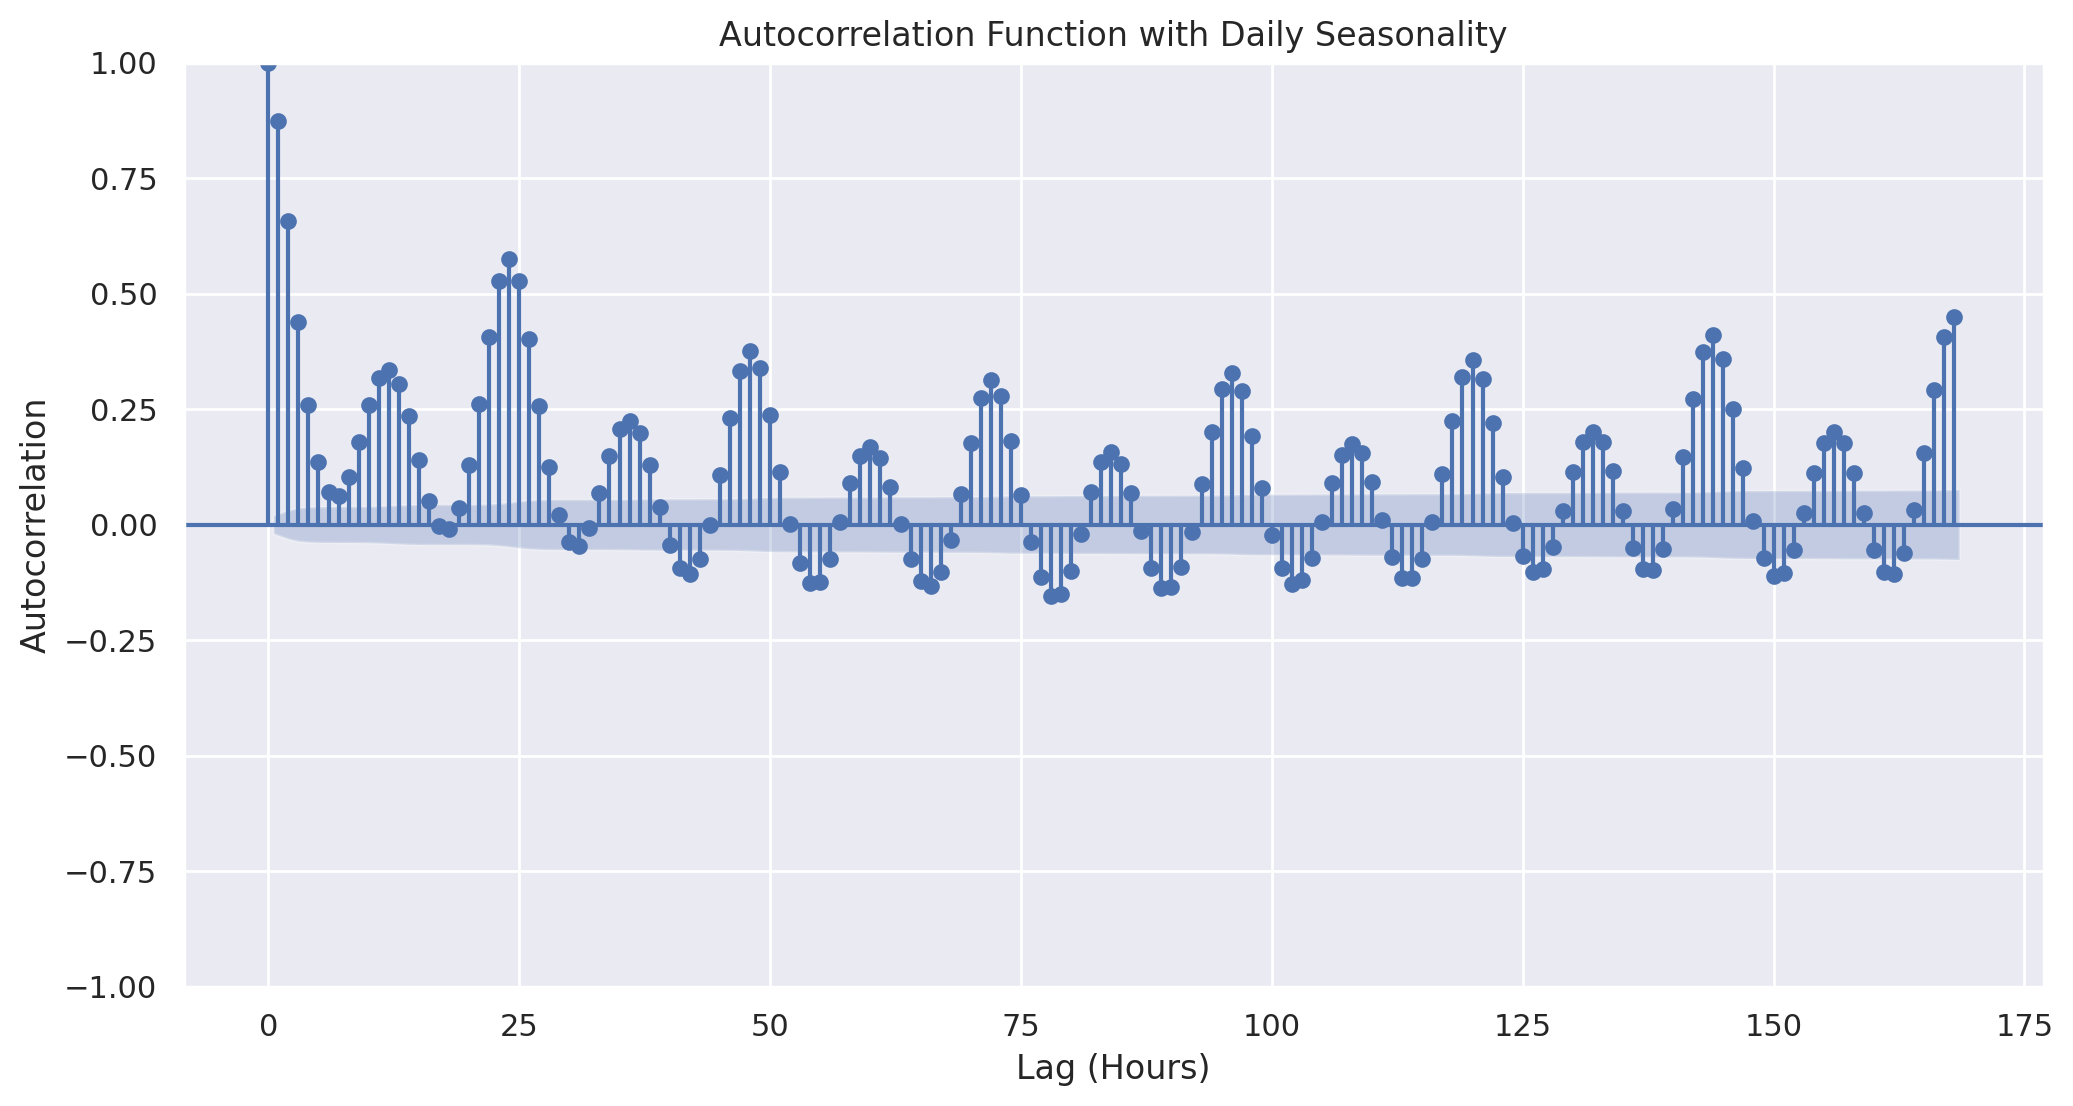

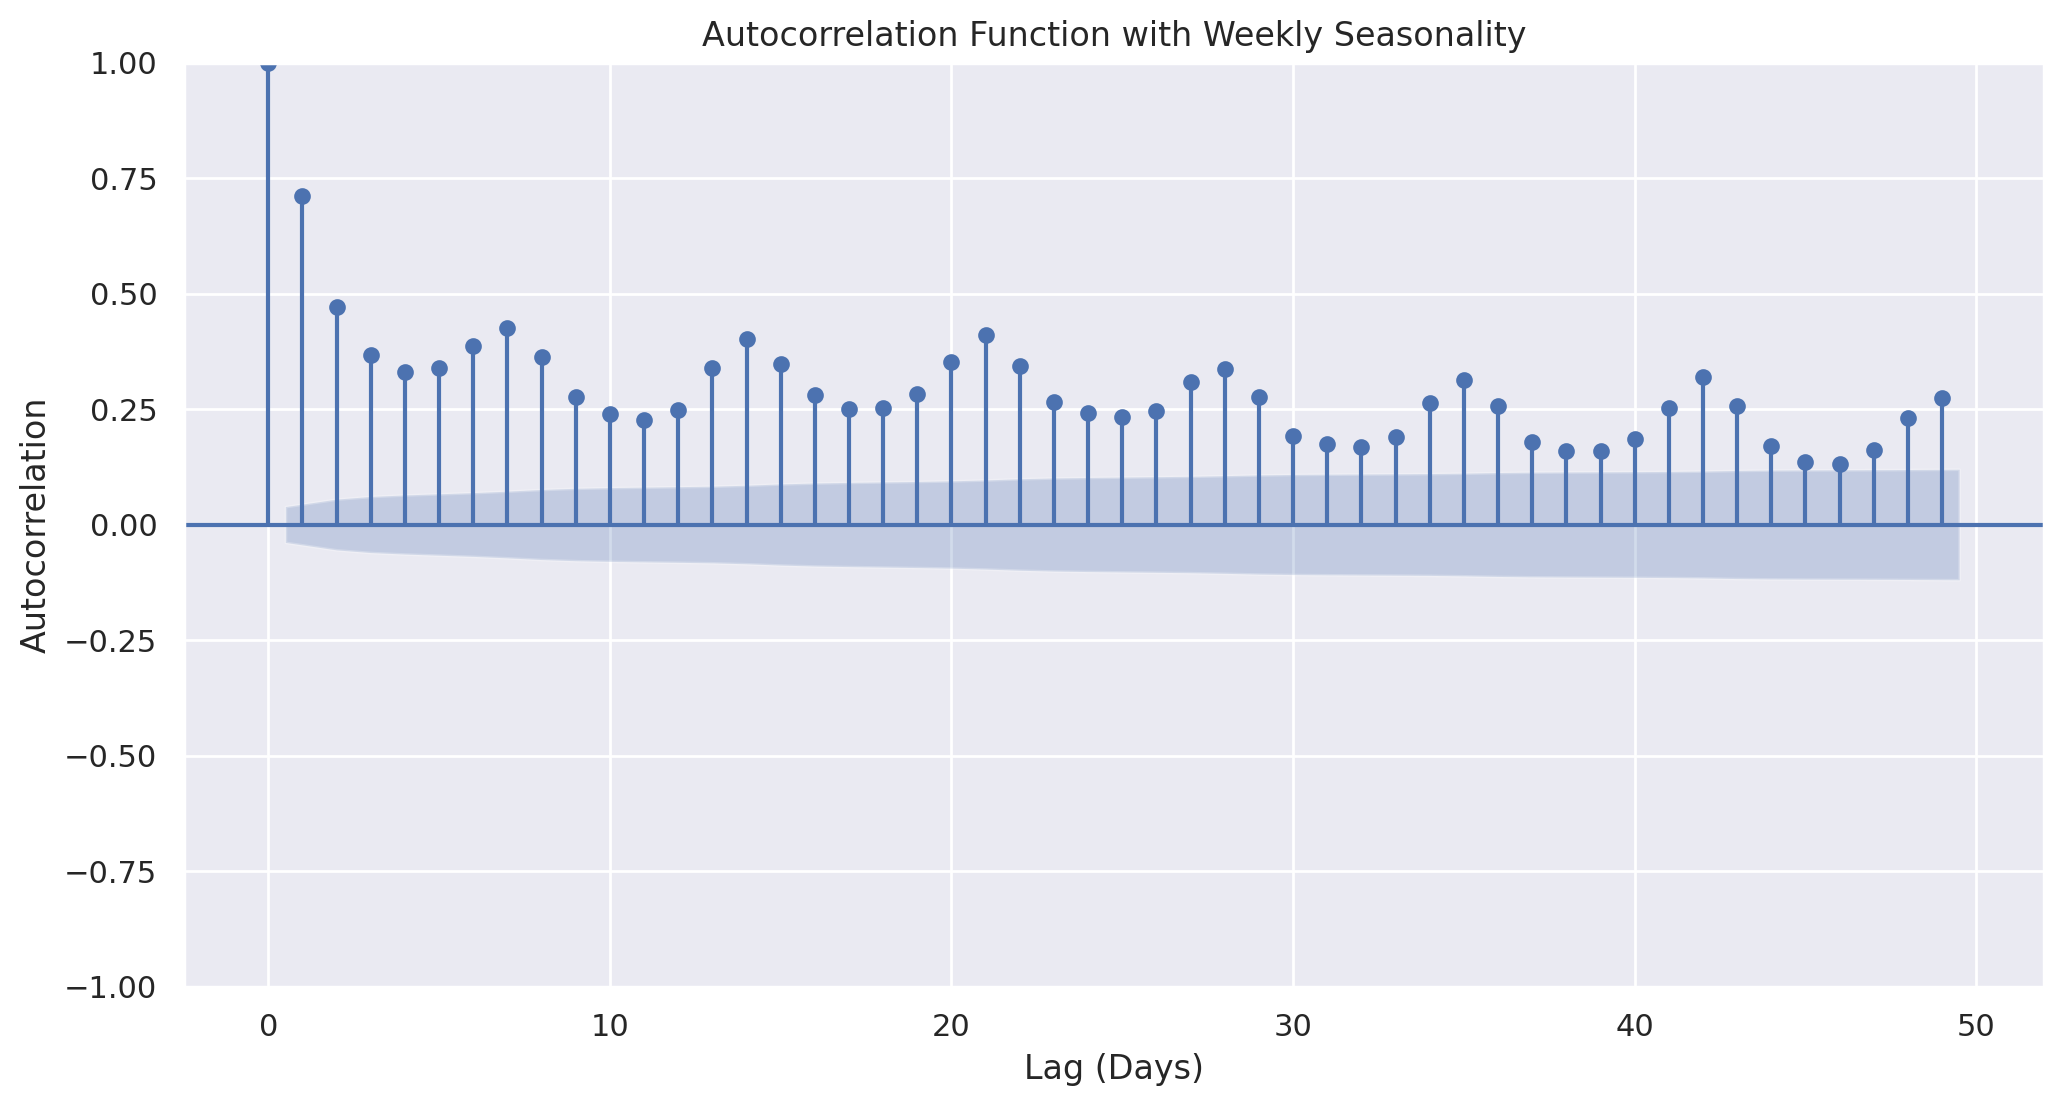

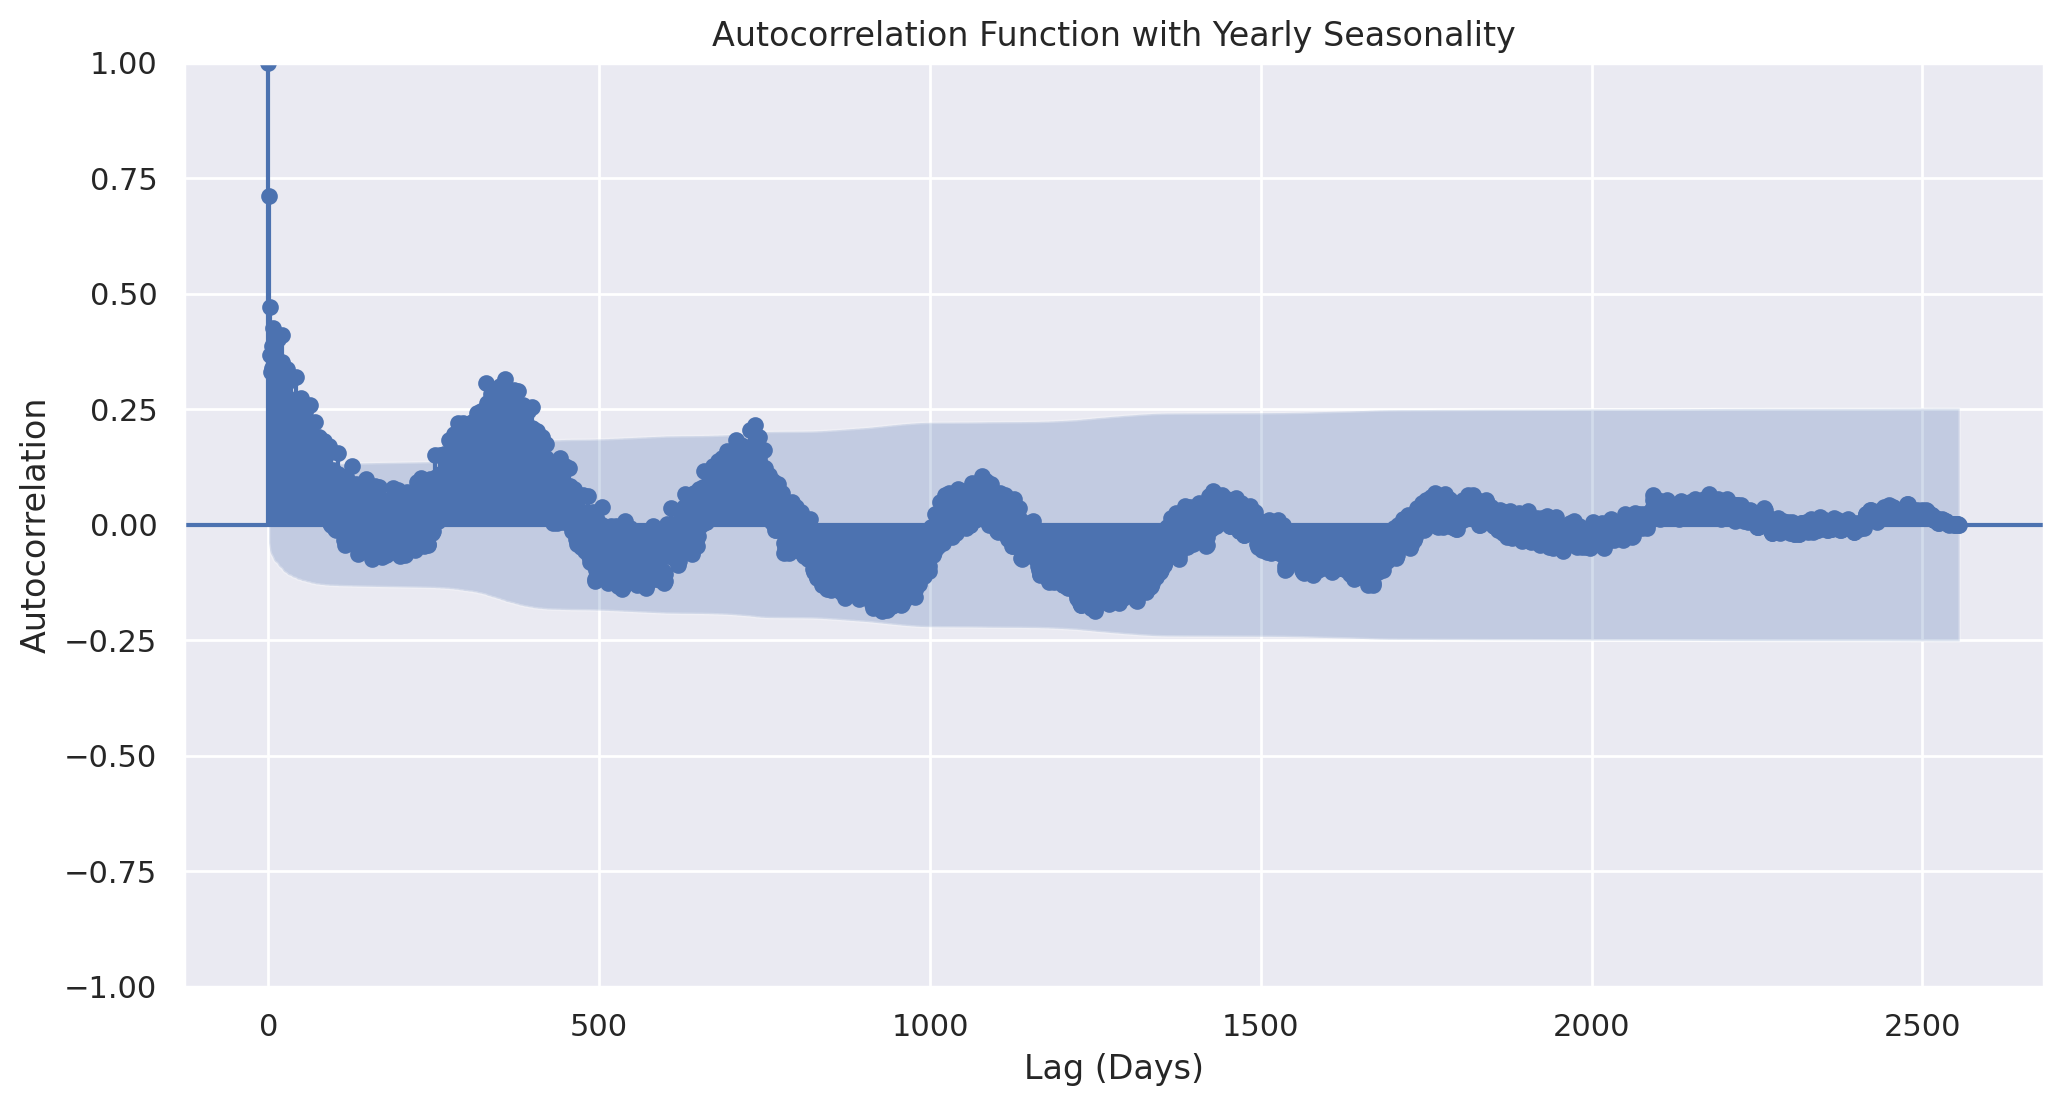

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
subset_data = alldata_melted.head(10000)
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(subset_data['NO2_Value'], lags=24*7, ax=ax)
plt.title('Autocorrelation Function with Daily Seasonality')
plt.xlabel('Lag (Hours)')
plt.ylabel('Autocorrelation')
plt.show()
subset_data = alldata_melted.head(100000)
daily_data = subset_data['NO2_Value'].resample('D').mean()
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(daily_data, lags=7*7, ax=ax)
plt.title('Autocorrelation Function with Weekly Seasonality')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()
subset_data = alldata_melted.head(10000000)
fig, ax = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(daily_data, lags=365*7, ax=ax)
plt.title('Autocorrelation Function with Yearly Seasonality')
plt.xlabel('Lag (Days)')
plt.ylabel('Autocorrelation')
plt.show()

In [ ]:
for col in alldata_melted.columns:
  print(col)

Day
Month
Year
Hour
DayOfWeek_Monday
DayOfWeek_Tuesday
DayOfWeek_Wednesday
DayOfWeek_Thursday
DayOfWeek_Friday
DayOfWeek_Saturday
DayOfWeek_Sunday
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
PoliciesandCovid
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


In [ ]:
alldata_melted

Day  Month  Year  Hour  TEMPERATURA  VIENTO  \
Timestamp                                                          
2011-01-01 00:00:00    1      1  2011     0         7.20    7.00   
2011-01-01 01:00:00    1      1  2011     1         7.50    9.00   
2011-01-01 02:00:00    1      1  2011     2         7.40    9.00   
2011-01-01 03:00:00    1      1  2011     3         7.20    6.00   
2011-01-01 04:00:00    1      1  2011     4         6.80    6.00   
...                  ...    ...   ...   ...          ...     ...   
2020-12-31 19:00:00   31     12  2020    19         5.10   25.50   
2020-12-31 20:00:00   31     12  2020    20         5.20   22.00   
2020-12-31 21:00:00   31     12  2020    21         5.10   22.50   
2020-12-31 22:00:00   31     12  2020    22         4.60   14.50   
2020-12-31 23:00:00   31     12  2020    23         3.20   19.00   

                     PRECIPITACION  PRESION  WorkingDay  PoliciesandCovid  \
Timestamp                                                                   
2011-01-01 00:00:00           0.00  9410.00           0              1.00   
2011-01-01 01:00:00           0.00  9411.00           0              1.00   
2011-01-01 02:00:00           0.00  9412.00           0              1.00   
2011-01-01 03:00:00           0.00  9413.00           0              1.00   
2011-01-01 04:00:00           0.00  9414.00           0              1.00   
...                            ...      ...         ...               ...   
2020-12-31 19:00:00           0.00  9338.00           1              0.00   
2020-12-31 20:00:00           0.00  9338.00           1              0.00   
2020-12-31 21:00:00           0.00  9338.00           1              0.00   
2020-12-31 22:00:00           5.00  9338.00           1              0.00   
2020-12-31 23:00:00           1.00  9338.00           1              0.00   

                     ...  Station_28079039  Station_28079040  \
Timestamp            ...                                       
2011-01-01 00:00:00  ...                 0                 0   
2011-01-01 01:00:00  ...                 0                 0   
2011-01-01 02:00:00  ...                 0                 0   
2011-01-01 03:00:00  ...                 0                 0   
2011-01-01 04:00:00  ...                 0                 0   
...                  ...               ...               ...   
2020-12-31 19:00:00  ...                 0                 0   
2020-12-31 20:00:00  ...                 0                 0   
2020-12-31 21:00:00  ...                 0                 0   
2020-12-31 22:00:00  ...                 0                 0   
2020-12-31 23:00:00  ...                 0                 0   

                     Station_28079048  Station_28079050  Station_28079054  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 02:00:00                 0                 0                 0   
2011-01-01 03:00:00                 0                 0                 0   
2011-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2020-12-31 19:00:00                 0                 0                 0   
2020-12-31 20:00:00                 0                 0                 0   
2020-12-31 21:00:00                 0                 0                 0   
2020-12-31 22:00:00                 0                 0                 0   
2020-12-31 23:00:00                 0                 0                 0   

                     Station_28079055  Station_28079057  Station_28079058  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0             

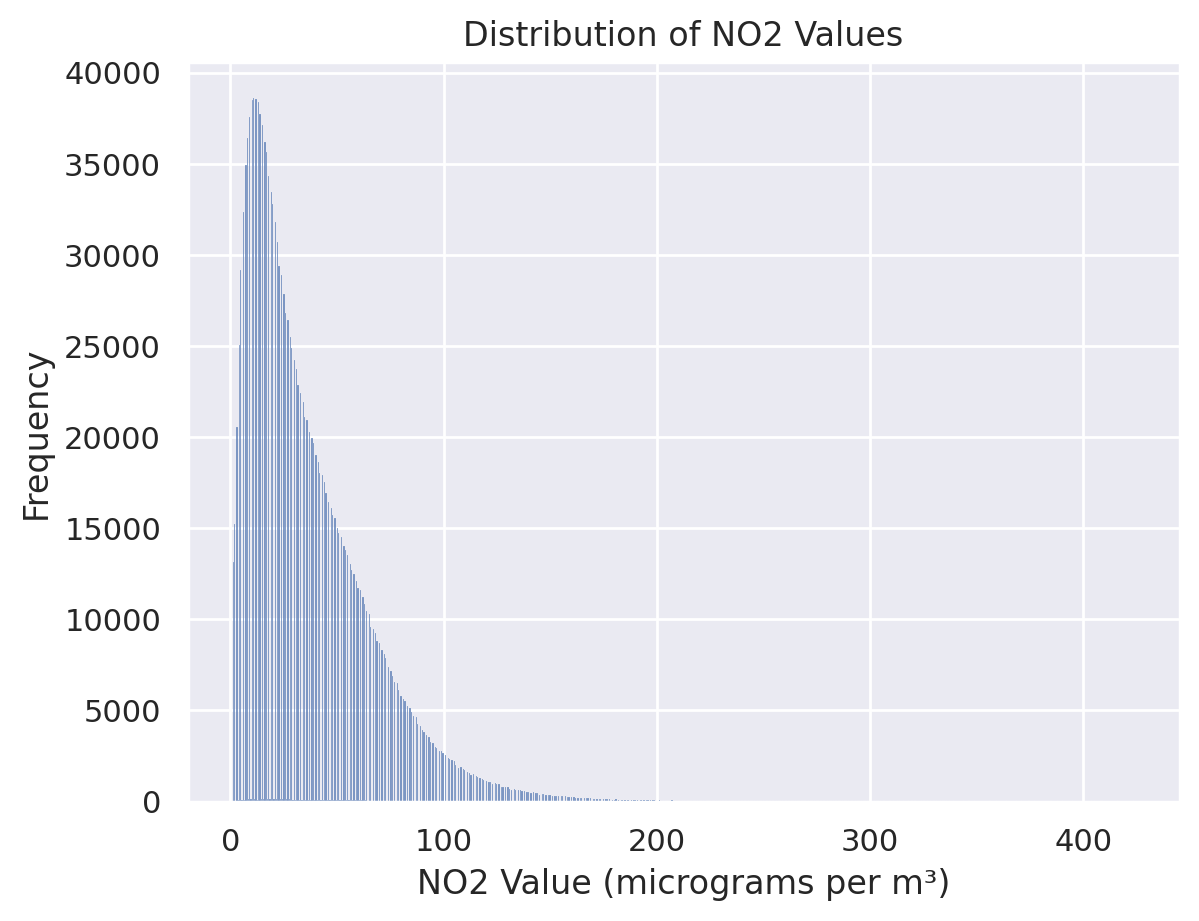

In [ ]:
import seaborn as sns
sns.histplot(alldata_melted['NO2_Value'], kde=False)
plt.title('Distribution of NO2 Values')
plt.xlabel('NO2 Value (micrograms per m³)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
statistics = alldata_melted['NO2_Value'].describe()
print("Summary Statistics for NO2 Values:")
print(statistics)

Summary Statistics for NO2 Values:
count   1753440.00
mean         36.50
std          29.40
min           1.00
25%          15.00
50%          29.00
75%          51.00
max         424.00
Name: NO2_Value, dtype: float64


In [ ]:
total_samples = len(alldata_melted)
percentage_below_100 = (alldata_melted['NO2_Value'] <= 100).sum() / total_samples * 100
print(f"Percentage of samples with NO2 value <= 100: {percentage_below_100:.2f}%")
percentage_over_180 = (alldata_melted['NO2_Value'] > 180).sum() / total_samples * 100
print(f"Percentage of samples with NO2 value > 180: {percentage_over_180:.2f}%")

Percentage of samples with NO2 value <= 100: 96.35%
Percentage of samples with NO2 value > 180: 0.20%


<ipython-input-116-3d3038e38248>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Station', y='NO2_Value', data=melted_data, palette='Set2')


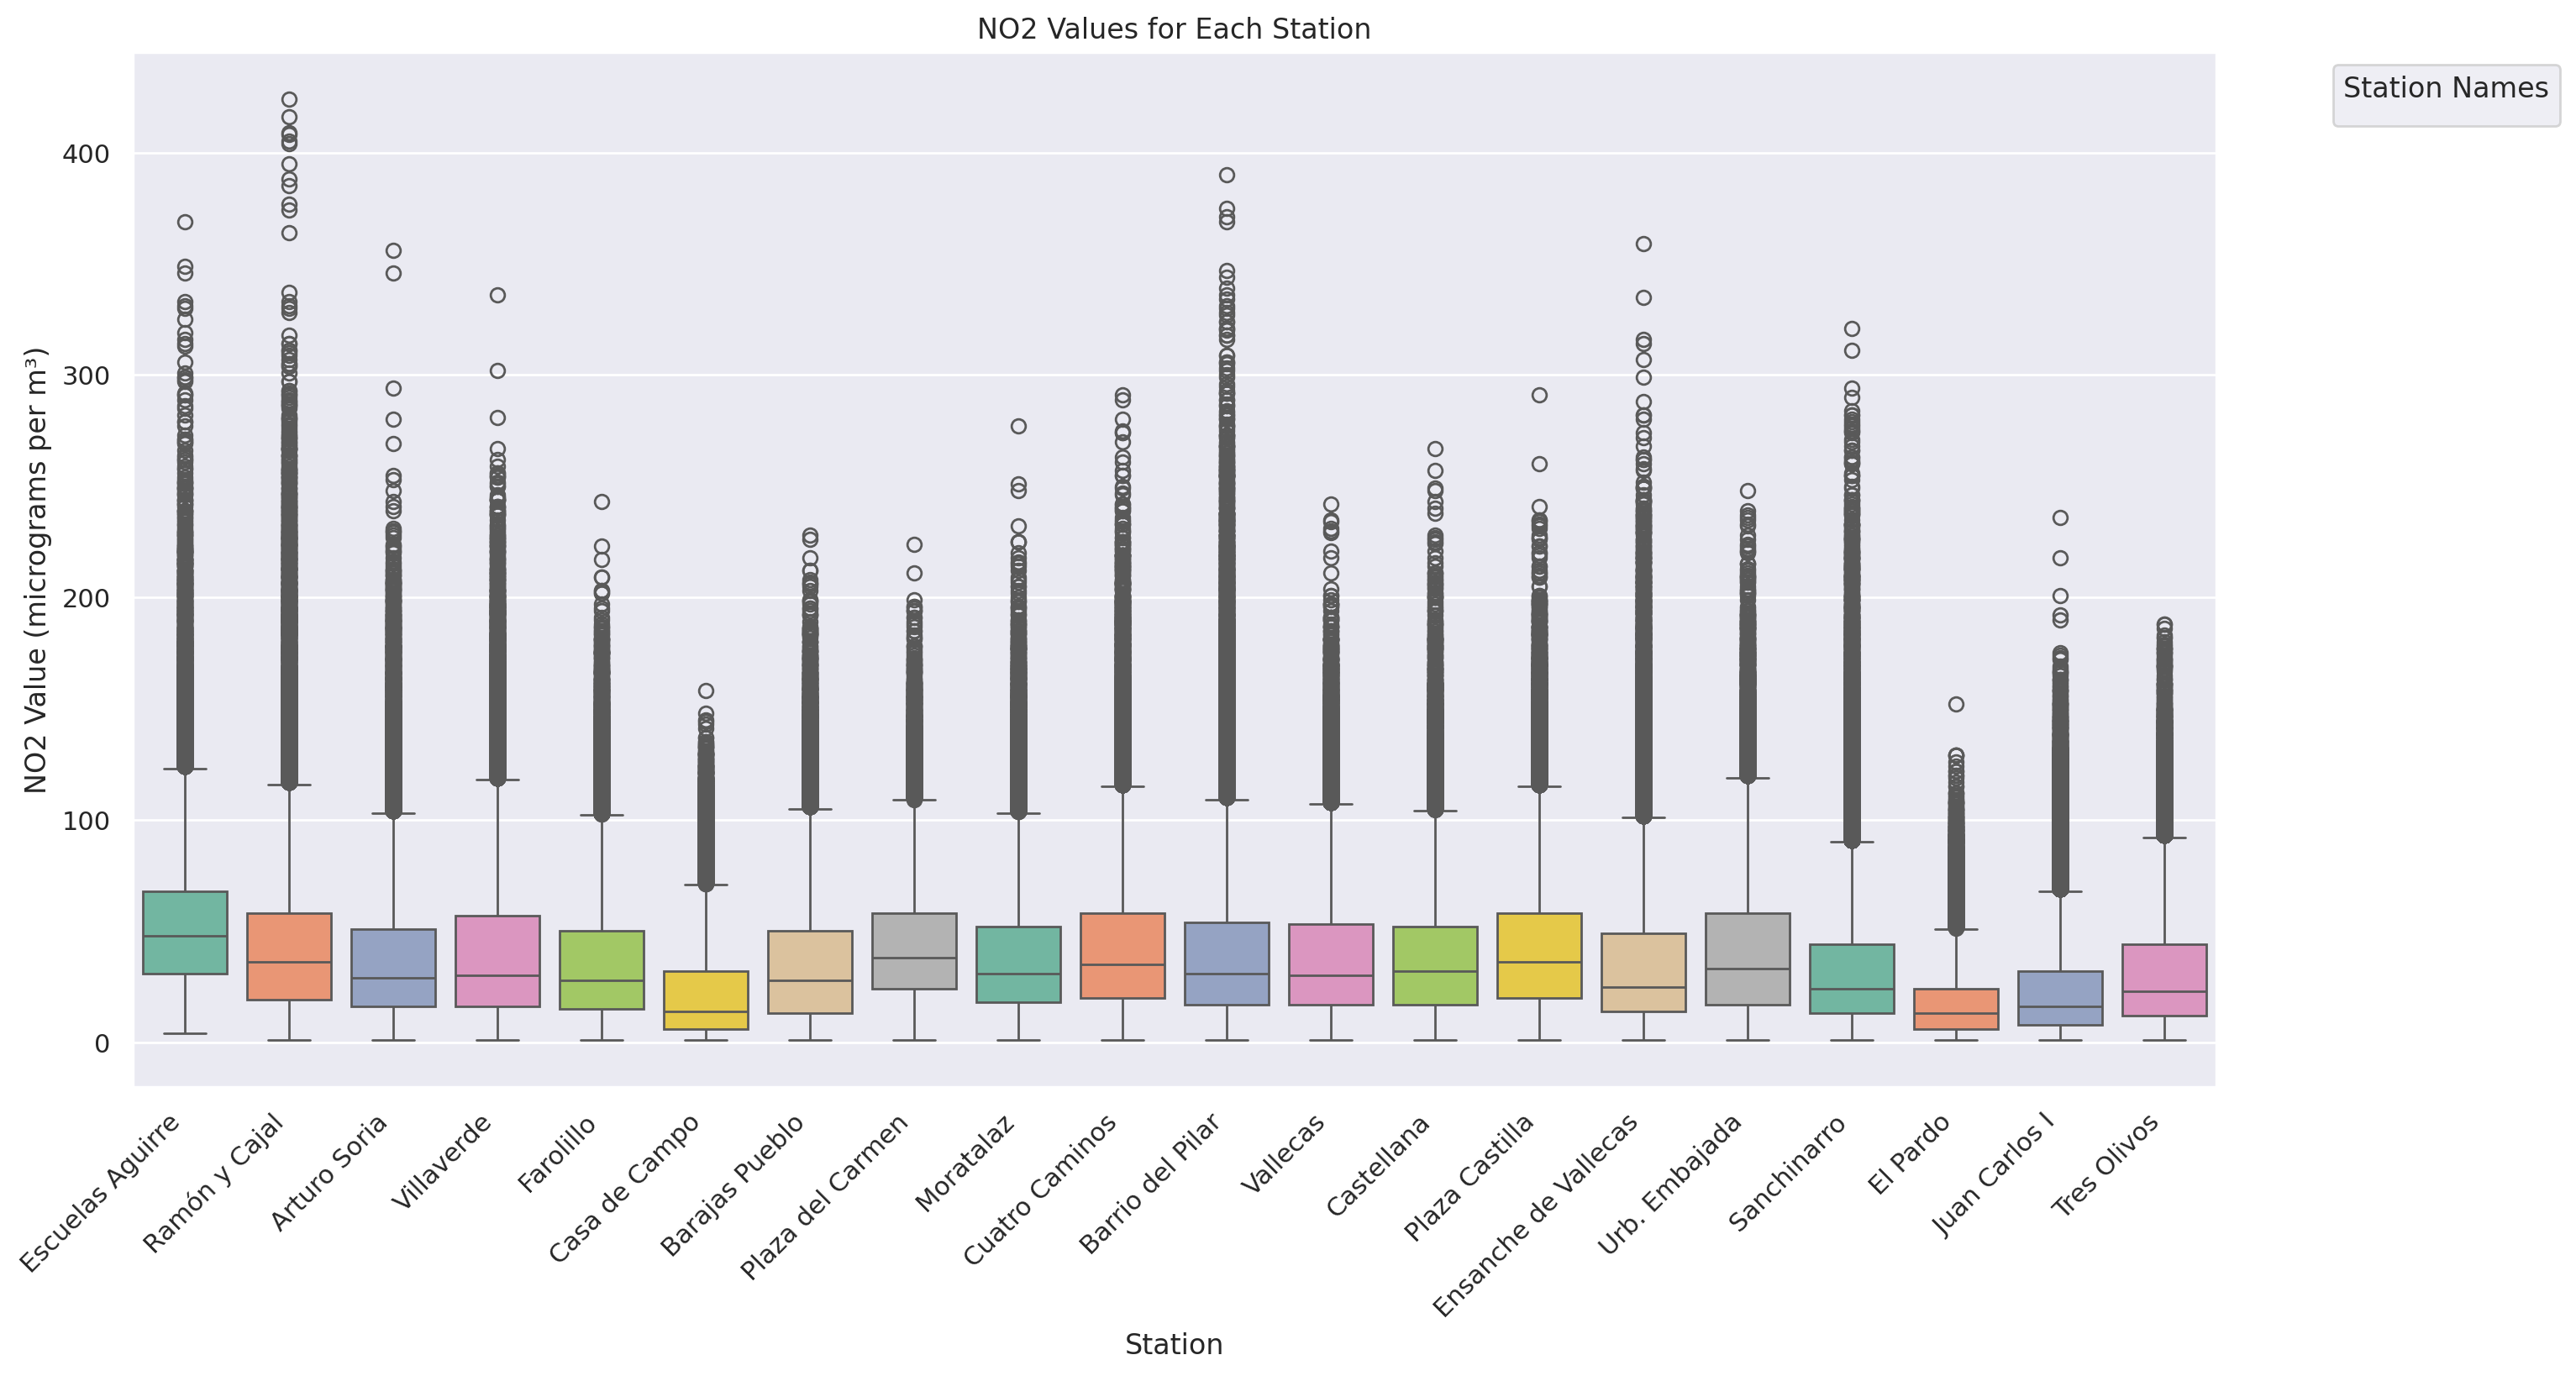

In [ ]:
columns_to_plot = ['NO2_Value', 'Escuelas Aguirre', 'Ramón y Cajal', 'Arturo Soria', 'Villaverde', 'Farolillo', 'Casa de Campo', 'Barajas Pueblo','Plaza del Carmen', 'Moratalaz', 'Cuatro Caminos', 'Barrio del Pilar', 'Vallecas', 'Castellana', 'Plaza Castilla','Ensanche de Vallecas', 'Urb. Embajada', 'Sanchinarro', 'El Pardo', 'Juan Carlos I', 'Tres Olivos']
selected_data = alldata_melted[columns_to_plot]
melted_data = selected_data.melt(id_vars=['NO2_Value'], var_name='Station', value_name='BinaryStation')
melted_data = melted_data[melted_data['BinaryStation'] == 1]
plt.figure(figsize=(16, 8))
sns.boxplot(x='Station', y='NO2_Value', data=melted_data, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('NO2 Values for Each Station')
plt.xlabel('Station')
plt.ylabel('NO2 Value (micrograms per m³)')
plt.legend(title='Station Names', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


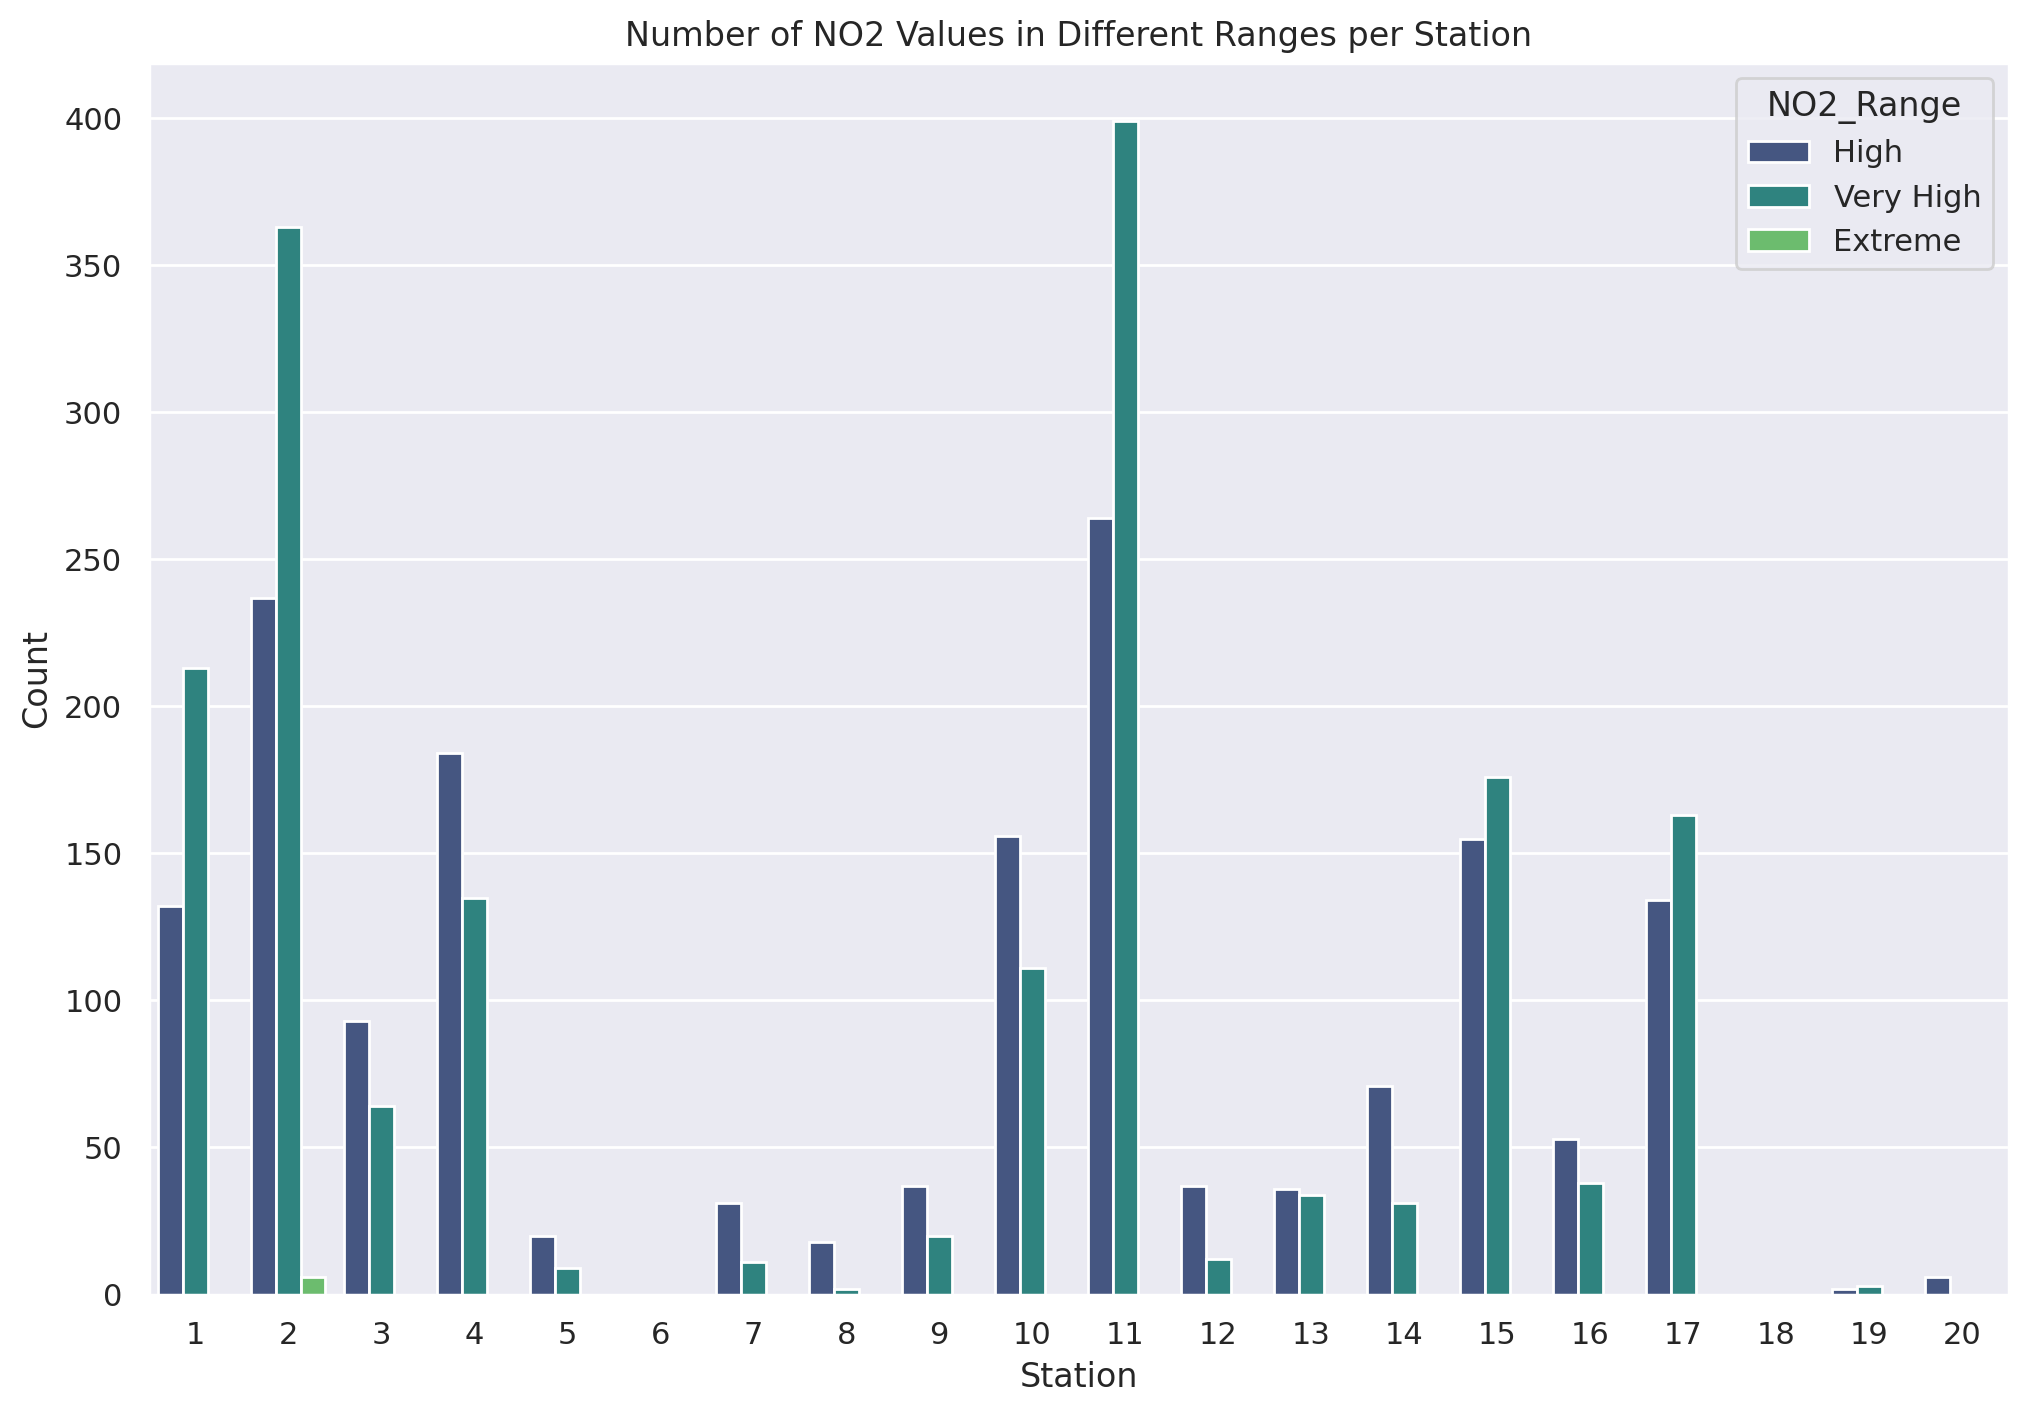

In [ ]:
high_range = (180, 200)
very_high_range = (200, 400)
extreme_range = (400, float('inf'))
melted_data['NO2_Range'] = pd.cut(melted_data['NO2_Value'], bins=[*high_range, *very_high_range, *extreme_range], labels=['High', 'Very High', 'Extreme'], duplicates='drop')
plt.figure(figsize=(12, 8))
sns.countplot(x='Station', hue='NO2_Range', data=melted_data, palette='viridis')
plt.title('Number of NO2 Values in Different Ranges per Station')
plt.xlabel('Station')
plt.ylabel('Count')
station_numbers = list(range(1, 21))
plt.xticks(ticks=range(20), labels=station_numbers)
plt.show()

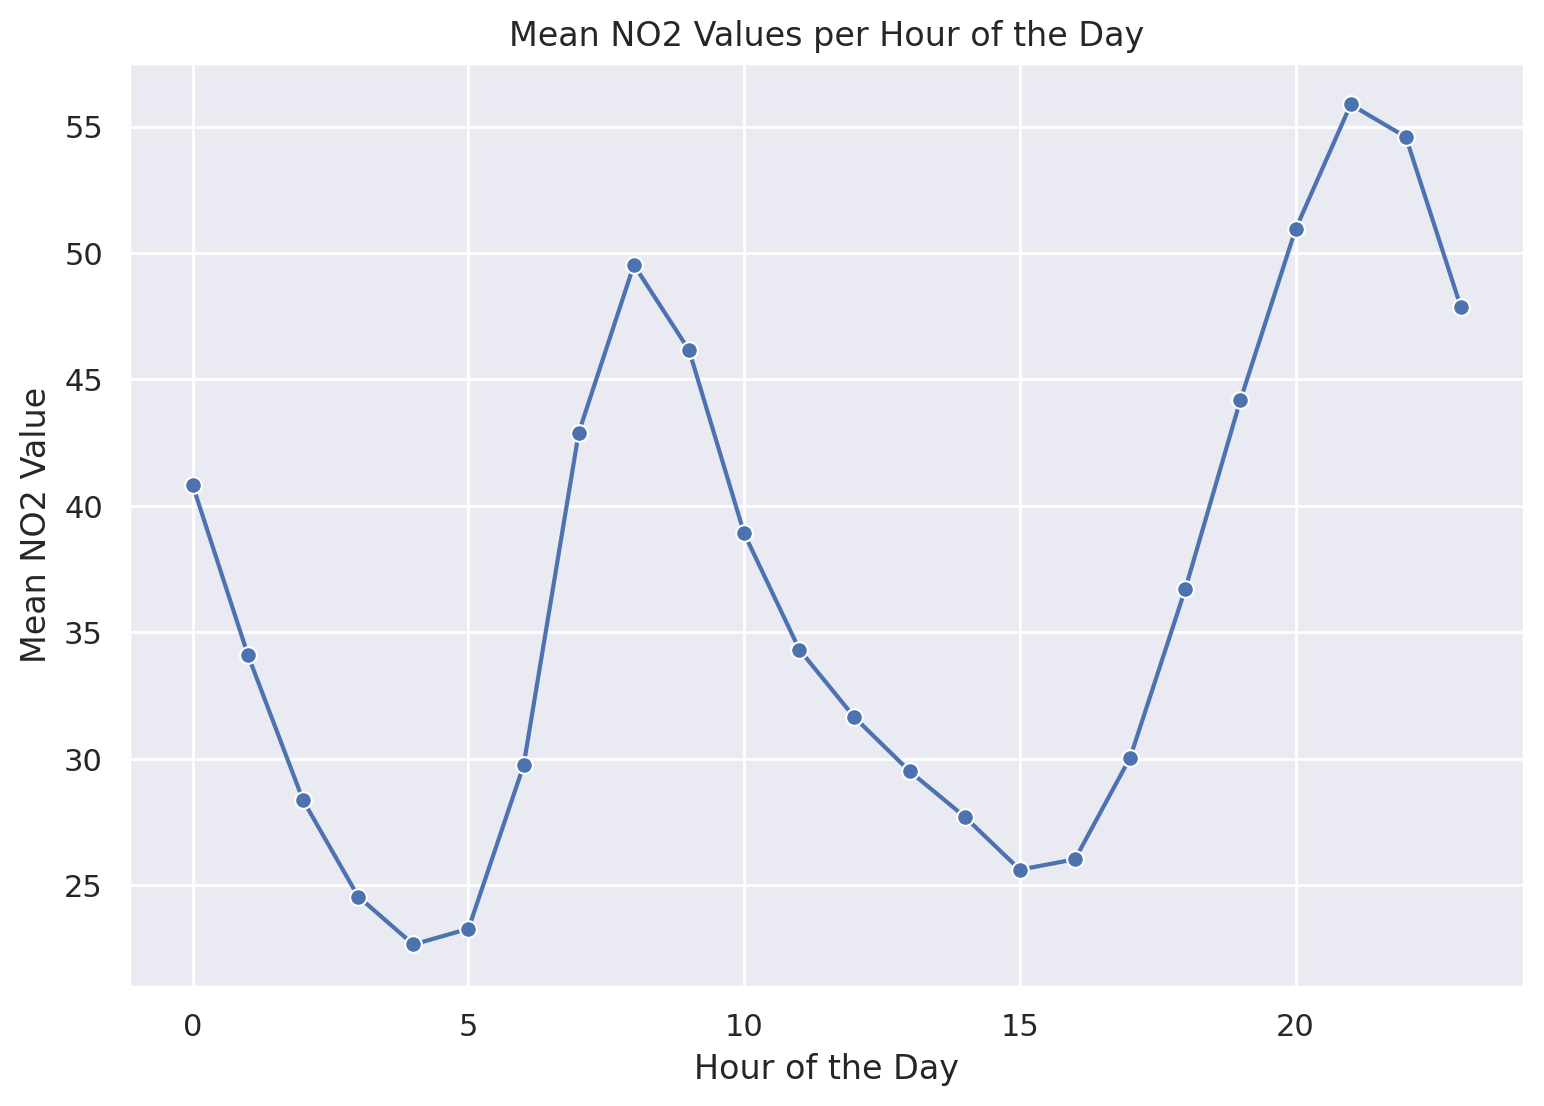

In [ ]:
plt.figure(figsize=(9, 6))
mean_values_per_hour = alldata_melted.groupby('Hour')['NO2_Value'].mean().reset_index()
sns.lineplot(x='Hour', y='NO2_Value', data=mean_values_per_hour, marker='o', color='b')
plt.title('Mean NO2 Values per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean NO2 Value')
plt.show()

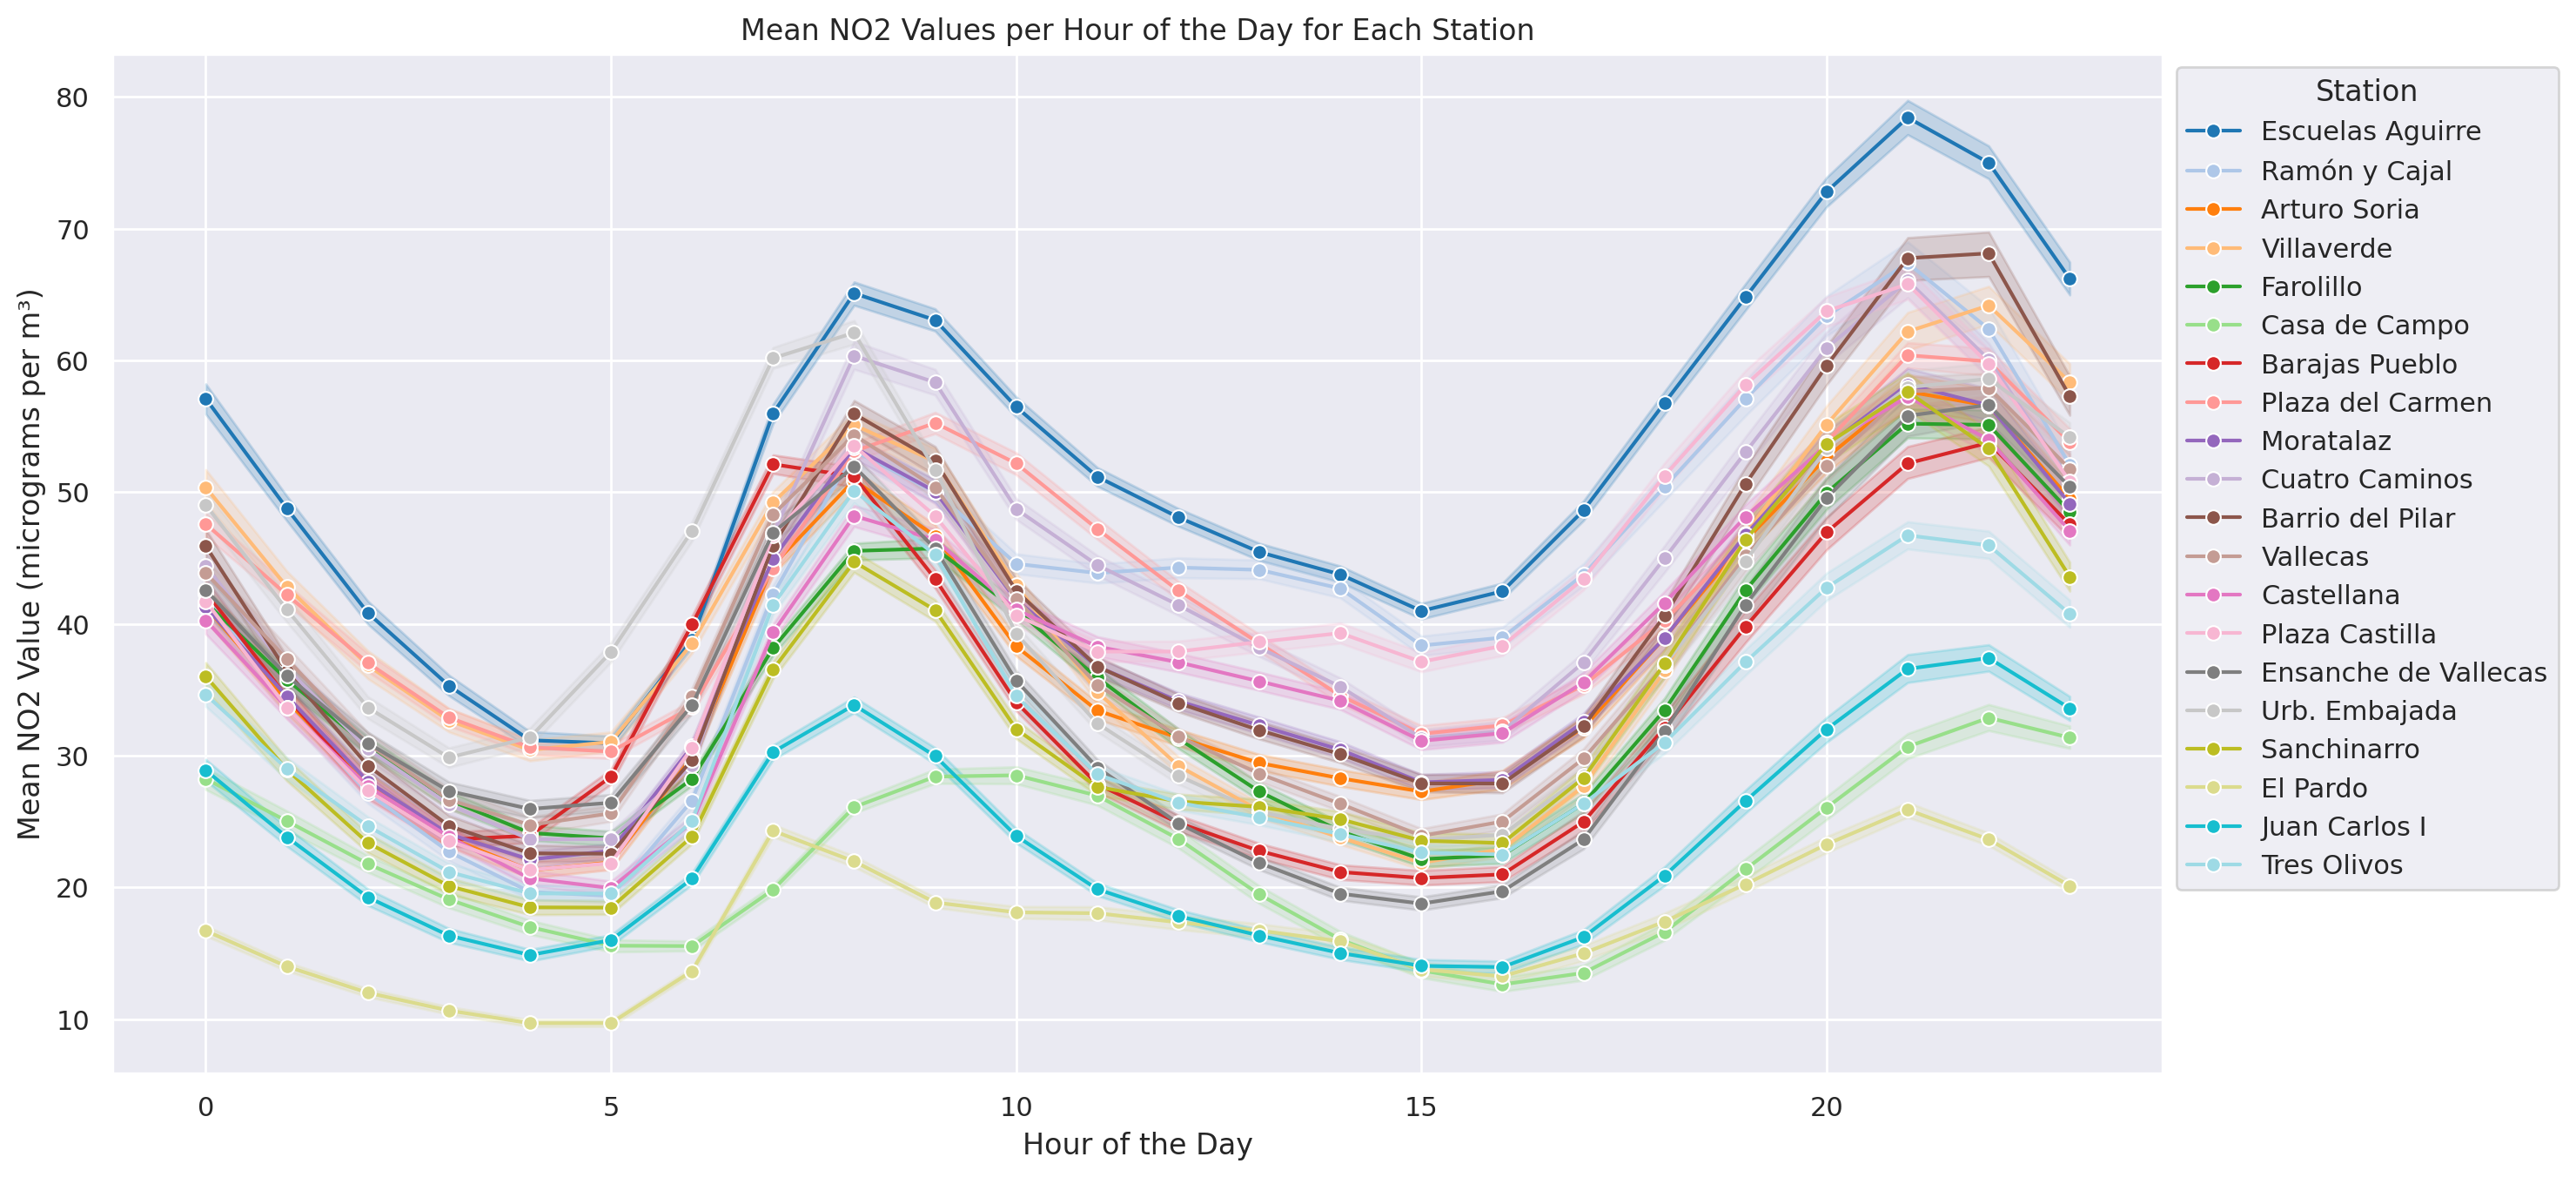

In [ ]:
plt.figure(figsize=(15.2, 7.6))
columns_to_plot = ['NO2_Value', 'Hour', 'Escuelas Aguirre', 'Ramón y Cajal', 'Arturo Soria', 'Villaverde', 'Farolillo', 'Casa de Campo', 'Barajas Pueblo','Plaza del Carmen', 'Moratalaz', 'Cuatro Caminos', 'Barrio del Pilar', 'Vallecas', 'Castellana', 'Plaza Castilla','Ensanche de Vallecas', 'Urb. Embajada', 'Sanchinarro', 'El Pardo', 'Juan Carlos I', 'Tres Olivos']
selected_data = alldata_melted[columns_to_plot]
melted_data = selected_data.melt(id_vars=['NO2_Value', 'Hour'], var_name='Station', value_name='BinaryStation')
melted_data = melted_data[melted_data['BinaryStation'] == 1]
sns.lineplot(x='Hour', y='NO2_Value', hue='Station', data=melted_data, marker='o', palette='tab20')
plt.title('Mean NO2 Values per Hour of the Day for Each Station')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean NO2 Value (micrograms per m³)')
plt.legend(title='Station', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-121-9f2d224a94ab>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DayOfWeek', y='NO2_Value', data=melted_data, palette='viridis')


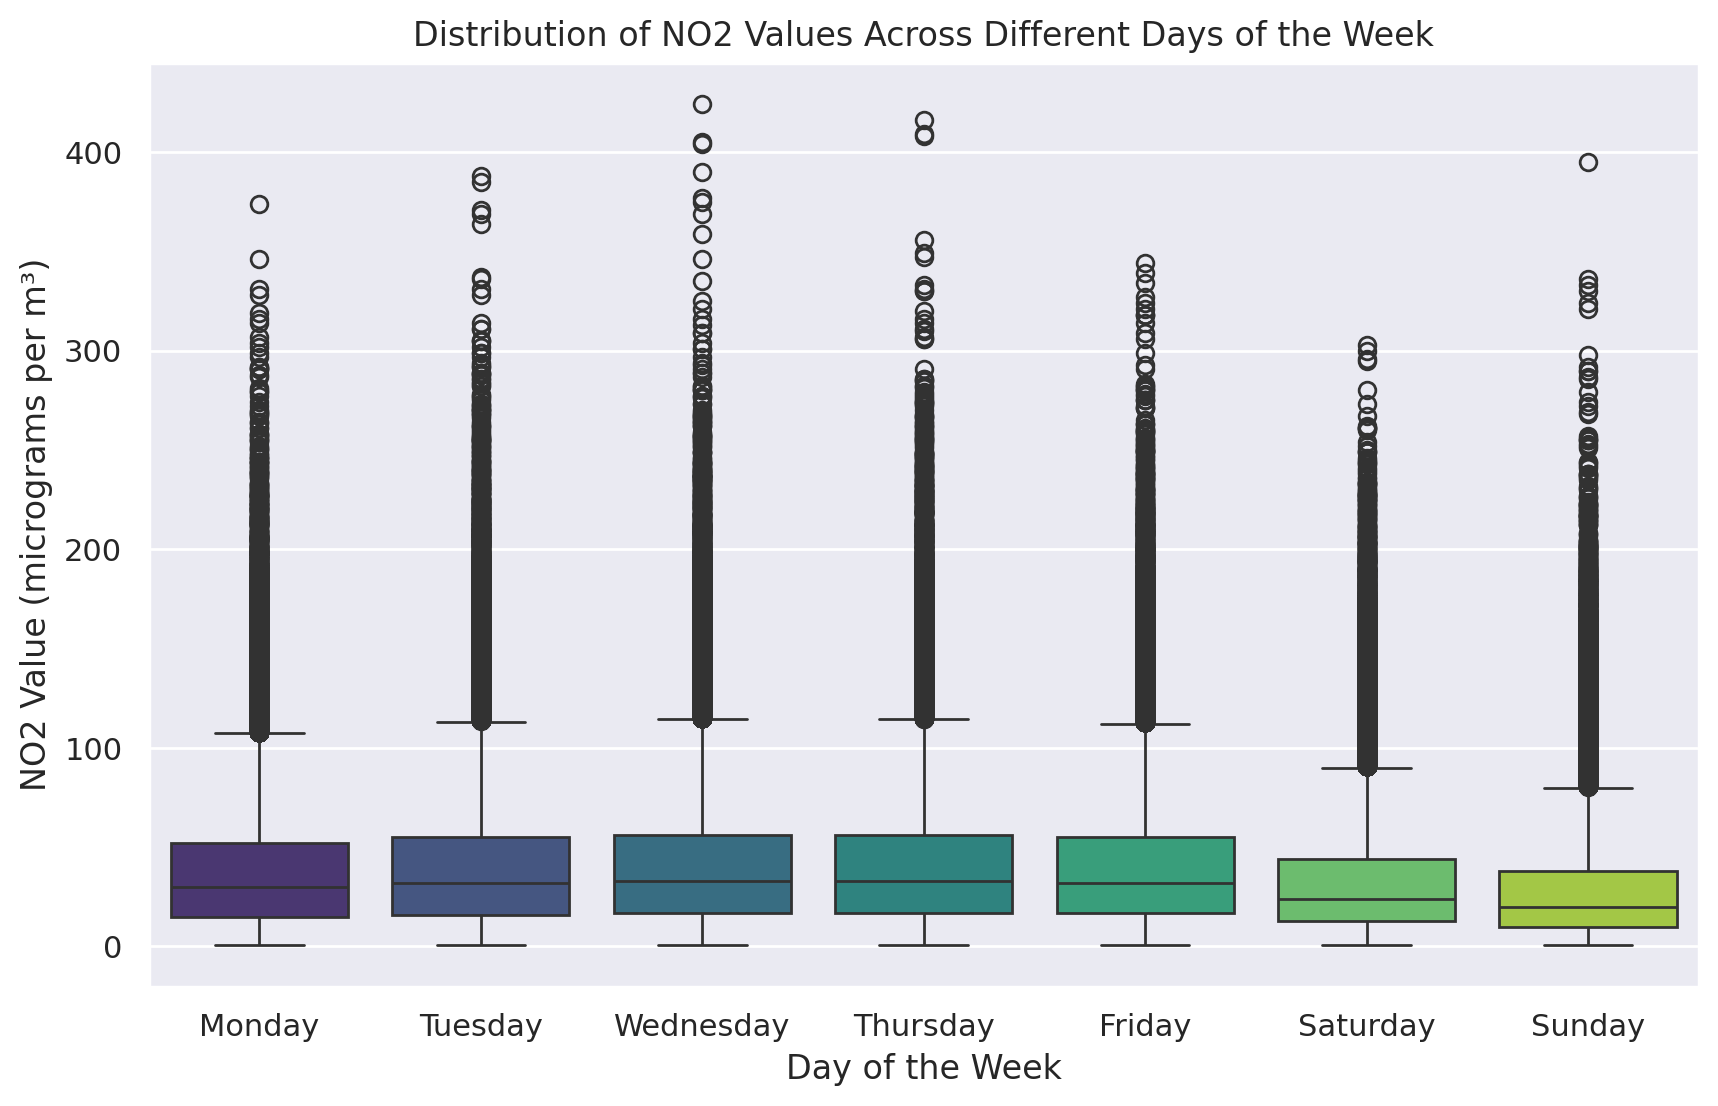

In [ ]:
columns_to_plot = ['NO2_Value', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday','DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']
selected_data = alldata_melted[columns_to_plot]
melted_data = selected_data.melt(id_vars=['NO2_Value'], var_name='DayOfWeek', value_name='BinaryDayOfWeek')
melted_data = melted_data[melted_data['BinaryDayOfWeek'] == 1]
day_mapping = {'DayOfWeek_Monday': 'Monday','DayOfWeek_Tuesday': 'Tuesday','DayOfWeek_Wednesday': 'Wednesday','DayOfWeek_Thursday': 'Thursday','DayOfWeek_Friday': 'Friday','DayOfWeek_Saturday': 'Saturday','DayOfWeek_Sunday': 'Sunday'}
melted_data['DayOfWeek'] = melted_data['DayOfWeek'].map(day_mapping)
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='NO2_Value', data=melted_data, palette='viridis')
plt.title('Distribution of NO2 Values Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Value (micrograms per m³)')
plt.show()

<ipython-input-122-c6e1b39385f7>:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DayOfWeek', y='NO2_Value', data=melted_data, ci=None, palette='viridis')
<ipython-input-122-c6e1b39385f7>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='NO2_Value', data=melted_data, ci=None, palette='viridis')


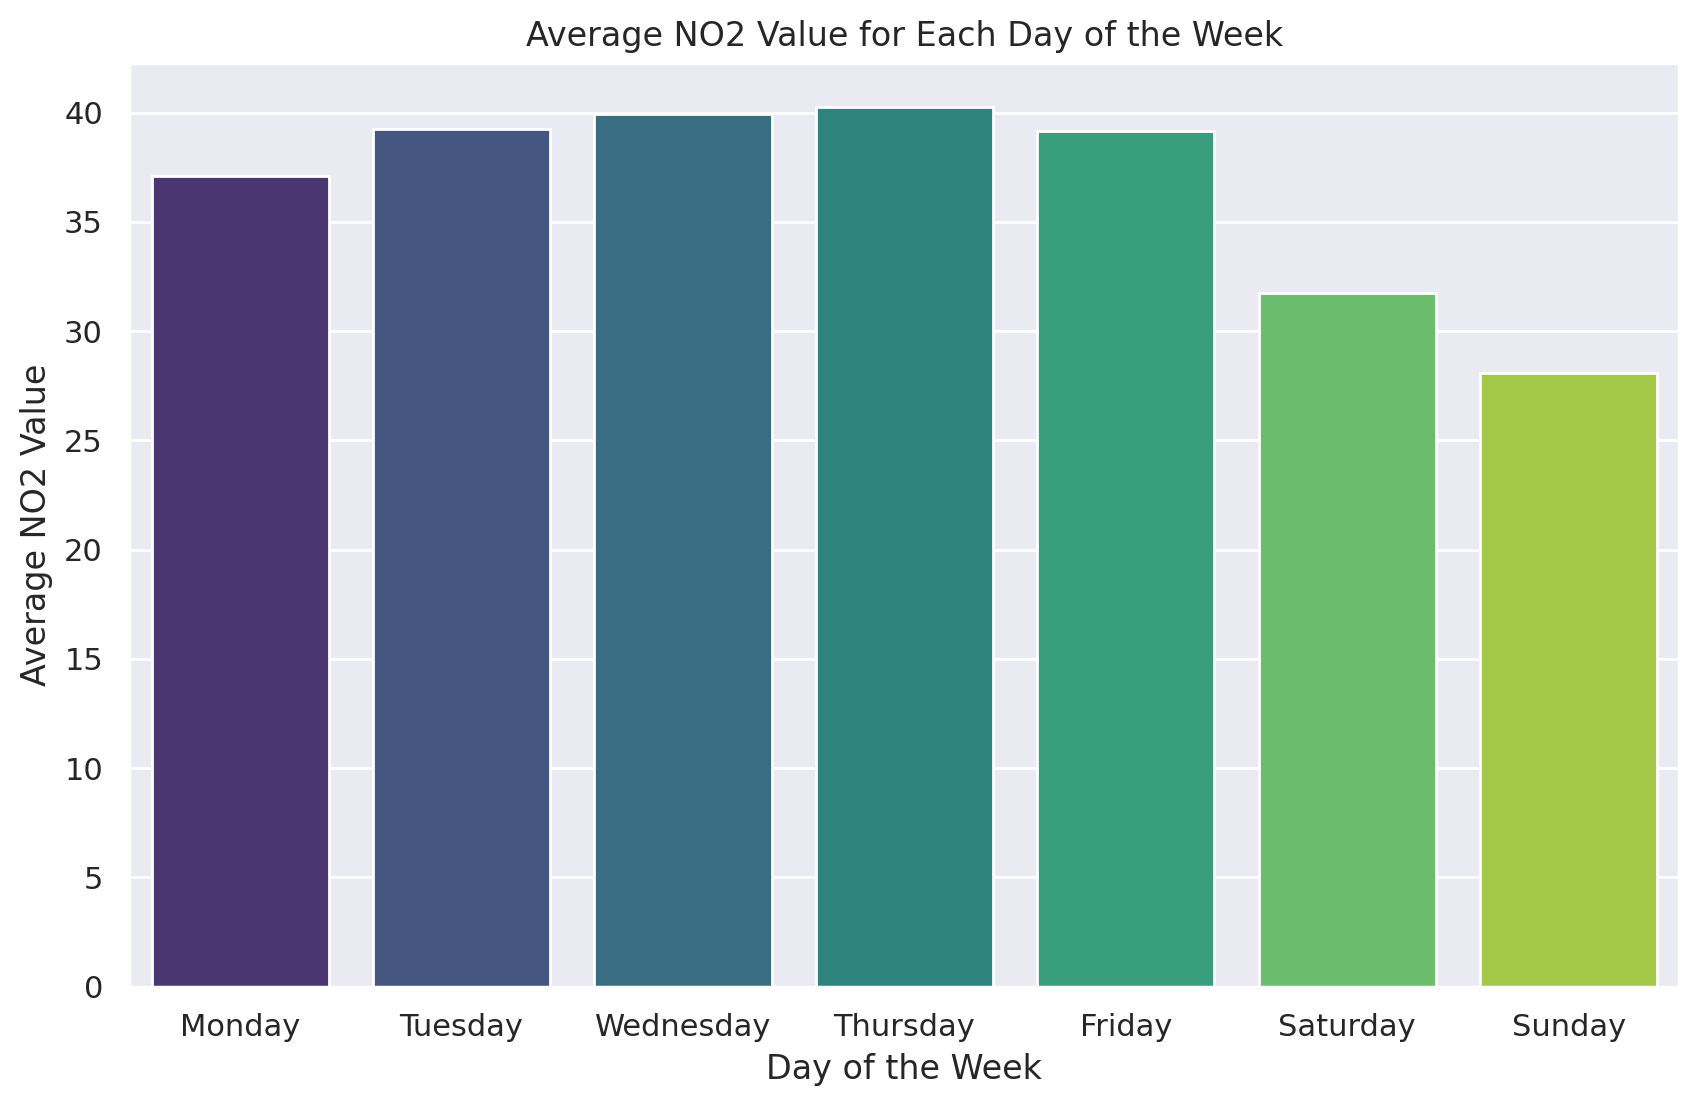

In [ ]:
columns_to_plot = ['NO2_Value', 'DayOfWeek_Monday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday','DayOfWeek_Thursday', 'DayOfWeek_Friday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday']
selected_data = alldata_melted[columns_to_plot]
melted_data = selected_data.melt(id_vars=['NO2_Value'], var_name='DayOfWeek', value_name='BinaryDayOfWeek')
melted_data = melted_data[melted_data['BinaryDayOfWeek'] == 1]
day_mapping = {'DayOfWeek_Monday': 'Monday','DayOfWeek_Tuesday': 'Tuesday','DayOfWeek_Wednesday': 'Wednesday','DayOfWeek_Thursday': 'Thursday','DayOfWeek_Friday': 'Friday','DayOfWeek_Saturday': 'Saturday','DayOfWeek_Sunday': 'Sunday'}

# Replace the labels in the 'DayOfWeek' column
melted_data['DayOfWeek'] = melted_data['DayOfWeek'].map(day_mapping)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the average NO2 value for each day of the week
sns.barplot(x='DayOfWeek', y='NO2_Value', data=melted_data, ci=None, palette='viridis')

# Add labels and title
plt.title('Average NO2 Value for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average NO2 Value')

# Show the plot
plt.show()



<ipython-input-53-a8e83134aadf>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WorkingDay', y='NO2_Value', data=alldata_melted, palette='viridis')


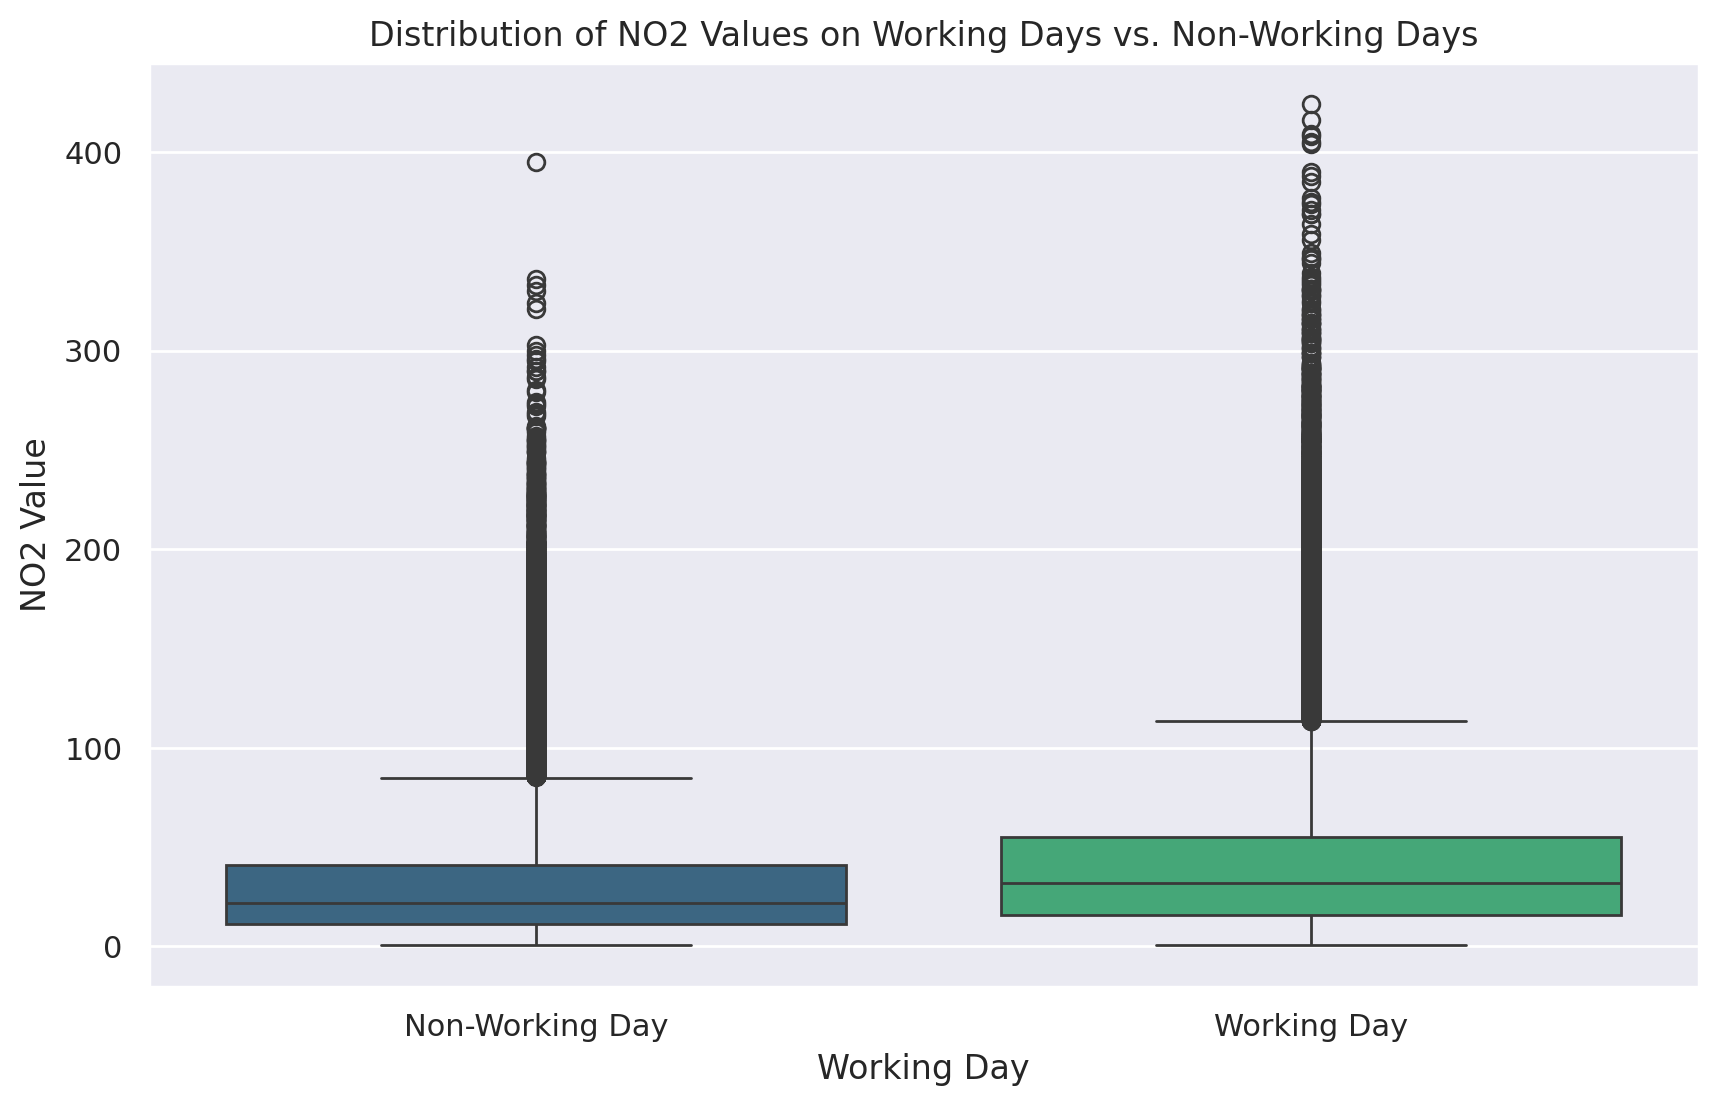

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'WorkingDay' is the binary column representing working days (1) and non-working days (0)
# You can update the column names if they differ in your DataFrame

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot for NO2 values comparing working days and non-working days
sns.boxplot(x='WorkingDay', y='NO2_Value', data=alldata_melted, palette='viridis')

# Add labels and title
plt.title('Distribution of NO2 Values on Working Days vs. Non-Working Days')
plt.xlabel('Working Day')
plt.ylabel('NO2 Value')

# Set x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Working Day', 'Working Day'])

# Show the plot
plt.show()


<ipython-input-54-5c2629efe9c3>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WorkingDay', y='NO2_Value', data=alldata_melted, ci=None, palette='viridis')
<ipython-input-54-5c2629efe9c3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WorkingDay', y='NO2_Value', data=alldata_melted, ci=None, palette='viridis')


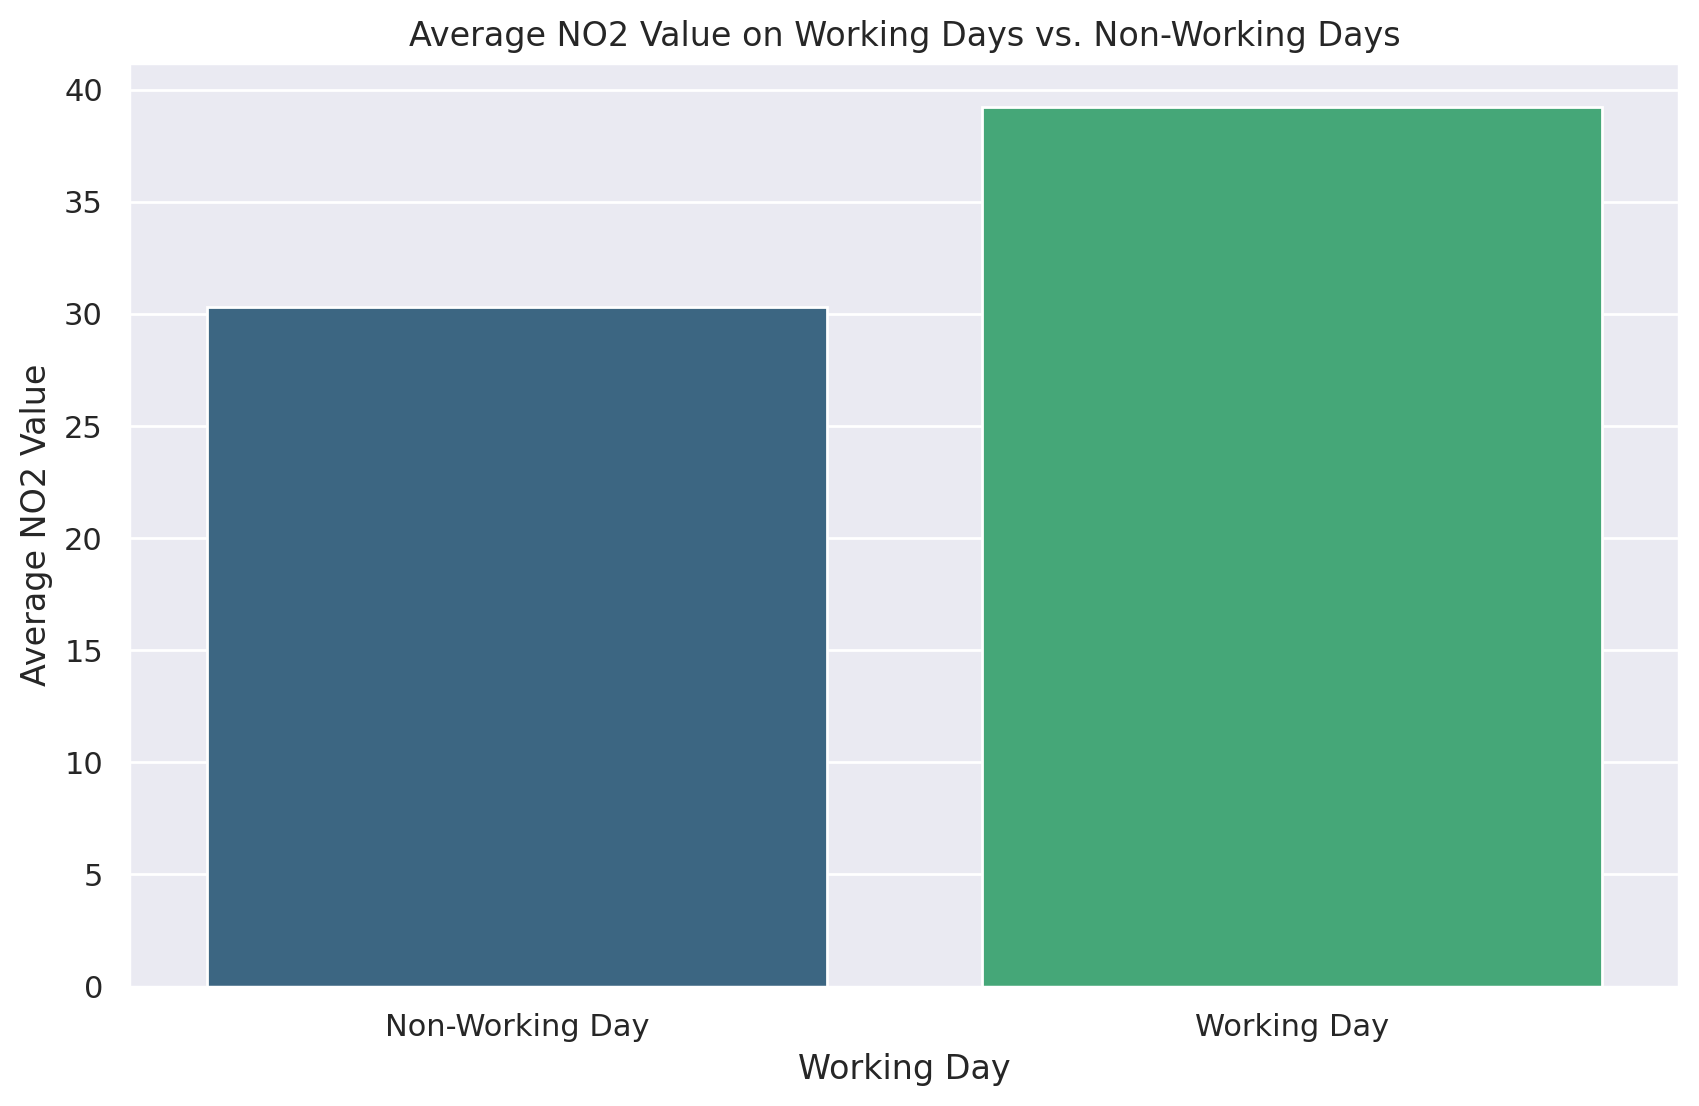

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'WorkingDay' is the binary column representing working days (1) and non-working days (0)
# You can update the column names if they differ in your DataFrame

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot for the average NO2 value comparing working days and non-working days
sns.barplot(x='WorkingDay', y='NO2_Value', data=alldata_melted, ci=None, palette='viridis')

# Add labels and title
plt.title('Average NO2 Value on Working Days vs. Non-Working Days')
plt.xlabel('Working Day')
plt.ylabel('Average NO2 Value')

# Set x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['Non-Working Day', 'Working Day'])

# Show the plot
plt.show()


<ipython-input-58-dea93f77695f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='NO2_Value', data=selected_data, palette='viridis')


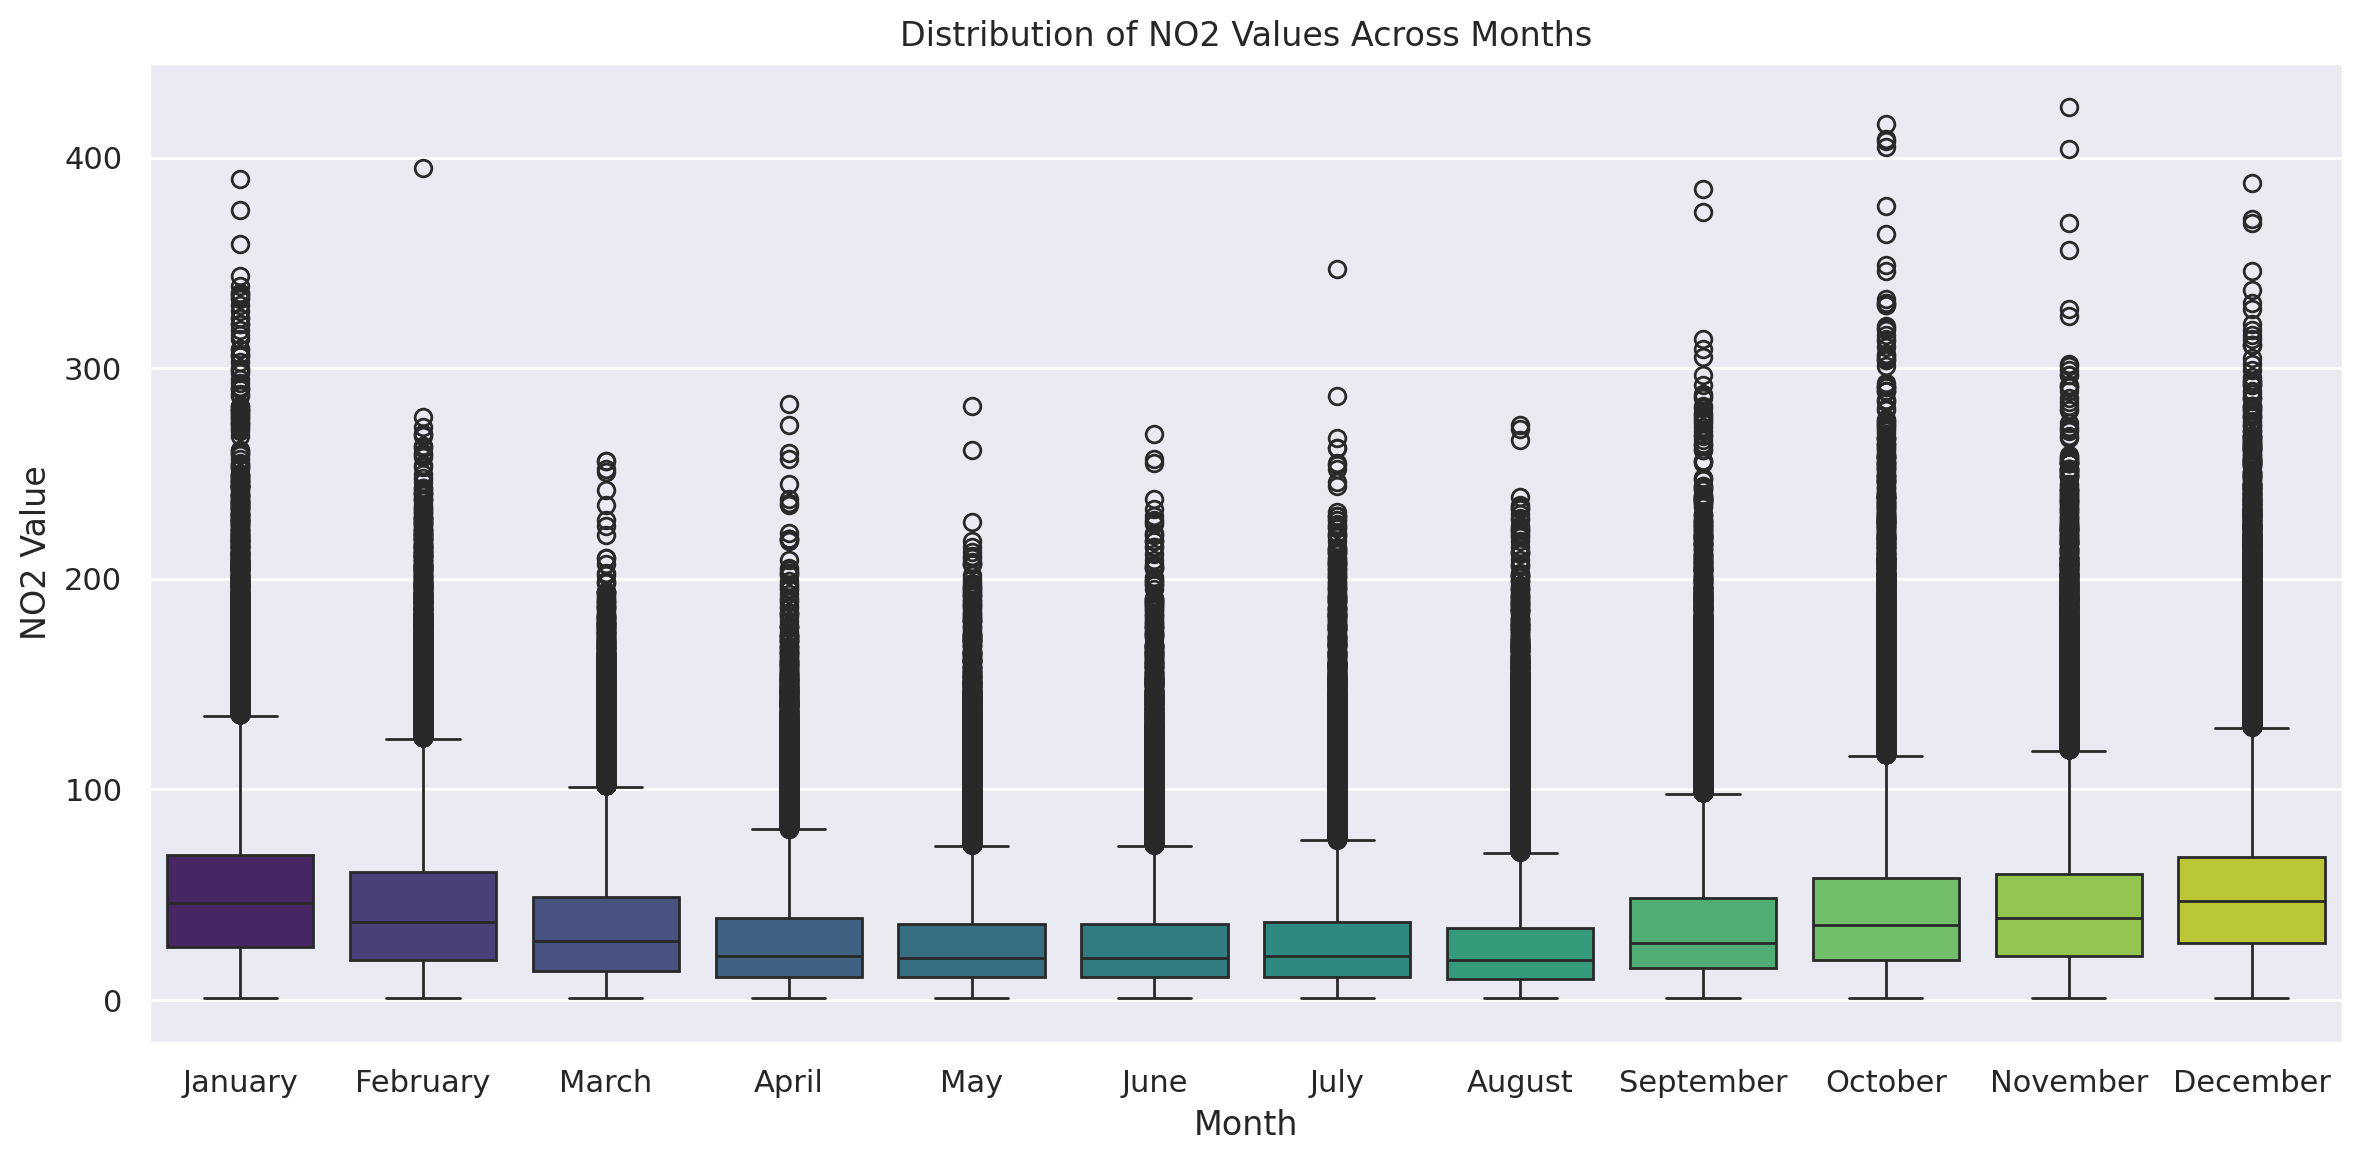

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'Month' is the column representing the month
# You can update the column names if they differ in your DataFrame

# Select relevant columns for plotting
columns_to_plot = ['NO2_Value', 'Month']

# Create a DataFrame with selected columns
selected_data = alldata_melted[columns_to_plot]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a box plot for NO2 values across months
sns.boxplot(x='Month', y='NO2_Value', data=selected_data, palette='viridis')

# Add labels and title
plt.title('Distribution of NO2 Values Across Months')
plt.xlabel('Month')
plt.ylabel('NO2 Value')

# Set x-axis tick labels using Matplotlib
plt.xticks(ticks=range(12), labels=['January', 'February', 'March', 'April', 'May', 'June',
                                    'July', 'August', 'September', 'October', 'November', 'December'])

# Show the plot
plt.tight_layout()  # Ensures proper layout
plt.show()



<ipython-input-61-ac7df4058881>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='NO2_Value', data=average_per_year, palette='viridis')


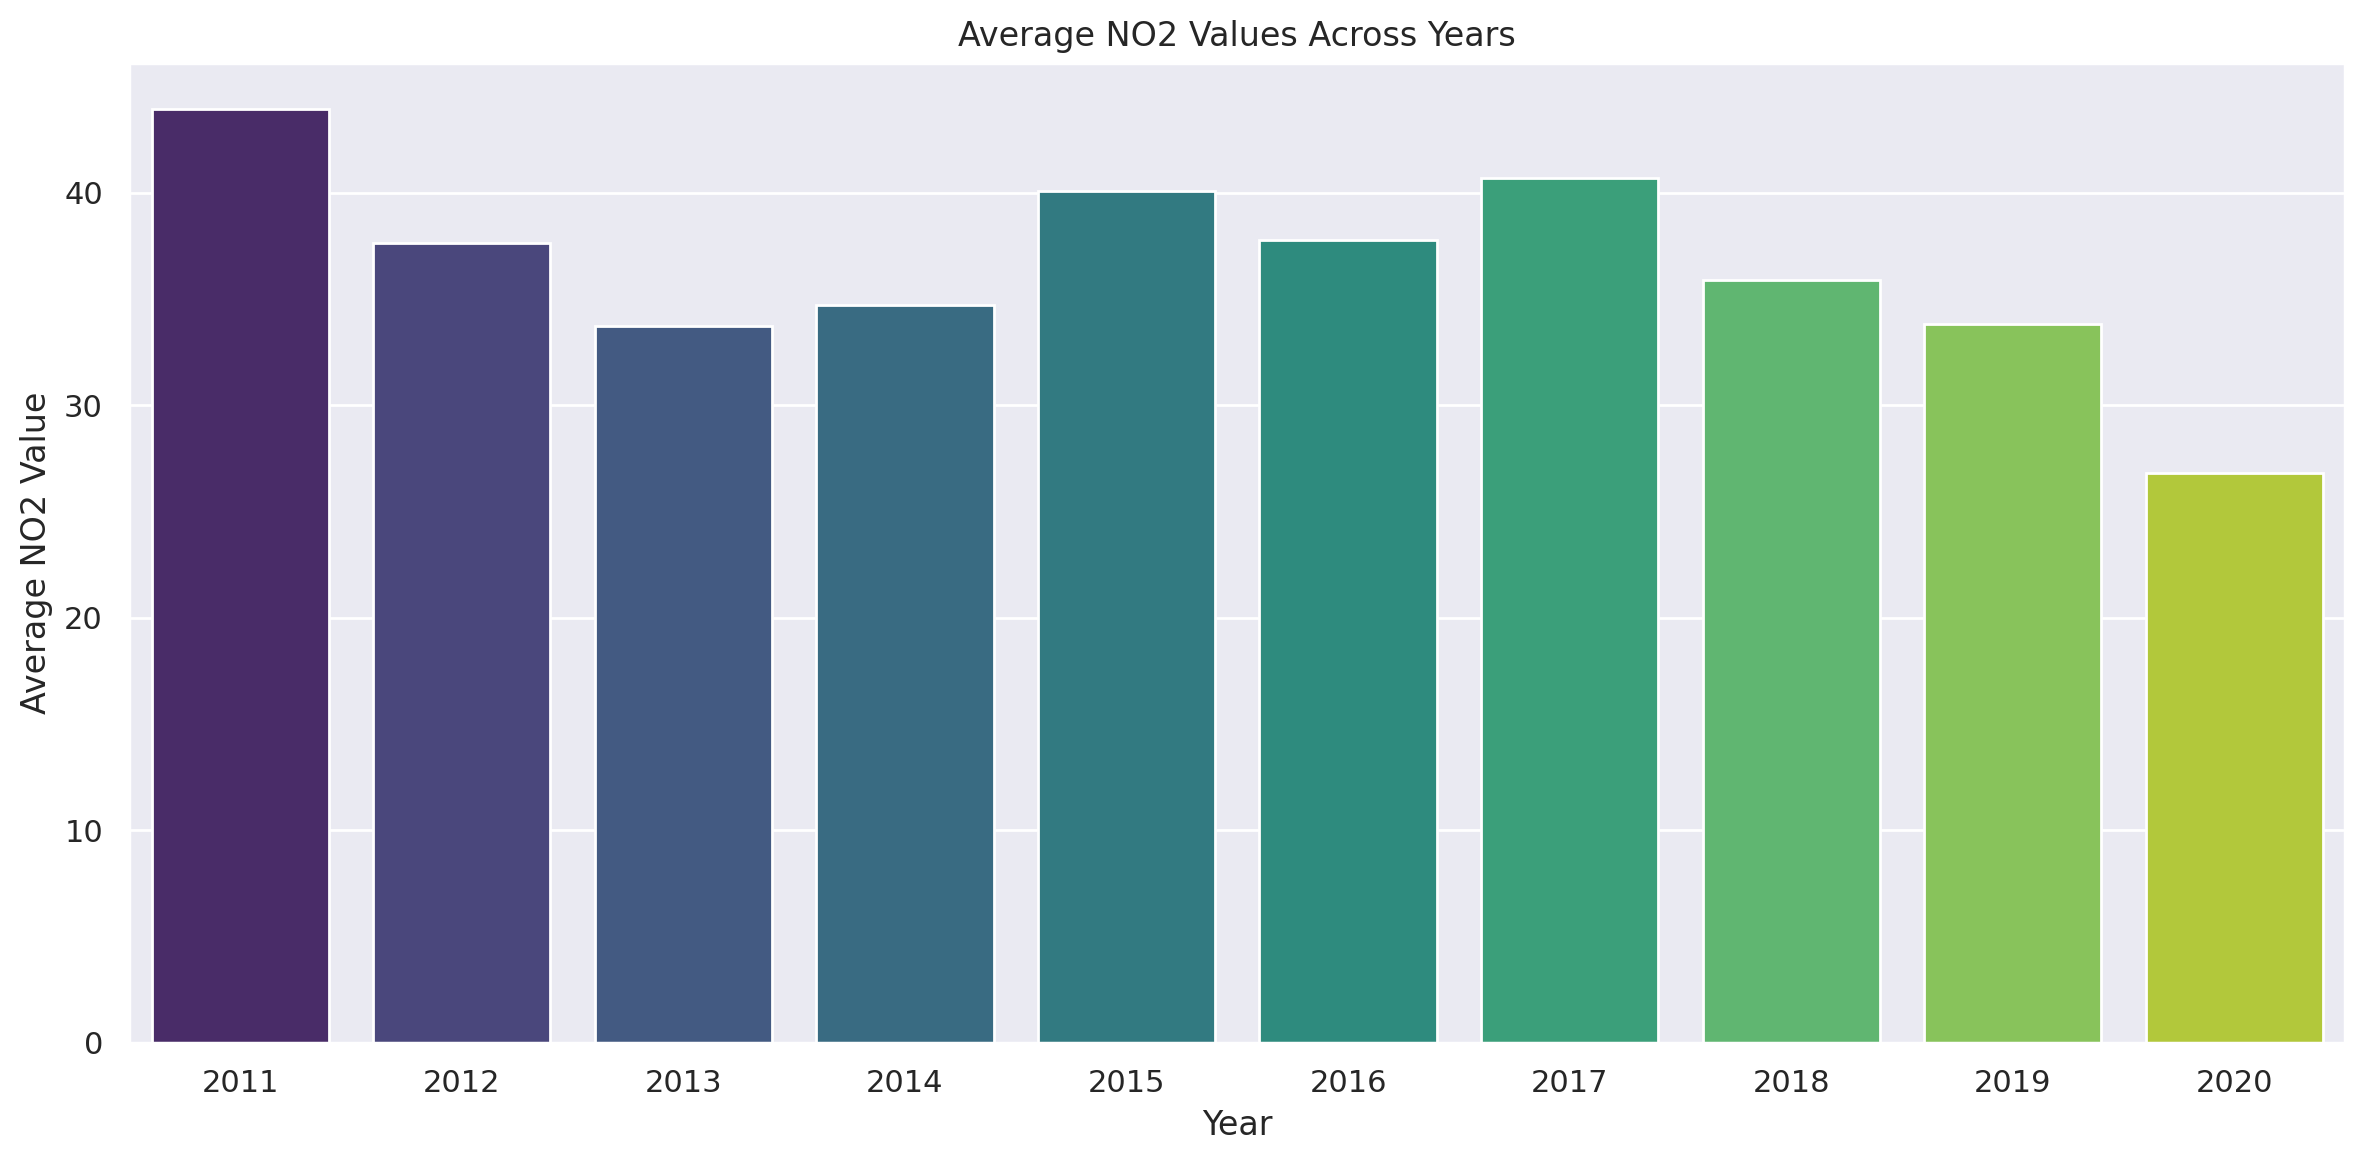

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'Year' is the column representing the year
# You can update the column names if they differ in your DataFrame

# Select relevant columns for plotting
columns_to_plot = ['NO2_Value', 'Year']

# Create a DataFrame with selected columns
selected_data = alldata_melted[columns_to_plot]

# Calculate average NO2 value per year
average_per_year = selected_data.groupby('Year')['NO2_Value'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for average NO2 values across years
sns.barplot(x='Year', y='NO2_Value', data=average_per_year, palette='viridis')

# Add labels and title
plt.title('Average NO2 Values Across Years')
plt.xlabel('Year')
plt.ylabel('Average NO2 Value')

# Show the plot
plt.tight_layout()  # Ensures proper layout
plt.show()



<ipython-input-62-aa055c7a5eae>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='NO2_Value', data=data_2020, palette='viridis')


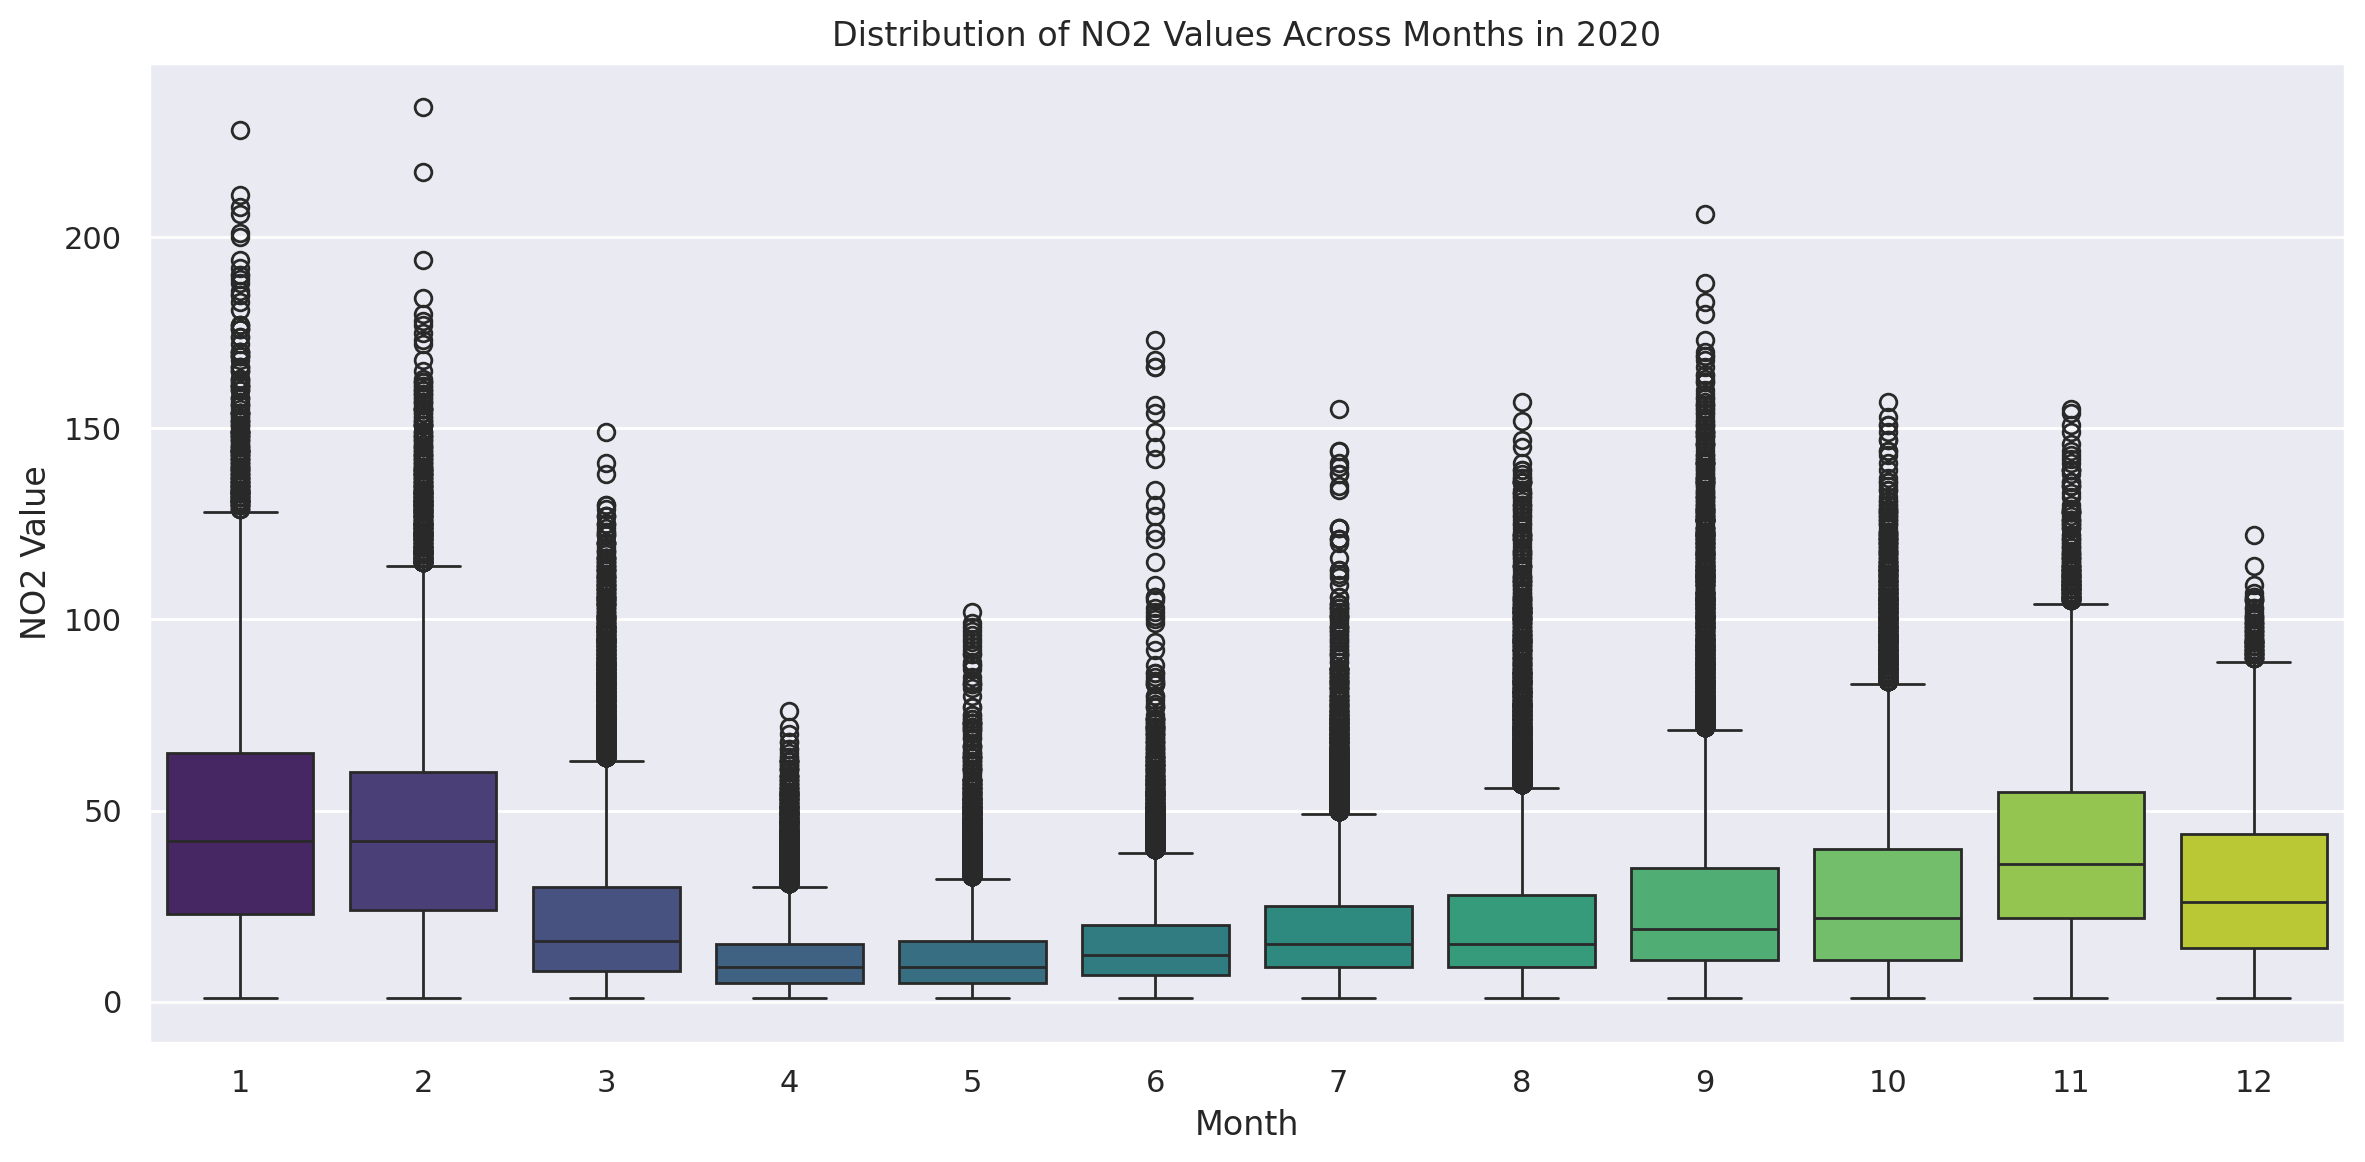

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'Month' is the column representing the month
# 'Year' is the column representing the year
# You can update the column names if they differ in your DataFrame

# Select relevant columns for plotting
columns_to_plot = ['NO2_Value', 'Month', 'Year']

# Create a DataFrame with selected columns
selected_data = alldata_melted[columns_to_plot]

# Filter data for the year 2020
data_2020 = selected_data[selected_data['Year'] == 2020]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a box plot for NO2 values across months in 2020
sns.boxplot(x='Month', y='NO2_Value', data=data_2020, palette='viridis')

# Add labels and title
plt.title('Distribution of NO2 Values Across Months in 2020')
plt.xlabel('Month')
plt.ylabel('NO2 Value')

# Show the plot
plt.tight_layout()  # Ensures proper layout
plt.show()


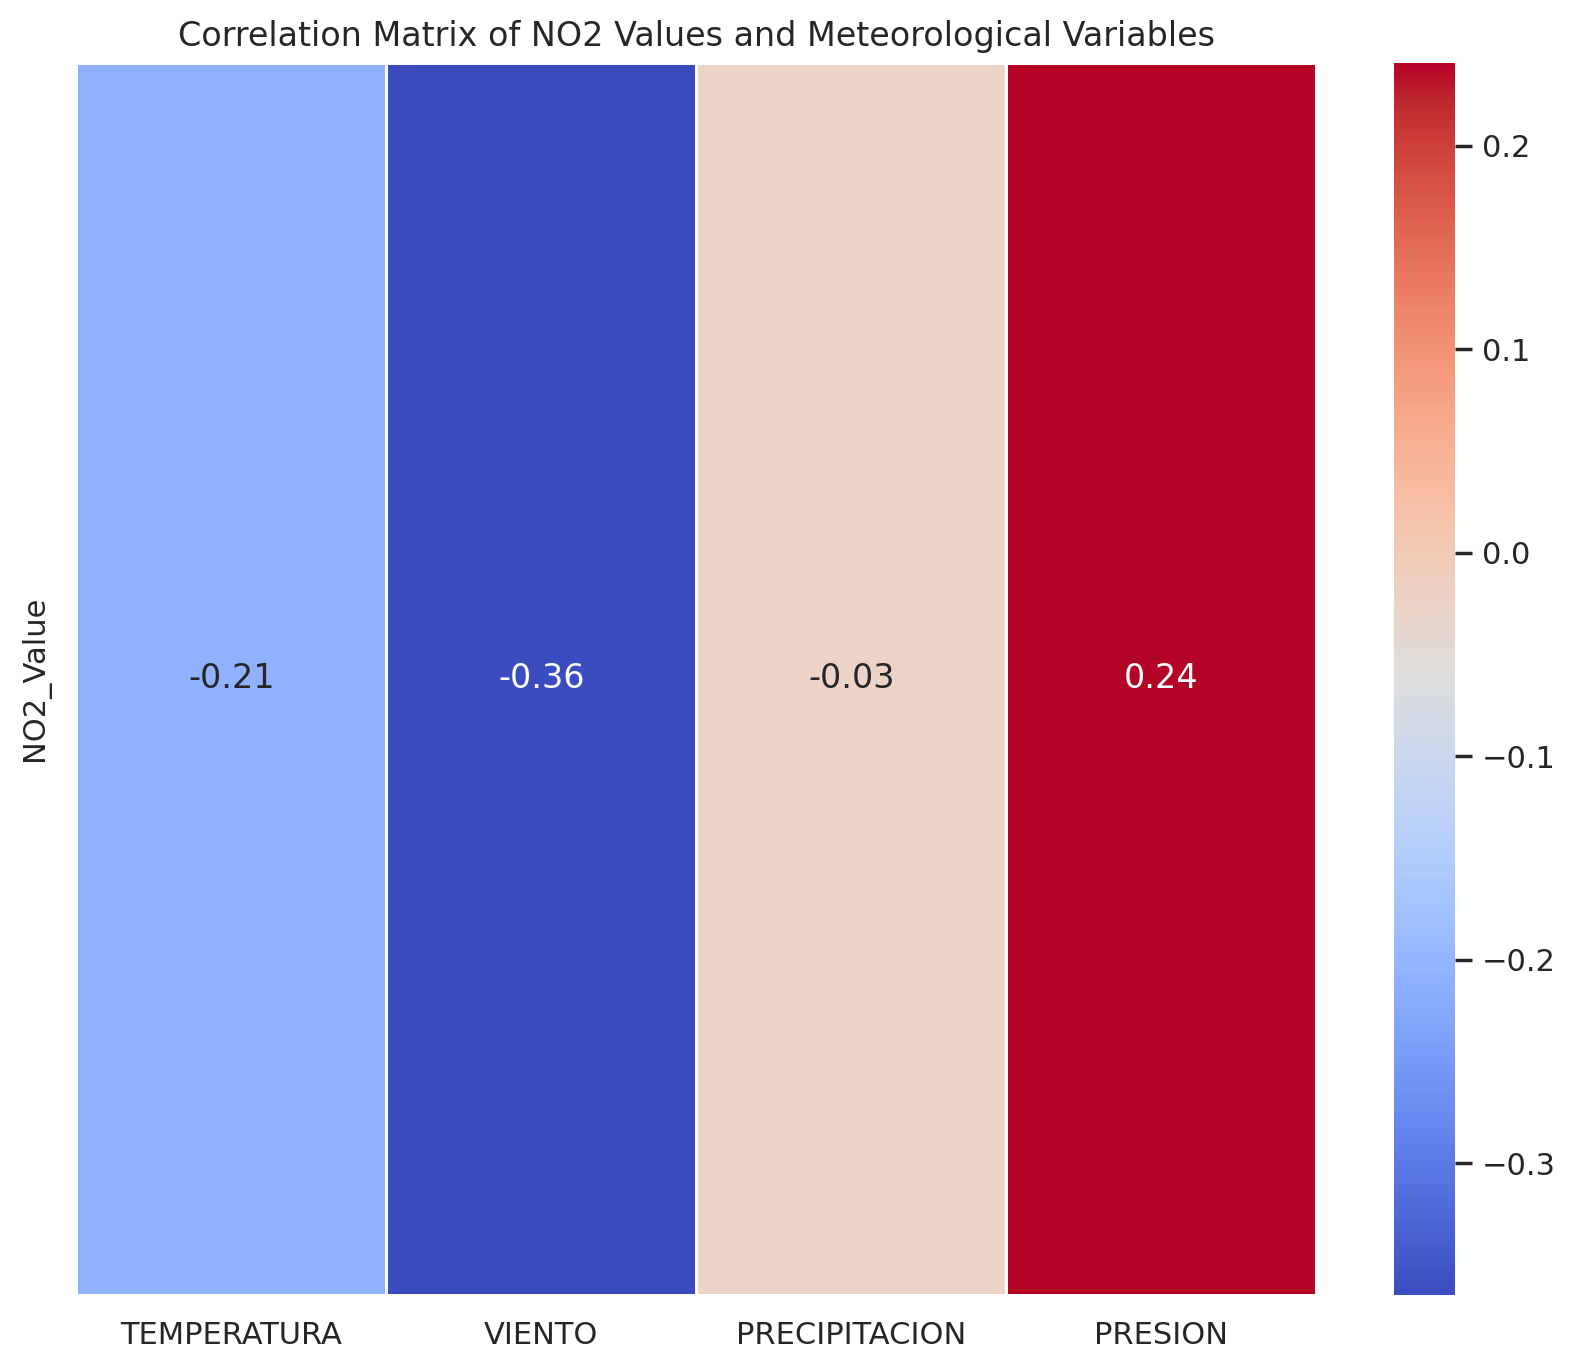

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'NO2_Value' is the column containing NO2 values in your DataFrame
# 'TEMPERATURA', 'VIENTO', 'PRECIPITACION', 'PRESION' are meteorological variables
# You can update the column names if they differ in your DataFrame

# Select relevant columns for plotting
columns_to_plot = ['NO2_Value', 'TEMPERATURA', 'VIENTO', 'PRECIPITACION', 'PRESION']

# Create a DataFrame with selected columns
selected_data = alldata_melted[columns_to_plot]


# Calculate correlation matrix only for selected columns
correlation_matrix = selected_data.corr()

# Filter out correlations of meteorological variables with themselves
correlation_matrix = correlation_matrix.loc[['NO2_Value'], ['TEMPERATURA', 'VIENTO', 'PRECIPITACION', 'PRESION']]

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Title for the heatmap
plt.title('Correlation Matrix of NO2 Values and Meteorological Variables')

# Show the heatmap
plt.show()



In [ ]:
for col in alldata_melted.columns:
  print(col)

Day
Month
Year
Hour
DayOfWeek_Monday
DayOfWeek_Tuesday
DayOfWeek_Wednesday
DayOfWeek_Thursday
DayOfWeek_Friday
DayOfWeek_Saturday
DayOfWeek_Sunday
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
PoliciesandCovid
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


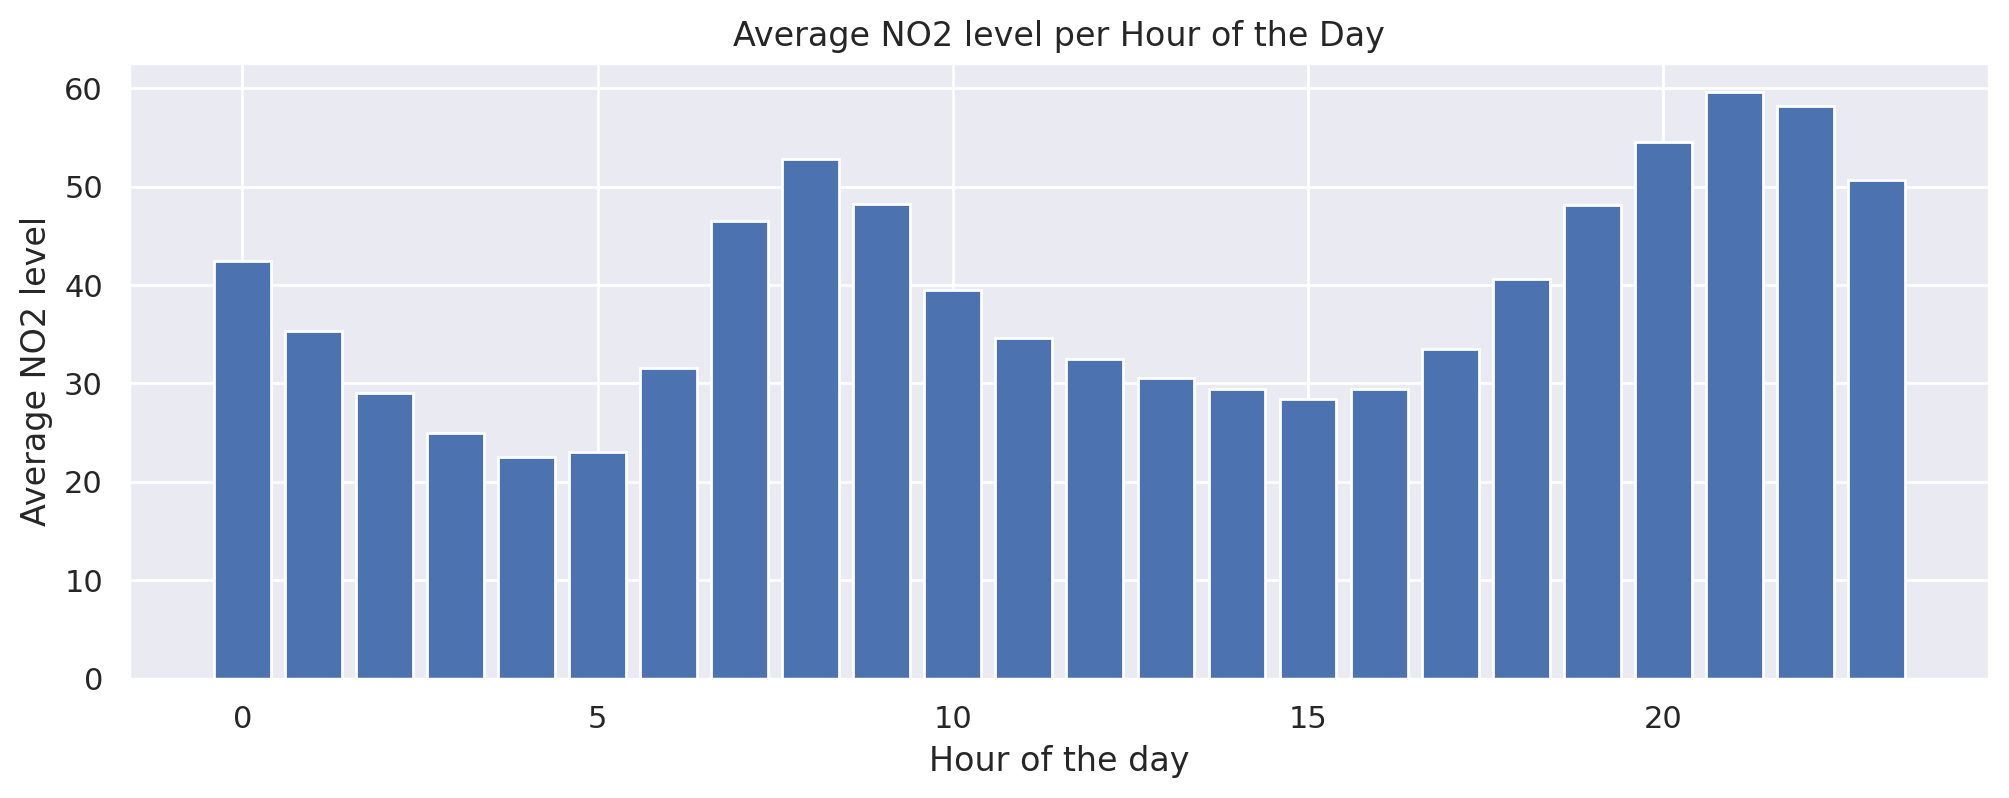

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))
no_2['Hour'] = no_2.index.hour
average_by_hour = no_2.groupby('Hour').mean()
plt.bar(average_by_hour.index, average_by_hour.iloc[:, 0])
plt.xlabel('Hour of the day')
plt.ylabel('Average NO2 level')
plt.title('Average NO2 level per Hour of the Day')
plt.show()


In [ ]:
desired_data = pd.DataFrame(no_2.loc['2010-01-01':'2010-01-11', 'Arturo Soria'])

In [ ]:
desired_data = desired_data.rename(columns={'Arturo Soria': 'Arturo_Soria'})

In [ ]:
desired_data

Arturo_Soria
FECHA                            
2010-01-01 00:00:00         19.99
2010-01-01 01:00:00         29.80
2010-01-01 02:00:00         29.15
2010-01-01 03:00:00         19.13
2010-01-01 04:00:00         14.61
...                           ...
2010-01-11 19:00:00        108.10
2010-01-11 20:00:00        106.70
2010-01-11 21:00:00         84.74
2010-01-11 22:00:00         92.96
2010-01-11 23:00:00         84.10

[264 rows x 1 columns]


# No2 Prediction

## With melted data

In [ ]:
for col in df_melted_noweekdays.columns:
  print(col)

Day
Month
Year
Hour
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
Trend
Policies
COVID
NO2_Value
Station_28079008
Station_28079011
Station_28079016
Station_28079017
Station_28079018
Station_28079024
Station_28079027
Station_28079035
Station_28079036
Station_28079038
Station_28079039
Station_28079040
Station_28079048
Station_28079050
Station_28079054
Station_28079055
Station_28079057
Station_28079058
Station_28079059
Station_28079060


In [ ]:
df_melted_noweekdays

Day  Month  Year  Hour  TEMPERATURA  VIENTO  \
Timestamp                                                          
2011-01-01 00:00:00    1      1  2011     0         7.20    7.00   
2011-01-01 01:00:00    1      1  2011     1         7.50    9.00   
2011-01-01 02:00:00    1      1  2011     2         7.40    9.00   
2011-01-01 03:00:00    1      1  2011     3         7.20    6.00   
2011-01-01 04:00:00    1      1  2011     4         6.80    6.00   
...                  ...    ...   ...   ...          ...     ...   
2017-12-31 19:00:00   31     12  2017    19         8.10   10.00   
2017-12-31 20:00:00   31     12  2017    20         8.40   15.00   
2017-12-31 21:00:00   31     12  2017    21         7.40   13.00   
2017-12-31 22:00:00   31     12  2017    22         7.30    4.00   
2017-12-31 23:00:00   31     12  2017    23         7.20   15.00   

                     PRECIPITACION  PRESION  WorkingDay  PoliciesandCovid  \
Timestamp                                                                   
2011-01-01 00:00:00           0.00  9410.00           0              1.00   
2011-01-01 01:00:00           0.00  9411.00           0              1.00   
2011-01-01 02:00:00           0.00  9412.00           0              1.00   
2011-01-01 03:00:00           0.00  9413.00           0              1.00   
2011-01-01 04:00:00           0.00  9414.00           0              1.00   
...                            ...      ...         ...               ...   
2017-12-31 19:00:00           0.00  9453.00           0              0.43   
2017-12-31 20:00:00           0.00  9453.00           0              0.43   
2017-12-31 21:00:00           0.00  9453.00           0              0.43   
2017-12-31 22:00:00           0.00  9453.00           0              0.43   
2017-12-31 23:00:00           0.00  9453.00           0              0.43   

                     ...  Station_28079039  Station_28079040  \
Timestamp            ...                                       
2011-01-01 00:00:00  ...                 0                 0   
2011-01-01 01:00:00  ...                 0                 0   
2011-01-01 02:00:00  ...                 0                 0   
2011-01-01 03:00:00  ...                 0                 0   
2011-01-01 04:00:00  ...                 0                 0   
...                  ...               ...               ...   
2017-12-31 19:00:00  ...                 0                 0   
2017-12-31 20:00:00  ...                 0                 0   
2017-12-31 21:00:00  ...                 0                 0   
2017-12-31 22:00:00  ...                 0                 0   
2017-12-31 23:00:00  ...                 0                 0   

                     Station_28079048  Station_28079050  Station_28079054  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0                 0   
2011-01-01 02:00:00                 0                 0                 0   
2011-01-01 03:00:00                 0                 0                 0   
2011-01-01 04:00:00                 0                 0                 0   
...                               ...               ...               ...   
2017-12-31 19:00:00                 0                 0                 0   
2017-12-31 20:00:00                 0                 0                 0   
2017-12-31 21:00:00                 0                 0                 0   
2017-12-31 22:00:00                 0                 0                 0   
2017-12-31 23:00:00                 0                 0                 0   

                     Station_28079055  Station_28079057  Station_28079058  \
Timestamp                                                                   
2011-01-01 00:00:00                 0                 0                 0   
2011-01-01 01:00:00                 0                 0             

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split
def create_sequences_for_station_sliding_long(data, window_size, target_size, target_column=12, step_size=17):
    num_samples = len(data) - window_size - target_size + 1

    sequences = []
    targets = []

    for i in range(0, num_samples, step_size):
        start_index = i
        end_index = start_index + window_size
        target_start_index = end_index
        target_end_index = target_start_index + target_size
        # Extract the historical sequence
        sequence = data[start_index:end_index]
        target = data[target_start_index:target_end_index, target_column]
        sequences.append(sequence)
        targets.append(target)

    return np.array(sequences), np.array(targets)

window_size = 72
target_size = 48   # Corresponding to the next 48 hours to be predicted
training_data = df_melted_noweekdays.values
testing_data = df_melted_test_noweekdays.values

# Store individual scalers for each station during training
scalers = []
# Scale the data using Min-Max scaling for each station separately
training_data_scaled = np.zeros_like(training_data)
for i in range(training_data.shape[1]):
    scaler = MinMaxScaler()
    training_data_scaled[:, i] = scaler.fit_transform(training_data[:, i].reshape(-1, 1)).flatten()
    scalers.append(scaler)

# Apply the same scaling to testing data
testing_data_scaled = np.zeros_like(testing_data)
for i, scaler in enumerate(scalers):
    testing_data_scaled[:, i] = scaler.transform(testing_data[:, i].reshape(-1, 1)).flatten()

training_data_scaled_df=pd.DataFrame(training_data_scaled)
station_dummy_cols = training_data_scaled_df.columns[-20:]
# Create a new column 'Station' based on the values in the last 20 columns
training_data_scaled_df['Station'] = training_data_scaled_df[station_dummy_cols].astype(str).agg('-'.join, axis=1)
grouped_df = training_data_scaled_df.groupby('Station')

# Create a list to store each station's DataFrame
station_dfs_list = []

# Iterate through the groups and append each station's DataFrame to the list
for group_name, group_df in grouped_df:
    group_df = group_df.drop(columns='Station')
    station_dfs_list.append(group_df)

# Now, station_dfs_list is a list where each element is a DataFrame for each station
training_data_scaled_df=training_data_scaled_df.drop(columns='Station')
X_train_list = []
y_train_list = []
for i in station_dfs_list:
    # The target sequence is in the 12th column
    X_station, y_station = create_sequences_for_station_sliding_long(
        i.values, window_size, target_size, target_column=12
    )

    # Reshape the sequences to have the correct dimensions
    X_station = X_station.reshape(-1, window_size, X_station.shape[2])

    X_train_list.append(X_station)
    y_train_list.append(y_station)

# Concatenate the sequences for all stations
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0).reshape(-1, target_size, 1)
print("Shape of X_train before reshaping:", X_train.shape)
print("Shape of y_train before reshaping:", y_train.shape)

Shape of X_train before reshaping: (72060, 72, 33)
Shape of y_train before reshaping: (72060, 48, 1)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create sliding window sequences for each station in the testing data
X_test_list = []
y_test_list = []
testing_data_scaled_df=pd.DataFrame(testing_data_scaled)
station_dummy_cols = testing_data_scaled_df.columns[-20:]
testing_data_scaled_df['Station'] = testing_data_scaled_df[station_dummy_cols].astype(str).agg('-'.join, axis=1)
grouped_df = testing_data_scaled_df.groupby('Station')
test_station_dfs_list = []
for group_name, group_df in grouped_df:
    group_df = group_df.drop(columns='Station')
    test_station_dfs_list.append(group_df)

# Now, station_dfs_list is a list where each element is a DataFrame for each station
testing_data_scaled_df=testing_data_scaled_df.drop(columns='Station')
for i in test_station_dfs_list:
    X_station, y_station = create_sequences_for_station_sliding_long(i.values, window_size, target_size, target_column=12)
    X_station = X_station.reshape(-1, window_size, X_station.shape[2])
    X_test_list.append(X_station)
    y_test_list.append(y_station)

# Concatenate the sequences for all stations
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0).reshape(-1, target_size, 1)
print("Shape of X_test before reshaping:", X_test.shape)
print("Shape of y_test before reshaping:", y_test.shape)

Shape of X_test before reshaping: (30820, 72, 33)
Shape of y_test before reshaping: (30820, 48, 1)


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import RepeatVector, Attention
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.layers import Dropout
#LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(window_size, 33), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(RepeatVector(target_size))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(1, activation='relu')))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[MeanAbsoluteError(name='mean_absolute_error'),RootMeanSquaredError(name='root_mean_squared_error'),MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')])
history= model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))

Epoch 1/10
2252/2252 [==============================] - 54s 18ms/step - loss: 0.0039 - mean_absolute_error: 0.0462 - root_mean_squared_error: 0.0627 - mean_squared_logarithmic_error: 0.0030 - val_loss: 0.0033 - val_mean_absolute_error: 0.0457 - val_root_mean_squared_error: 0.0577 - val_mean_squared_logarithmic_error: 0.0027
Epoch 2/10
2252/2252 [==============================] - 34s 15ms/step - loss: 0.0035 - mean_absolute_error: 0.0436 - root_mean_squared_error: 0.0590 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0028 - val_mean_absolute_error: 0.0404 - val_root_mean_squared_error: 0.0528 - val_mean_squared_logarithmic_error: 0.0022
Epoch 3/10
2252/2252 [==============================] - 34s 15ms/step - loss: 0.0027 - mean_absolute_error: 0.0377 - root_mean_squared_error: 0.0518 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.0023 - val_mean_absolute_error: 0.0367 - val_root_mean_squared_error: 0.0483 - val_mean_squared_logarithmic_error: 0.0019
Epoch 4/10
2252/2252 [

In [ ]:
pip install scikeras

In [ ]:
#RNN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError

# Model definition
model = Sequential()
model.add(SimpleRNN(64, input_shape=(window_size, 33), return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer with rate 0.2
model.add(SimpleRNN(64, return_sequences=False))
model.add(RepeatVector(target_size))  # Repeat the output sequence
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))  # Dropout layer with rate 0.2
model.add(TimeDistributed(Dense(1, activation='relu')))  # TimeDistributed layer

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    MeanAbsoluteError(name='mean_absolute_error'),
    RootMeanSquaredError(name='root_mean_squared_error'),
    MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_test, y_test))


Epoch 1/10
  78/1126 [=>............................] - ETA: 4:49 - loss: 0.0156 - mean_absolute_error: 0.0917 - root_mean_squared_error: 0.1250 - mean_squared_logarithmic_error: 0.0120

KeyboardInterrupt: 

In [ ]:
#Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(window_size, 33)))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.25))
model.add(RepeatVector(target_size))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.25))
model.add(TimeDistributed(Dense(1, activation='relu')))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    MeanAbsoluteError(name='mean_absolute_error'),
    RootMeanSquaredError(name='root_mean_squared_error'),
    MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))


Epoch 1/10
2252/2252 [==============================] - 76s 28ms/step - loss: 0.0129 - mean_absolute_error: 0.0883 - root_mean_squared_error: 0.1136 - mean_squared_logarithmic_error: 0.0108 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 2/10
2252/2252 [==============================] - 57s 25ms/step - loss: 0.0129 - mean_absolute_error: 0.0883 - root_mean_squared_error: 0.1136 - mean_squared_logarithmic_error: 0.0108 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 3/10
2252/2252 [==============================] - 59s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0883 - root_mean_squared_error: 0.1136 - mean_squared_logarithmic_error: 0.0108 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 4/10
2252/2252 [

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.layers import GRU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RepeatVector, TimeDistributed
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError
model = Sequential()
model.add(GRU(64, input_shape=(window_size, 33), return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64, return_sequences=False))
model.add(Dropout(0.25))
model.add(RepeatVector(target_size))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.25))
model.add(TimeDistributed(Dense(1, activation='relu')))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    MeanAbsoluteError(name='mean_absolute_error'),
    RootMeanSquaredError(name='root_mean_squared_error'),
    MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
])
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))


Epoch 1/10
2252/2252 [==============================] - 41s 15ms/step - loss: 0.0041 - mean_absolute_error: 0.0473 - root_mean_squared_error: 0.0642 - mean_squared_logarithmic_error: 0.0032 - val_loss: 0.0029 - val_mean_absolute_error: 0.0384 - val_root_mean_squared_error: 0.0536 - val_mean_squared_logarithmic_error: 0.0023
Epoch 2/10
2252/2252 [==============================] - 33s 15ms/step - loss: 0.0036 - mean_absolute_error: 0.0441 - root_mean_squared_error: 0.0600 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0025 - val_mean_absolute_error: 0.0360 - val_root_mean_squared_error: 0.0501 - val_mean_squared_logarithmic_error: 0.0020
Epoch 3/10
2252/2252 [==============================] - 31s 14ms/step - loss: 0.0029 - mean_absolute_error: 0.0393 - root_mean_squared_error: 0.0539 - mean_squared_logarithmic_error: 0.0022 - val_loss: 0.0022 - val_mean_absolute_error: 0.0345 - val_root_mean_squared_error: 0.0472 - val_mean_squared_logarithmic_error: 0.0018
Epoch 4/10
2252/2252 [

In [ ]:
!pip install -q keras-tcn --no-dependencies
from tcn import TCN, tcn_full_summary

In [ ]:
#TCN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError
model = Sequential()
model.add(TCN(64, input_shape=(window_size, 33), return_sequences=True))
model.add(Dropout(0.2))
model.add(TCN(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(RepeatVector(target_size))
model.add(TCN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=[
    MeanAbsoluteError(name='mean_absolute_error'),
    RootMeanSquaredError(name='root_mean_squared_error'),
    MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test))




Epoch 1/10
2252/2252 [==============================] - 87s 32ms/step - loss: 1.1721 - mean_absolute_error: 0.0927 - root_mean_squared_error: 1.0826 - mean_squared_logarithmic_error: 0.0114 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 2/10
2252/2252 [==============================] - 67s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0883 - root_mean_squared_error: 0.1136 - mean_squared_logarithmic_error: 0.0108 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 3/10
2252/2252 [==============================] - 68s 30ms/step - loss: 0.0129 - mean_absolute_error: 0.0883 - root_mean_squared_error: 0.1136 - mean_squared_logarithmic_error: 0.0108 - val_loss: 0.0095 - val_mean_absolute_error: 0.0737 - val_root_mean_squared_error: 0.0975 - val_mean_squared_logarithmic_error: 0.0081
Epoch 4/10
2252/2252 [

KeyboardInterrupt: 

In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)
print("Shape of predictions:", predictions.shape)

# Initialize arrays for unscaled predictions and actual values
predictions_unscaled = np.zeros_like(predictions)
y_test_unscaled = np.zeros_like(y_test)

# Use the scaler only for the NO2 column
no2_scaler = scalers[12]  # Assuming the NO2 scaler is at the 10th index

# Invert the scaling of predictions for the NO2 values
predictions_unscaled[:, :, 0] = no2_scaler.inverse_transform(predictions[:, :, 0].reshape(-1, 1)).reshape(-1, target_size)

# Invert the scaling of actual values for the NO2 values
y_test_unscaled[:, :, 0] = no2_scaler.inverse_transform(y_test[:, :, 0].reshape(-1, 1)).reshape(-1, target_size)

# Flatten the arrays for easier comparison
predictions_flat = predictions_unscaled.flatten()
y_test_flat = y_test_unscaled.flatten()

# Calculate additional metrics
mae = mean_absolute_error(y_test_flat, predictions_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, predictions_flat))




964/964 [==============================] - 7s 6ms/step
Shape of predictions: (30820, 48, 1)


In [ ]:
mae

15.310095774355945

In [ ]:
rmse

In [ ]:
import random
# Function to create the model with specified hyperparameters
def parameter_search_lstm(num_lstm_layers, lstm_units, learning_rate, dropout_rate, activation_function):
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(window_size, 33), return_sequences=True))
    # Hidden layers
    for _ in range(num_lstm_layers - 1):
        model.add(LSTM(lstm_units, return_sequences=True))
        model.add(Dropout(dropout_rate))

    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(RepeatVector(target_size))
    model.add(TimeDistributed(Dense(1)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[
        MeanAbsoluteError(name='mean_absolute_error'),
        RootMeanSquaredError(name='root_mean_squared_error'),
        MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
    ])

    return model
param_space = {
    'num_lstm_layers': [1, 2, 3],
    'lstm_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.5]
}

num_random_combinations = 10
best_model = None
best_score = float('inf')

for _ in range(num_random_combinations):
    # Randomly sample hyperparameters
    num_lstm_layers = random.choice(param_space['num_lstm_layers'])
    lstm_units = random.choice(param_space['lstm_units'])
    learning_rate = random.choice(param_space['learning_rate'])
    dropout_rate = random.choice(param_space['dropout_rate'])
    activation_function = random.choice(param_space['activation_function'])
    model = parameter_search_lstm(num_lstm_layers, lstm_units, learning_rate, dropout_rate, activation_function)
    history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[0]
    if score < best_score:
        best_score = score
        best_model = model
print("Best Model Hyperparameters:")
print(f"Number of LSTM Layers: {sum('LSTM' in layer['class_name'] for layer in best_model.get_config()['layers'])}")
print(f"LSTM Units: {best_model.get_config()['layers'][1]['config']['units']}")
print(f"Learning Rate: {best_model.optimizer.get_config()['learning_rate']}")
print(f"Dropout Rate: {best_model.get_config()['layers'][3]['config']['rate']}")
print("\nBest Model Performance:")
print(f"Best Loss on Validation Set: {best_score}")
print(best_model.get_config()['layers'][3]['config'])

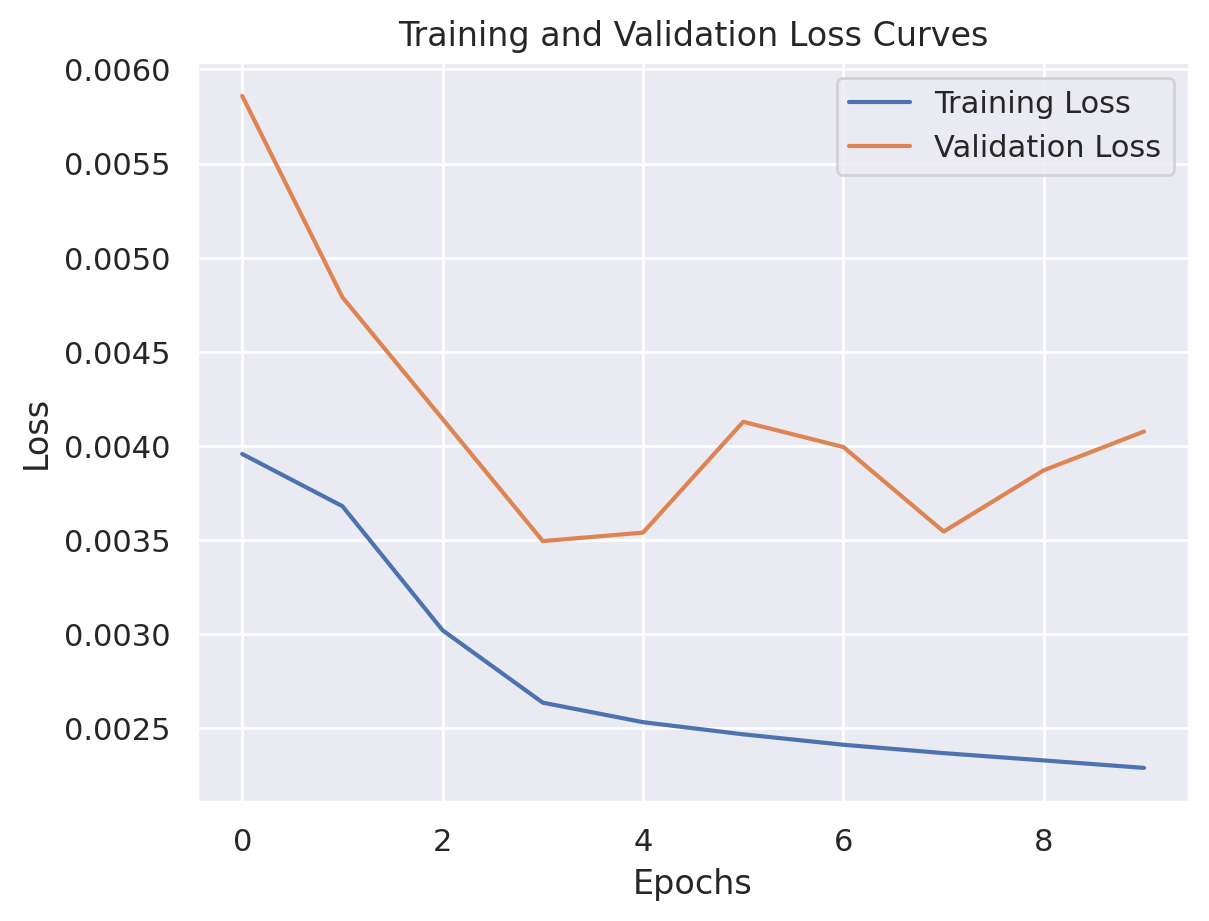

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Customize the plot
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')

# Show the plot
plt.show()

In [ ]:
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError

# Function to create the model with specified hyperparameters
def parameter_search_gru(num_gru_layers, gru_units, learning_rate, dropout_rate):
    model = Sequential()
    model.add(GRU(gru_units, input_shape=(window_size, 33), return_sequences=True))
    # Hidden layers
    for _ in range(num_gru_layers - 1):
        model.add(GRU(gru_units, return_sequences=True))
        model.add(Dropout(dropout_rate))

    model.add(GRU(gru_units, return_sequences=False))
    model.add(RepeatVector(target_size))
    model.add(TimeDistributed(Dense(1)))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[
        MeanAbsoluteError(name='mean_absolute_error'),
        RootMeanSquaredError(name='root_mean_squared_error'),
        MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
    ])

    return model

param_space = {
    'num_gru_layers': [1, 2, 3],
    'gru_units': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.2, 0.5]
}

num_random_combinations = 10
best_model = None
best_score = float('inf')

for _ in range(num_random_combinations):
    # Randomly sample hyperparameters
    num_gru_layers = random.choice(param_space['num_gru_layers'])
    gru_units = random.choice(param_space['gru_units'])
    learning_rate = random.choice(param_space['learning_rate'])
    dropout_rate = random.choice(param_space['dropout_rate'])
    model = parameter_search_gru(num_gru_layers, gru_units, learning_rate, dropout_rate)
    history = model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[0]
    if score < best_score:
        best_score = score
        best_model = model

print("Best Model Hyperparameters:")
print(f"Number of GRU Layers: {sum('GRU' in layer['class_name'] for layer in best_model.get_config()['layers'])}")
print(f"GRU Units: {best_model.get_config()['layers'][1]['config']['units']}")
print(f"Learning Rate: {best_model.optimizer.get_config()['learning_rate']}")
print(f"Dropout Rate: {best_model.get_config()['layers'][3]['config']['rate']}")
print("\nBest Model Performance:")
print(f"Best Loss on Validation Set: {best_score}")
print(best_model.get_config()['layers'][3]['config'])


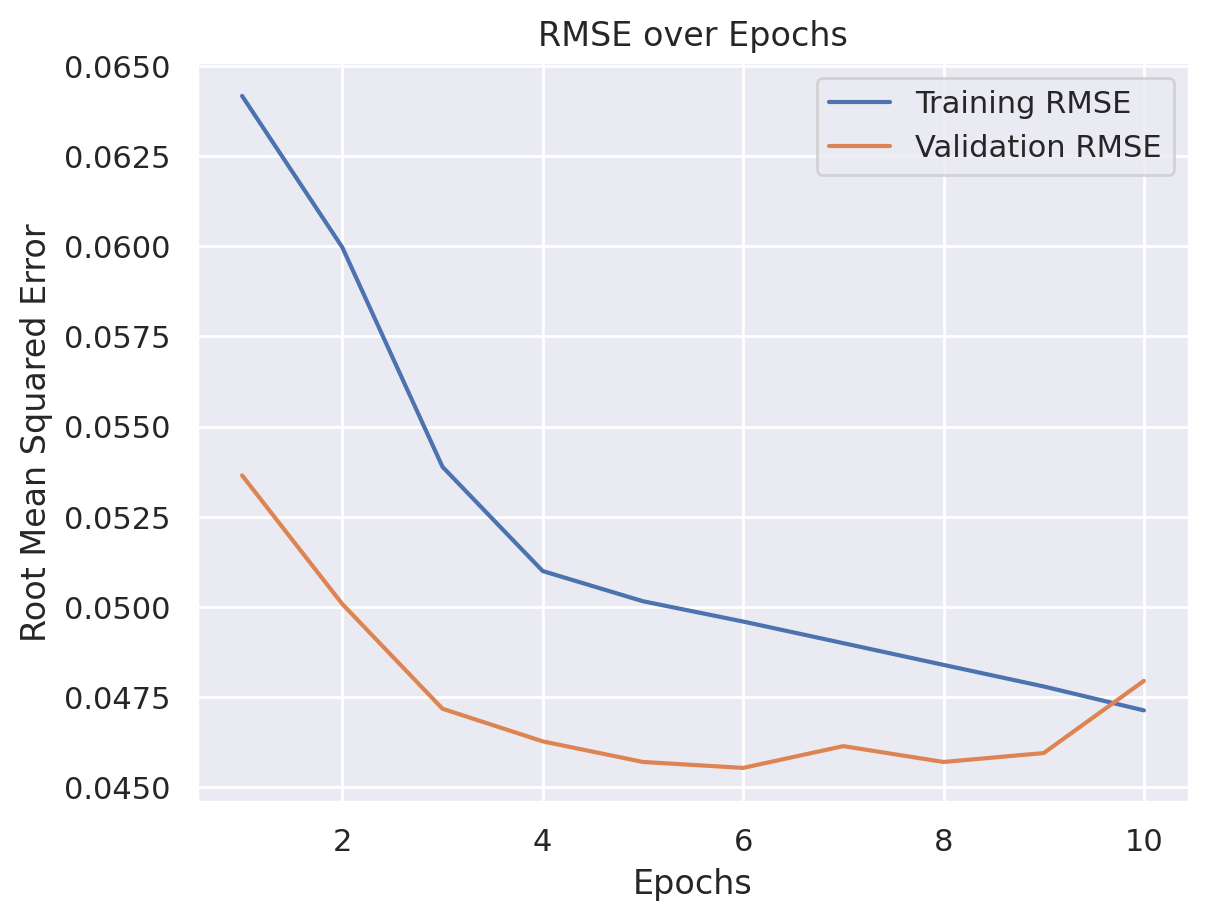

In [ ]:
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
epochs = range(1, len(train_rmse) + 1)
plt.plot(epochs, train_rmse, label='Training RMSE')
plt.plot(epochs, val_rmse, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE over Epochs')
plt.legend()
plt.show()


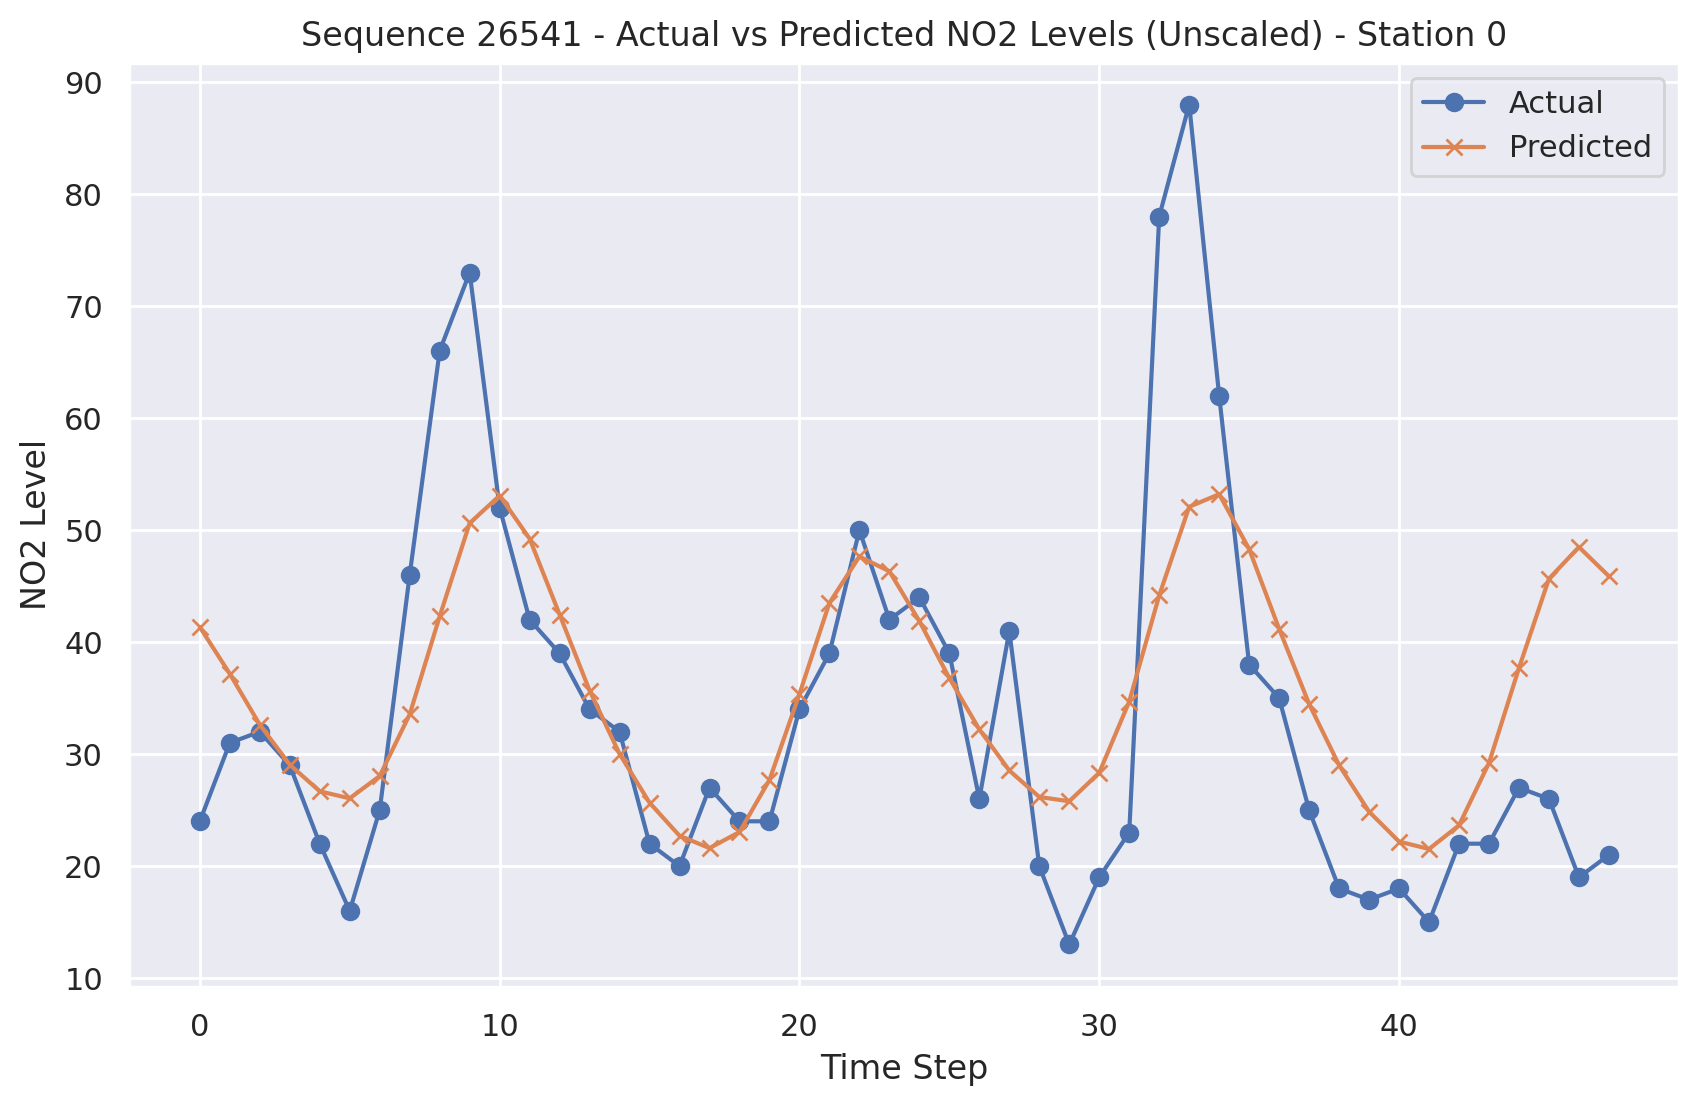

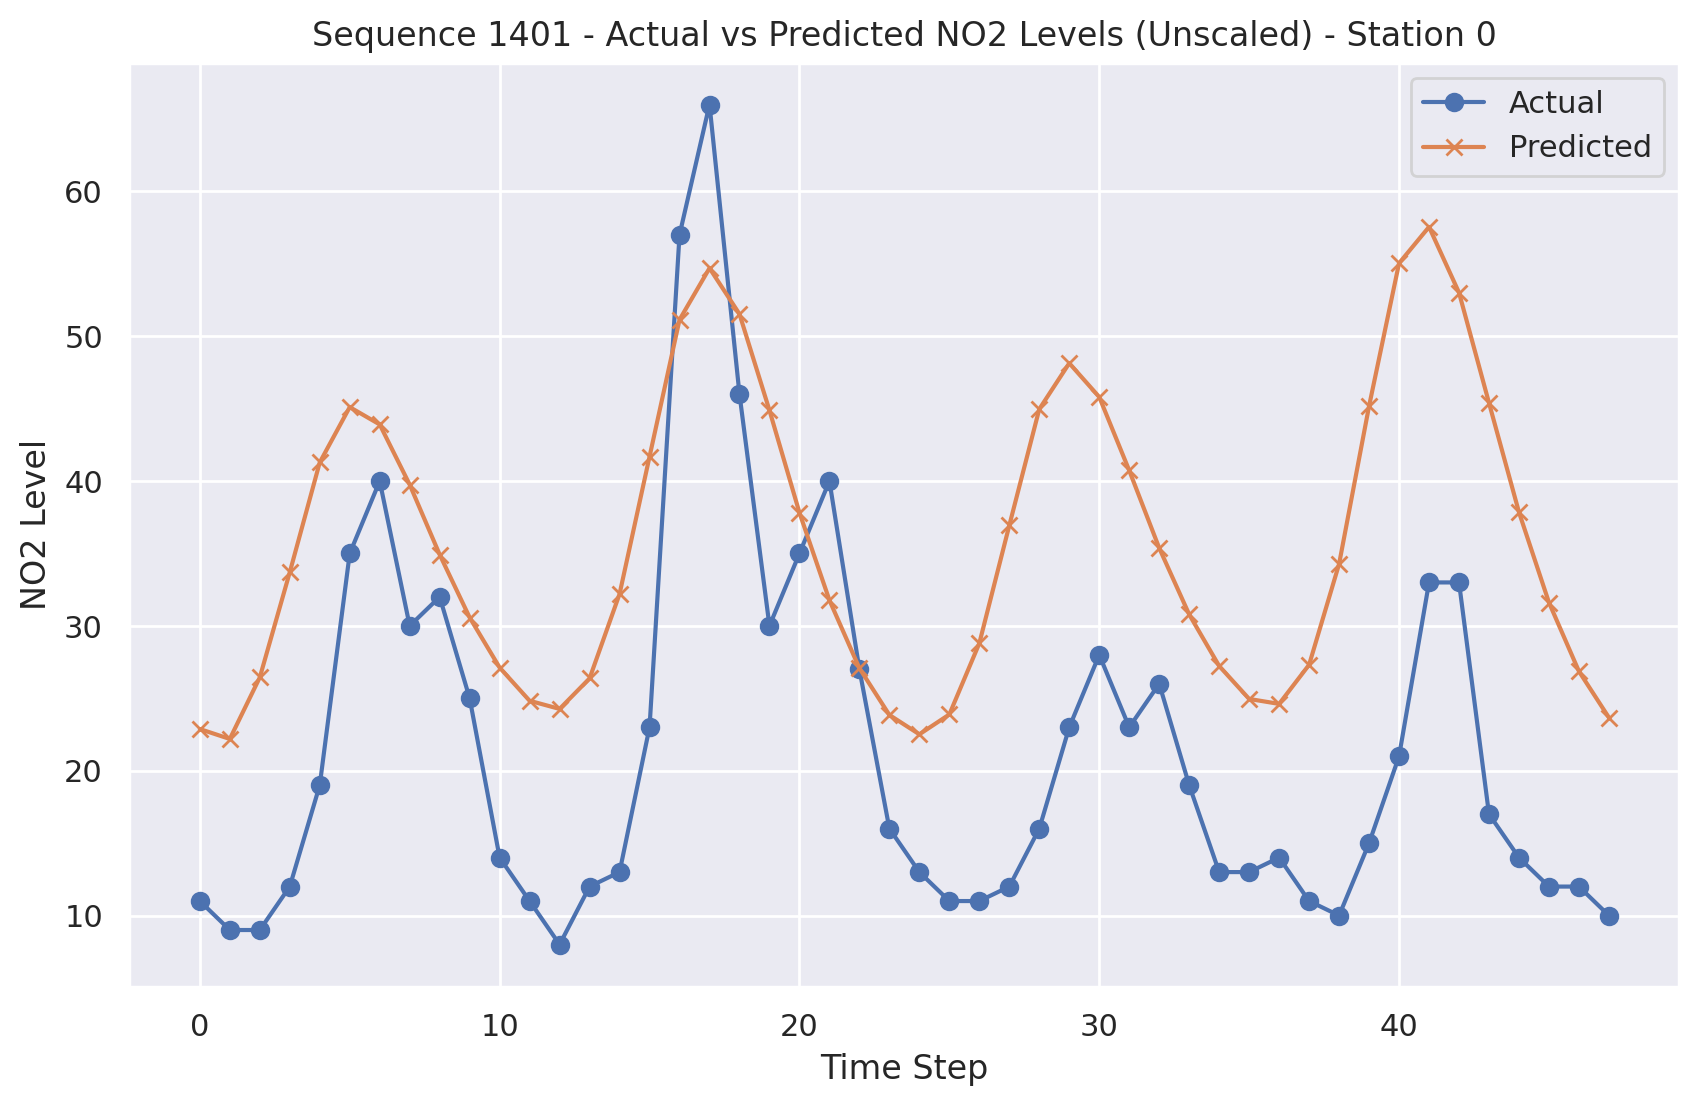

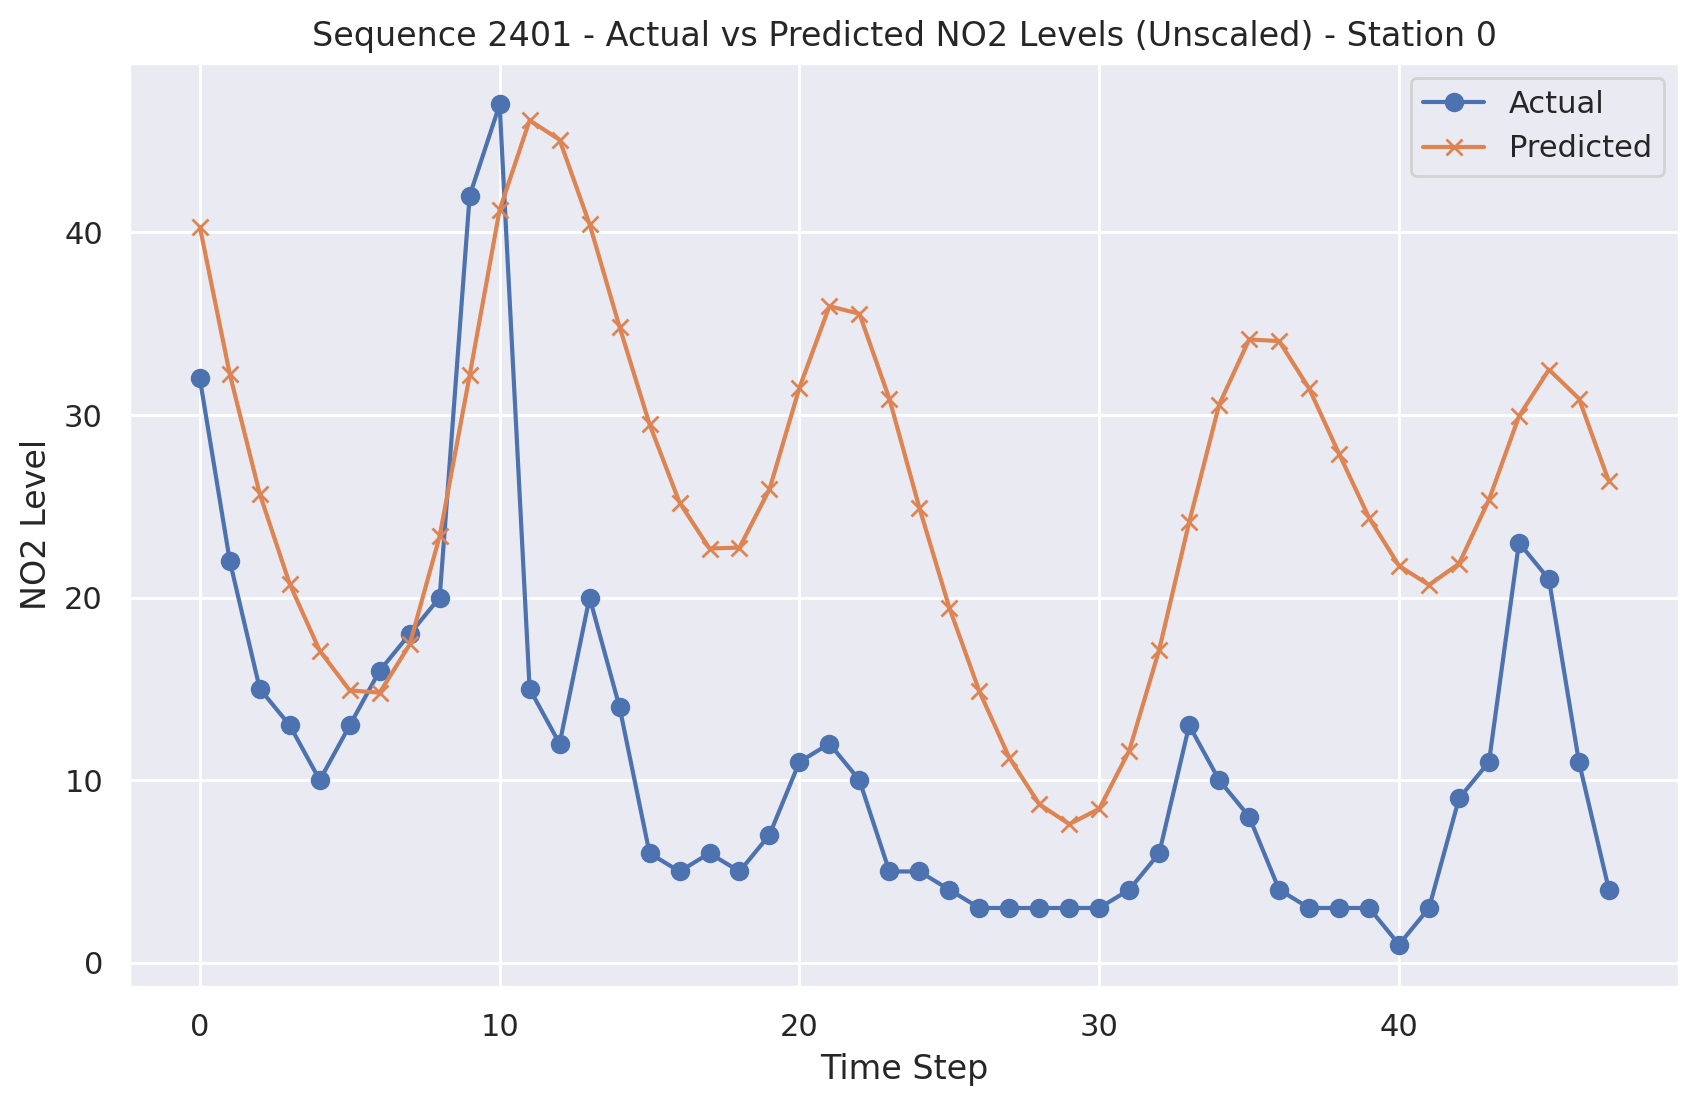

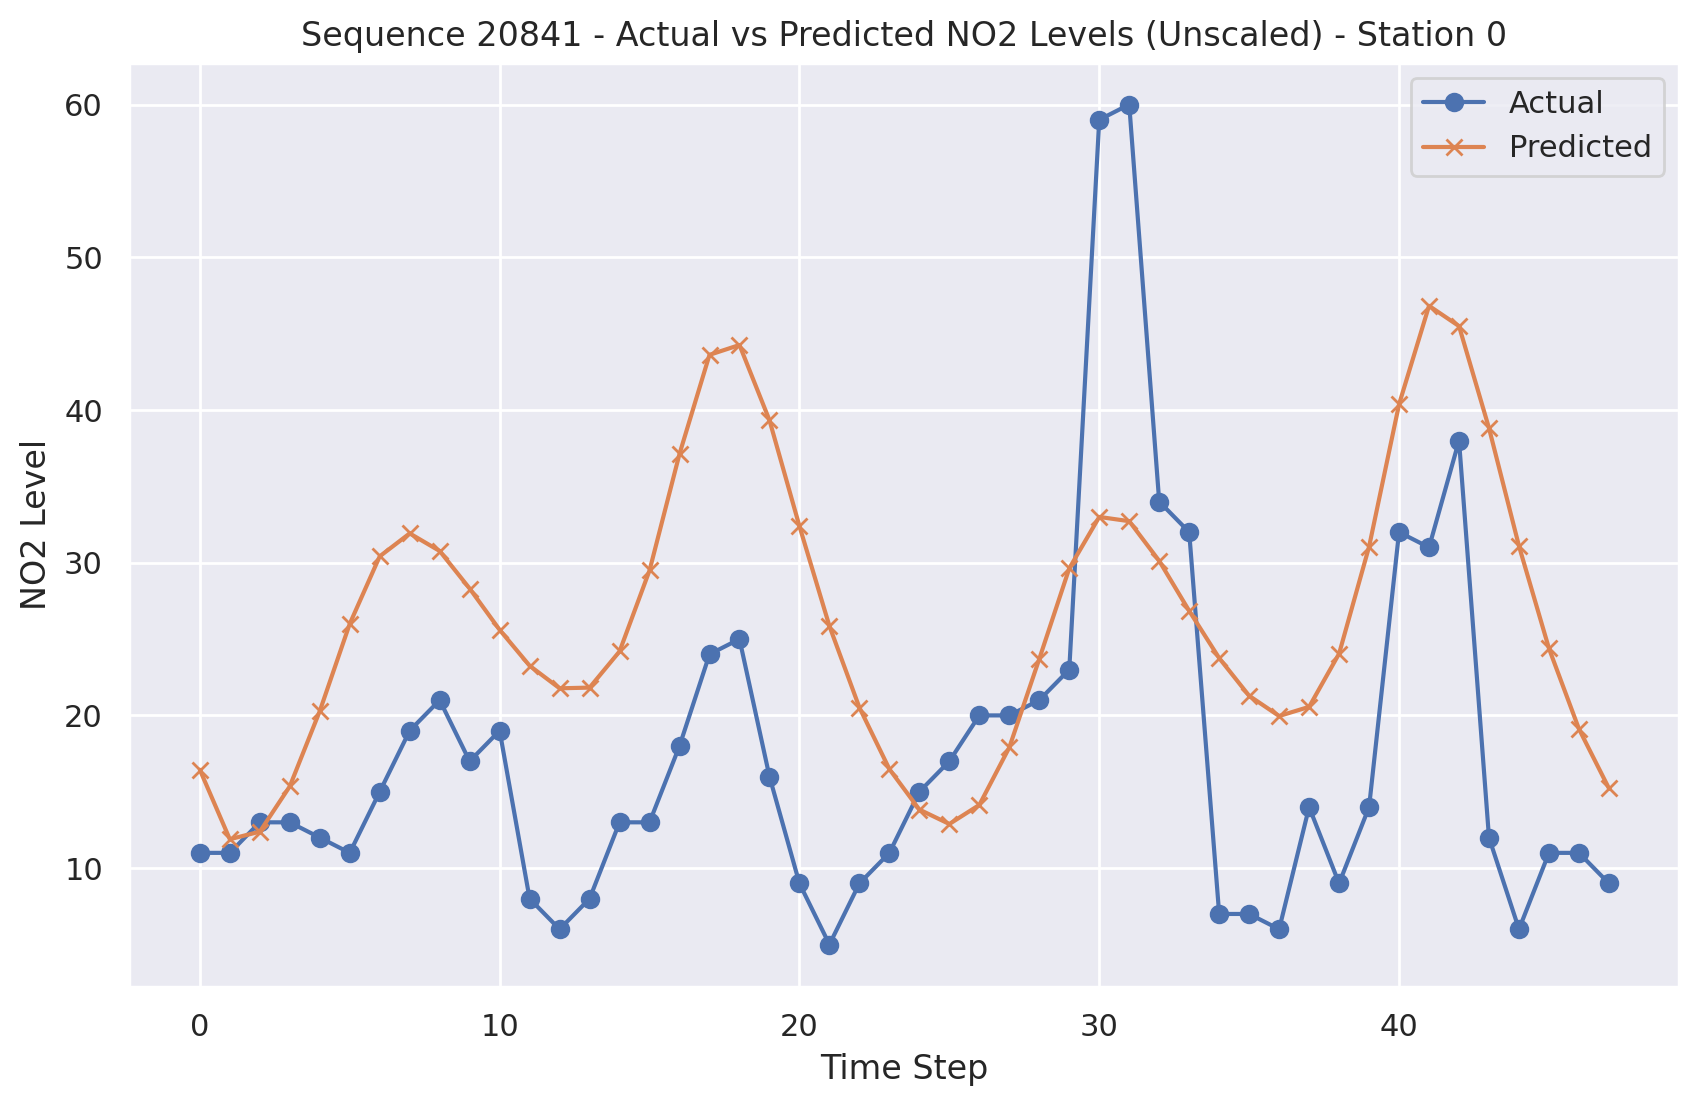

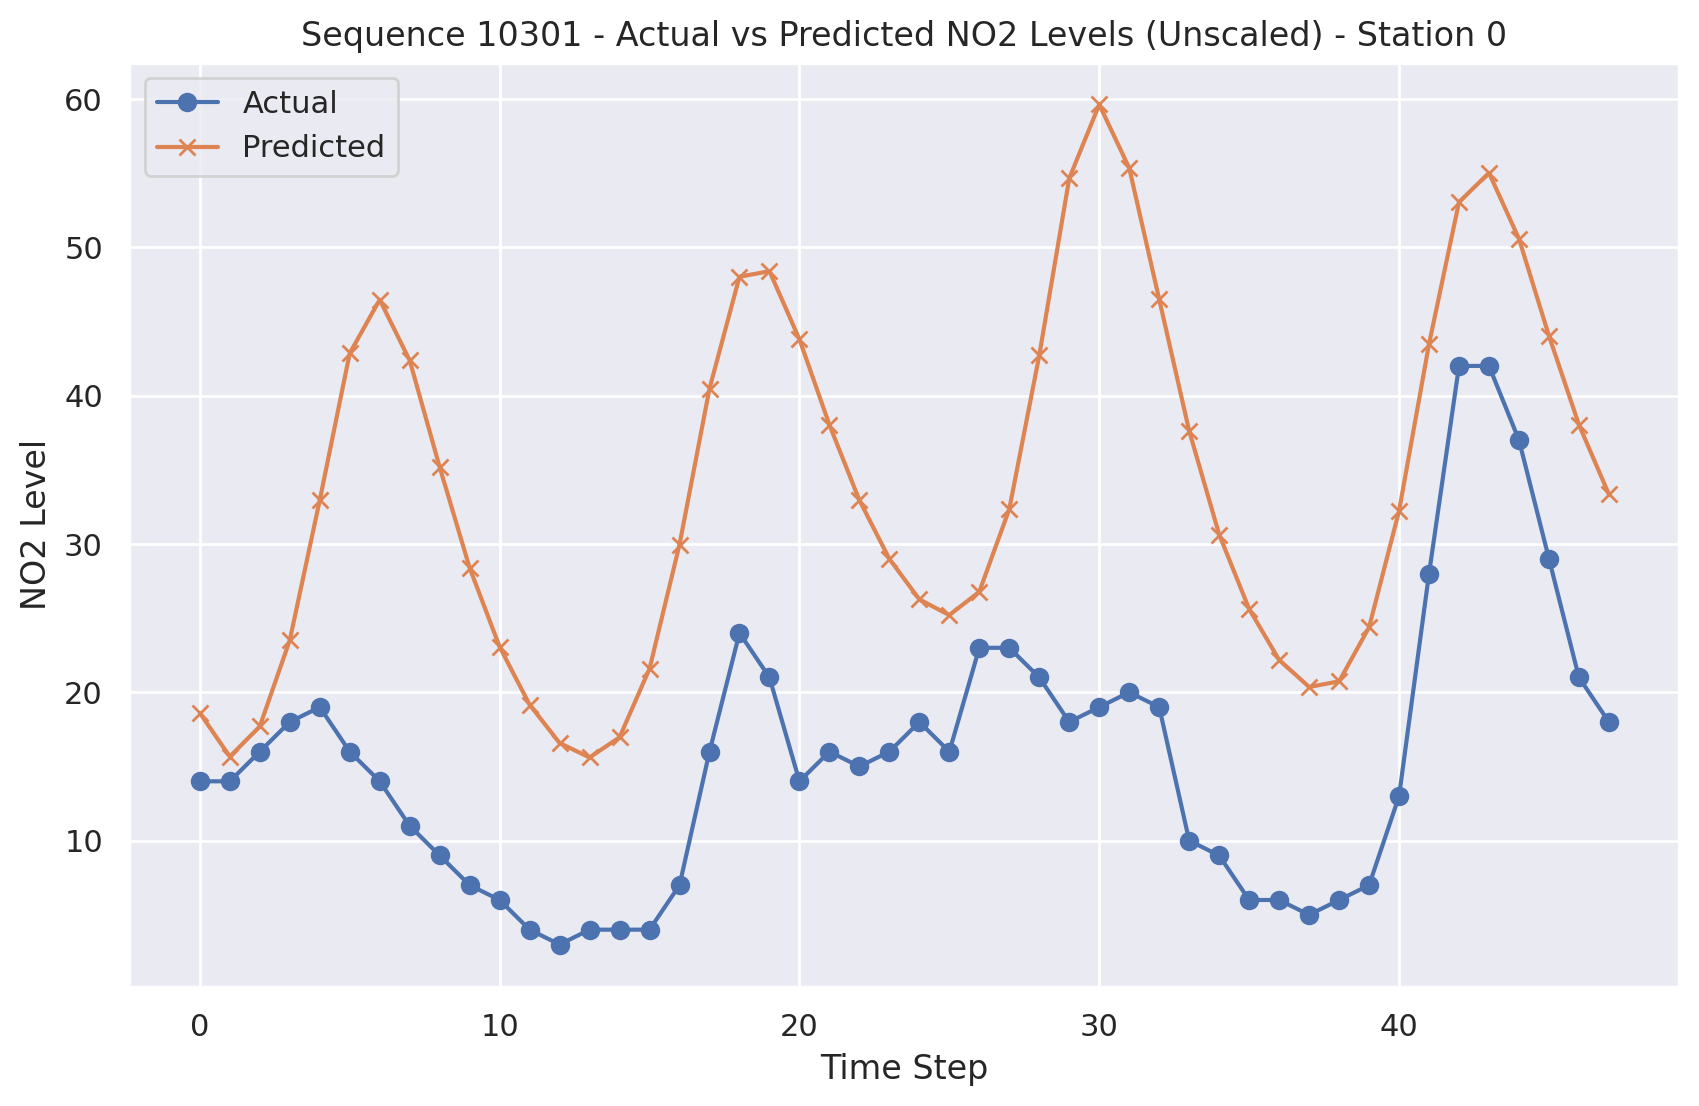

In [ ]:
station_to_plot = 0  # Can be selected
all_indices = [i for i in range(len(predictions_unscaled)) if i % 20 == station_to_plot]
# Randomly select 5 indices from the available ones
indices_to_plot = random.sample(all_indices, min(5, len(all_indices)))
# Plot each selected sequence separately
for i in indices_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_unscaled[i, :, station_to_plot], label='Actual', marker='o')
    plt.plot(predictions_unscaled[i, :, station_to_plot], label='Predicted', marker='x')
    plt.title(f'Sequence {i+1} - Actual vs Predicted NO2 Levels (Unscaled) - Station {station_to_plot}')
    plt.xlabel('Time Step')
    plt.ylabel('NO2 Level')
    plt.legend()
    plt.show()




## Unmelted data, used for Alert Prediction

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError, MeanSquaredLogarithmicError
from sklearn.model_selection import train_test_split

def create_sequences_for_station_sliding(data, window_size, target_size, step_size=24):
    num_samples = len(data) - window_size - target_size + 1

    sequences = []
    targets = []

    for i in range(0, num_samples, step_size):
        start_index = i
        end_index = start_index + window_size
        target_start_index = end_index
        target_end_index = target_start_index + target_size
        sequence = data[start_index:end_index]
        target = data[target_start_index:target_end_index,0]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 72
target_size = 24
training_data = training_no2_hourly_imputed_global_df.values
testing_data = testing_no2_hourly_imputed_df.values
scalers = []
training_data_scaled = np.zeros_like(training_data)
for i in range(training_data.shape[1]):
    if 24 <= i <= 30 or i==35 or i==36:  # Exclude dummy columns from scaling
        training_data_scaled[:, i] = training_data[:, i]
    else:
        scaler = MinMaxScaler(feature_range=(0, 1))
        training_data_scaled[:, i] = scaler.fit_transform(training_data[:, i].reshape(-1, 1)).flatten()
        scalers.append(scaler)

testing_data_scaled = np.zeros_like(testing_data)
for i, scaler in enumerate(scalers):
    if 24 <= i <= 30 or i==35 or i==36:  # Exclude dummy columns from scaling
        testing_data_scaled[:, i] = testing_data[:, i]
    else:
        testing_data_scaled[:, i] = scaler.transform(testing_data[:, i].reshape(-1, 1)).flatten()

X_train_list = []
y_train_list = []

for i in range(20):
    data_for_station = np.hstack((training_data_scaled[:, i:i+1], training_data_scaled[:, 20:]))
    print(data_for_station.shape)
    X_station, y_station = create_sequences_for_station_sliding(
        data_for_station, window_size, target_size
    )
    X_train_list.append(X_station)
    y_train_list.append(y_station)

print(len(X_train_list))
X_train = np.concatenate(X_train_list, axis=-1)
print("Shape of X_train before reshaping:", X_train.shape)
X_train = X_train.reshape(-1, window_size, 20)
print("Shape of X_train after reshaping:", X_train.shape)
y_train = np.concatenate(y_train_list, axis=-1).reshape(-1, target_size, 1)

(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
(61368, 20)
20
Shape of X_train before reshaping: (2554, 72, 400)
Shape of X_train after reshaping: (51080, 72, 20)


In [ ]:
print("Original shape of X_train:", X_train.shape)
print("Number of samples in X_train:", X_train.shape[0])
print("Window size:", window_size)
print("Number of features per time step:", X_train.shape[1])

Original shape of X_train: (45954, 72, 20)
Number of samples in X_train: 45954
Window size: 72
Number of features per time step: 72


In [ ]:
from tensorflow.keras.layers import RepeatVector
model = Sequential()
model.add(LSTM(68, input_shape=(window_size,data_for_station.shape[1]),return_sequences=True))
model.add(LSTM(68, return_sequences=False))
model.add(RepeatVector(target_size))
model.add(LSTM(68, return_sequences=True))
model.add(TimeDistributed(Dense(1, activation='relu')))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[
        MeanAbsoluteError(name='mean_absolute_error'),
        RootMeanSquaredError(name='root_mean_squared_error'),
        MeanSquaredLogarithmicError(name='mean_squared_logarithmic_error')
    ]
)

history = model.fit(X_train, y_train, epochs=1, batch_size=32)

1597/1597 [==============================] - 27s 12ms/step - loss: 0.0095 - mean_absolute_error: 0.0726 - root_mean_squared_error: 0.0975 - mean_squared_logarithmic_error: 0.0065


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_test_list = []
y_test_list = []

for i in range(20):
    data_for_station = np.hstack((testing_data_scaled[:, i:i+1], testing_data_scaled[:, 20:]))
    print(data_for_station.shape)
    X_station, y_station = create_sequences_for_station_sliding(
        data_for_station, window_size, target_size
    )
    X_test_list.append(X_station)
    y_test_list.append(y_station)

X_test = np.concatenate(X_test_list, axis=-1)
print("Shape of X_test before reshaping:", X_test.shape)
X_test = X_test.reshape(-1, window_size, data_for_station.shape[1])
print("Shape of X_test after reshaping:", X_test.shape)
y_test = np.concatenate(y_test_list, axis=-1).reshape(-1, target_size, 1)

(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
(26304, 20)
Shape of X_test before reshaping: (1093, 72, 400)
Shape of X_test after reshaping: (21860, 72, 20)


In [ ]:
predictions = model.predict(X_test)
print("Shape of predictions:", predictions.shape)
predictions_unscaled = np.zeros((predictions.shape[0], predictions.shape[1], 20))
y_test_unscaled = np.zeros((y_test.shape[0], y_test.shape[1], 20))
for i in range(20):
    current_scaler = scalers[i]
    predictions_unscaled[:, :, i] = current_scaler.inverse_transform(predictions[:, :, 0].reshape(-1, 1)).reshape(-1, target_size)
    y_test_unscaled[:, :, i] = current_scaler.inverse_transform(y_test[:, :, 0].reshape(-1, 1)).reshape(-1, target_size)
predictions_flat = predictions_unscaled.flatten()
y_test_flat = y_test_unscaled.flatten()

mae = mean_absolute_error(y_test_flat, predictions_flat)
rmse = np.sqrt(mean_squared_error(y_test_flat, predictions_flat))

684/684 [==============================] - 4s 5ms/step
Shape of predictions: (21860, 24, 1)


In [ ]:
mae

23.52494289365028

In [ ]:
rmse

29.042807420996006

# ALERTS

## Computing the Alarms

In [ ]:
from itertools import combinations
def process_dataframe(df):
    df.index = pd.to_datetime(df.index)
    # Identify rows that satisfy the initial condition
    initial_condition_rows = df[df.gt(180).sum(axis=1) >= 3]
    # Create a new column 'result' and initialize it with 0 for all rows
    initial_condition_rows['result'] = 0
    # Iterate over selected rows and check the condition
    for index, row in initial_condition_rows.iterrows():
        # Get indices of columns where values are greater than or equal to 180
        relevant_columns = [col for col in df.columns if row[col] >= 180]
        # Check if there are more than 3 relevant columns
        if len(relevant_columns) > 3:
            # Generate all combinations of 3 columns
            column_combinations = list(combinations(relevant_columns, 3))
            # Check if at least one subset of 3 columns satisfies the condition
            if index + pd.DateOffset(hours=2) < df.index[-1]:  # Check if there are at least two more rows after the current one
                for subset in column_combinations:
                    if np.all(df.loc[index + pd.DateOffset(hours=1):index + pd.DateOffset(hours=2), subset].values.flatten() >= 180):
                        condition_met = True
                        print(f"Indexes of columns for row {index}:", df.columns.get_indexer(subset))
                        break
                else:
                    condition_met = False
            else:
                condition_met = False
        elif len(relevant_columns) == 3:
            # If there are exactly 3 relevant columns, check the condition for those columns
            if index + pd.DateOffset(hours=2) < df.index[-1]:  # Check if there are at least two more rows after the current one
                condition_met = np.all(df.loc[index + pd.DateOffset(hours=1):index + pd.DateOffset(hours=2), relevant_columns].values.flatten() >= 180)
                if condition_met:
                    print(f"Indexes of columns for row {index}:", df.columns.get_indexer(relevant_columns))
            else:
                condition_met = False
        elif len(relevant_columns) < 3:
            # If there are not enough relevant columns, set 'result' to 0
            condition_met = False
        # If the condition is met, set 'result' to 1 for the specific row
        if condition_met:
            df.at[index, 'result'] = 1
    # Fill rows that don't satisfy any condition with 0 in the 'result' column
    df['result'].fillna(0, inplace=True)
    # Count the number of 1's in the 'result' column
    count_of_ones = df['result'].sum()
    print(f"Number of 1's in the 'result' column: {count_of_ones}")
    return df
training_no2_hourly_imputed_global_df_levels = training_no2_hourly_imputed_global_df.iloc[:, :20]
testing_no2_hourly_imputed_df_levels=testing_no2_hourly_imputed_df.iloc[:,:20]
training_alarms = process_dataframe(testing_no2_hourly_imputed_df_levels)
testing_alarms = process_dataframe(testing_no2_hourly_imputed_df_levels)
print(testing_alarms)


<ipython-input-25-34cf9b1d30b4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_condition_rows['result'] = 0


Indexes of columns for row 2018-12-04 19:00:00: [0 1 9]
Indexes of columns for row 2019-01-14 19:00:00: [0 1 8]
Number of 1's in the 'result' column: 2.0
Indexes of columns for row 2018-12-04 19:00:00: [0 1 9]


<ipython-input-25-34cf9b1d30b4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  initial_condition_rows['result'] = 0


Indexes of columns for row 2019-01-14 19:00:00: [0 1 8]
Number of 1's in the 'result' column: 2.0
                     28079008  28079011  28079016  28079017  28079018  \
FECHA                                                                   
2018-01-01 00:00:00     33.00     11.00     12.00     23.00     32.00   
2018-01-01 01:00:00     64.00     33.00     26.00     43.00     41.00   
2018-01-01 02:00:00     63.00     27.00     39.00     34.00     26.00   
2018-01-01 03:00:00     51.00     16.00     17.00     29.00     22.00   
2018-01-01 04:00:00     57.00     11.00     14.00     18.00     28.00   
...                       ...       ...       ...       ...       ...   
2020-12-31 19:00:00     39.62     20.00     27.00     27.00     18.00   
2020-12-31 20:00:00     41.17     19.00     24.00     33.00     22.00   
2020-12-31 21:00:00     34.93     18.00     27.00     29.00     23.00   
2020-12-31 22:00:00     28.04     14.00     21.00     19.00     16.00   
2020-12-31 23:00:00     26

In [ ]:
def split_df_by_columns(original_df, column_mapping):
    original_columns = list(original_df.columns)
    additional_columns = list(set(original_columns) - set(column for columns_list in column_mapping.values() for column in columns_list))
    result_dfs = {}
    for key, columns_to_select in column_mapping.items():
        selected_columns = columns_to_select + additional_columns
        result_dfs[key] = original_df[selected_columns]
    return result_dfs

zones = {1: ['28079008', '28079048', '28079050', '28079011', '28079038', '28079035'],
         2: ['28079036', '28079040', '28079054'],
         3: ['28079016', '28079057', '28079055', '28079027', '28079060', '28079059'],
         4: ['28079058', '28079024'],
         5: ['28079018', '28079017']}

result_dataframes = split_df_by_columns(training_no2_hourly_imputed_global_df_levels, zones)
result_dataframes_test=split_df_by_columns(testing_no2_hourly_imputed_df_levels, zones)


In [ ]:
result_dataframes_test

{1:                      28079008  28079048  28079050  28079011  28079038  \
 FECHA                                                                   
 2018-01-01 00:00:00     33.00     11.00     12.00     11.00     13.00   
 2018-01-01 01:00:00     64.00     38.00     36.00     33.00     40.00   
 2018-01-01 02:00:00     63.00     35.00     35.00     27.00     23.00   
 2018-01-01 03:00:00     51.00     22.00     22.00     16.00     14.00   
 2018-01-01 04:00:00     57.00     18.00     15.00     11.00     14.00   
 ...                       ...       ...       ...       ...       ...   
 2020-12-31 19:00:00     39.62     31.00     26.00     20.00     23.00   
 2020-12-31 20:00:00     41.17     30.00     26.00     19.00     22.00   
 2020-12-31 21:00:00     34.93     29.00     24.00     18.00     21.00   
 2020-12-31 22:00:00     28.04     24.00     16.00     14.00     17.00   
 2020-12-31 23:00:00     26.40     17.00     14.00     11.00     13.00   
 
                      28079035  r

In [ ]:
#Alarm Condition Rules Checking for Sub-Zones
def process_zone_dataframe(df):
    df = df.iloc[:, :20].copy()
    df.index = pd.to_datetime(df.index)
    initial_condition_rows = df[df.gt(180).sum(axis=1) >= 2]
    df['result']=0
    initial_condition_rows['result'] = 0
    for index, row in initial_condition_rows.iterrows():
        relevant_columns = [col for col in df.columns if row[col] >= 180
        if len(relevant_columns) >= 2:
            # Check if the next row satisfies the condition
            if index + pd.DateOffset(hours=1) < df.index[-1]:  # Check if there is at least one more row after the current one
                condition_met = np.all(df.loc[index + pd.DateOffset(hours=1), relevant_columns].values >= 180)
            else:
                condition_met = False
        else:
            condition_met = False
        df.at[index, 'result'] = int(condition_met)
    count_of_ones = df['result'].sum()
    print(f"Number of 1's in the 'result' column: {count_of_ones}")

    return df


In [ ]:
result_dataframes_joined = {}
for key, df in result_dataframes.items():
    df = df.iloc[:, :20]
    result_df = process_zone_dataframe(df)
    result_dataframes_joined[key] = result_df
filtered_dataframes = {key: df[df['result'] == 1] for key, df in result_dataframes_joined.items()}
#Merge filtered DataFrames horizontally
merged_df = pd.concat(filtered_dataframes.values(), axis=1)

result_dataframes_joined_test = {}
for key, df in result_dataframes_test.items():
    df = df.iloc[:, :20]
    result_df = process_zone_dataframe(df)
    result_dataframes_joined_test[key] = result_df

filtered_dataframes_test = {key: df[df['result'] == 1] for key, df in result_dataframes_joined_test.items()}
merged_df_test = pd.concat(filtered_dataframes_test.values(), axis=1)
print("\nMerged DataFrame:")
print(merged_df_test)

In [ ]:
all_indices = pd.concat([df.index.to_frame() for df in filtered_dataframes.values()])
all_indices_test = pd.concat([df.index.to_frame() for df in filtered_dataframes_test.values()])
unique_dates_hours = len(set(all_indices.index))
unique_dates_hours_test = len(set(all_indices_test.index))
print("\nNumber of Unique Dates/Hours in train data:", unique_dates_hours)
print("\nNumber of Unique Dates/Hours in test data:", unique_dates_hours_test)


Number of Unique Dates/Hours in train data: 259

Number of Unique Dates/Hours in test data: 10


In [ ]:
filtered_training_alarms = training_alarms[training_alarms['result'] == 1]
filtered_testing_alarms = testing_alarms[testing_alarms['result'] == 1]
merged_df = pd.concat([merged_df, filtered_training_alarms], axis=1)
merged_df_test = pd.concat([merged_df_test, filtered_testing_alarms], axis=1)
print("Merged DataFrame:")
print(merged_df_test)

Merged DataFrame:
                     28079008  28079048  28079050  28079011  28079038  \
FECHA                                                                   
2018-12-04 18:00:00    114.00    181.00    158.00    237.00    185.00   
2018-12-04 19:00:00       NaN       NaN       NaN       NaN       NaN   
2018-12-04 20:00:00    203.00    177.00    235.00    331.00    231.00   
2018-12-10 19:00:00       NaN       NaN       NaN       NaN       NaN   
2018-12-24 20:00:00    103.00    114.00     91.00    144.06    225.00   
2018-12-26 20:00:00    135.00    107.00    144.00    201.00    169.00   
2018-12-26 21:00:00    143.00    116.00    143.00    230.00    153.00   
2018-12-31 20:00:00    109.00     97.00    154.00    184.00    230.00   
2019-01-14 19:00:00    279.00    159.00    170.00    183.00    172.00   
2019-02-15 20:00:00       NaN       NaN       NaN       NaN       NaN   
2019-02-25 20:00:00    175.00    140.00    152.00    229.00    182.00   

                     28079035  r

In [ ]:
#Concatenate the indices of 'filtered_training_alarms' and 'merged_df'
all_indices = pd.concat([filtered_training_alarms.index.to_frame(), merged_df.index.to_frame()])
all_indices_test= pd.concat([filtered_testing_alarms.index.to_frame(), merged_df_test.index.to_frame()])
#Get the number of unique dates/hours
unique_dates_hours = len(set(all_indices.index))
unique_dates_hours_test = len(set(all_indices_test.index))
print("\nNumber of Unique Dates/Hours in 'filtered_training_alarms' and 'merged_df':", unique_dates_hours)
print("\nNumber of Unique Dates/Hours in 'filtered_training_alarms' and 'merged_df':", unique_dates_hours_test)


Number of Unique Dates/Hours in 'filtered_training_alarms' and 'merged_df': 261

Number of Unique Dates/Hours in 'filtered_training_alarms' and 'merged_df': 11


In [ ]:
training_alarm_data=pd.DataFrame(training_data_scaled)
testing_alarm_data=pd.DataFrame(testing_data_scaled)
date_range = pd.date_range(start='2011-01-01 00:00', end='2017-12-31 23:00', freq='H')
training_alarm_data.index = date_range
date_range = pd.date_range(start='2018-01-01 00:00', end='2020-12-31 23:00', freq='H')
testing_alarm_data.index = date_range
training_alarm_data['Alert'] = 0
testing_alarm_data['Alert']=0
# Set the values to 1 where the index is present in 'merged_df'
training_alarm_data.loc[training_alarm_data.index.isin(merged_df.index), 'Alert'] = 1
testing_alarm_data.loc[testing_alarm_data.index.isin(merged_df_test.index), 'Alert'] = 1
count_of_ones = testing_alarm_data['Alert'].sum()
print("Count of 1's in the 'binary_column':", count_of_ones)


Count of 1's in the 'binary_column': 11


## Alarm Example plot

In [ ]:
q= training_alarm_data[training_alarm_data['Alert'] == 1]

In [ ]:
first_index = q.index[0]
new_index = pd.date_range(start=first_index, periods=10, freq='H')
training_no2_hourly_imputed_global_df.index = pd.to_datetime(training_no2_hourly_imputed_global_df.index)
result_df = training_no2_hourly_imputed_global_df.loc[new_index]
result_df=result_df.iloc[:,[1, 14, 16]]
result_df

28079011  28079054  28079057
2011-01-13 20:00:00    185.00    225.00    214.00
2011-01-13 21:00:00    247.00    214.00    232.00
2011-01-13 22:00:00    201.00    141.00    187.00
2011-01-13 23:00:00    143.00    110.00    117.00
2011-01-14 00:00:00     91.00    101.00     98.00
2011-01-14 01:00:00     72.00     66.00     80.00
2011-01-14 02:00:00     54.00     48.00     65.00
2011-01-14 03:00:00     38.00     45.00     44.00
2011-01-14 04:00:00     37.00     42.00     42.00
2011-01-14 05:00:00     41.00     43.00     39.00

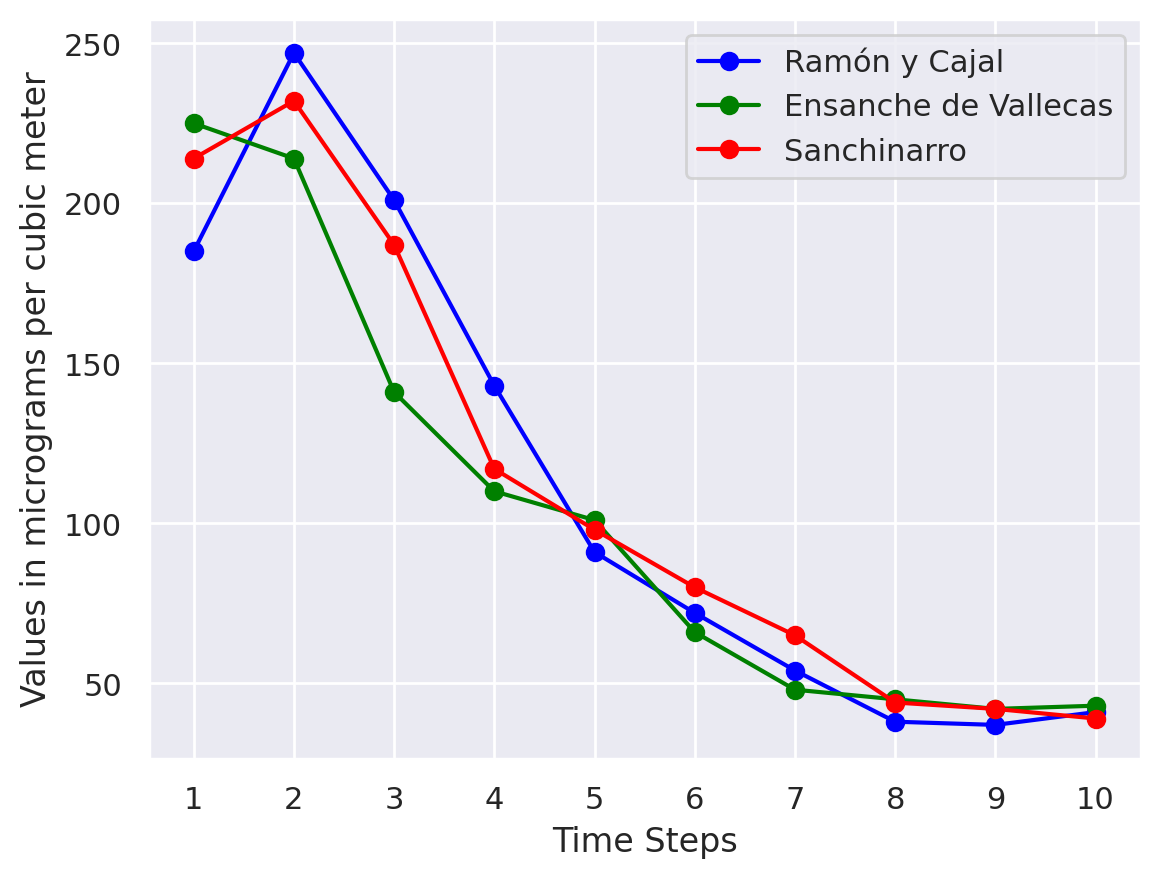

In [ ]:
selected_columns_reset_index = result_df.reset_index()
plt.plot(selected_columns_reset_index.index + 1, result_df['28079011'], label='Ramón y Cajal', color='blue', marker='o')
plt.plot(selected_columns_reset_index.index + 1, result_df['28079054'], label='Ensanche de Vallecas', color='green', marker='o')
plt.plot(selected_columns_reset_index.index + 1, result_df['28079057'], label='Sanchinarro', color='red', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Values in micrograms per cubic meter')
plt.xticks(selected_columns_reset_index.index + 1)
plt.legend()
plt.show()

## Dealing with Unbalanced Dataset

In [ ]:
from imblearn.combine import SMOTEENN
X_train = training_alarm_data.drop('Alert', axis=1)  # Features
y_train = training_alarm_data['Alert']  # Target variable
smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

In [ ]:
print("Original size:", X_train.shape[0])
print("Resampled size:", X_train_resampled.shape[0])
num_new_samples = X_train_resampled.shape[0] - X_train.shape[0]
print("Number of new samples created by SMOTENN:", num_new_samples)

Original size: 61368
Resampled size: 121880
Number of new samples created by SMOTENN: 60512


## XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import ParameterSampler
param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'n_estimators': np.arange(50, 100, 150),
    'max_depth': np.arange(4, 7),
    'subsample': np.linspace(0.8, 1.0, 5),
    'colsample_bytree': np.linspace(0.8, 1.0, 5),
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

xgb_model = xgb.XGBClassifier(random_state=42)
n_iter = 60
best_params = None
best_accuracy = 0.0

# Generate random hyperparameter combinations
param_combinations = list(ParameterSampler(param_dist, n_iter=n_iter, random_state=42))
for params in param_combinations:
    xgb_model.set_params(**params)
    xgb_model.fit(X_train_resampled, y_train_resampled)
    accuracy = xgb_model.score(X_train_resampled, y_train_resampled)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


In [ ]:
best_xgb_model = xgb.XGBClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    random_state=42
)
X_test = testing_alarm_data.drop('Alert', axis=1)  # Features
y_test = testing_alarm_data['Alert']  # Target variable
best_xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_test = best_xgb_model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26293
           1       0.18      0.91      0.29        11

    accuracy                           1.00     26304
   macro avg       0.59      0.95      0.65     26304
weighted avg       1.00      1.00      1.00     26304

Confusion Matrix:
 [[26246    47]
 [    1    10]]


In [ ]:
testing_no2_hourly_imputed_df.index = pd.to_datetime(testing_no2_hourly_imputed_df.index)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']
# Filter out the False Positives
false_positives = results_df[(results_df['Actual'] == 0) & (results_df['Predicted'] == 1)]
print("False Positives:")
print(false_positives)
# Access the misclassified samples from the original test set
misclassified_samples = testing_no2_hourly_imputed_df.loc[false_positives.index]
miss=pd.DataFrame(misclassified_samples)
miss=miss.iloc[:,:20]
miss


False Positives:
                     Actual  Predicted  Correct
2018-01-23 20:00:00       0          1    False
2018-01-23 21:00:00       0          1    False
2018-01-29 20:00:00       0          1    False
2018-08-01 22:00:00       0          1    False
2018-08-01 23:00:00       0          1    False
2018-08-02 21:00:00       0          1    False
2018-08-02 22:00:00       0          1    False
2018-09-12 21:00:00       0          1    False
2018-09-19 22:00:00       0          1    False
2018-09-25 20:00:00       0          1    False
2018-09-25 21:00:00       0          1    False
2018-10-04 21:00:00       0          1    False
2018-10-04 22:00:00       0          1    False
2018-10-24 20:00:00       0          1    False
2018-12-04 21:00:00       0          1    False
2018-12-05 19:00:00       0          1    False
2018-12-10 18:00:00       0          1    False
2018-12-10 20:00:00       0          1    False
2018-12-31 19:00:00       0          1    False
2018-12-31 21:00:00    

28079008  28079011  28079016  28079017  28079018  \
2019-12-28 20:00:00    141.00    185.00    124.00    139.00    127.00   
2020-01-08 19:00:00    131.00    211.00    185.00    130.00    172.00   
2020-01-08 20:00:00    146.00    201.00    148.00    135.00    166.00   
2020-01-08 21:00:00    144.00    228.00    158.00    133.00    153.00   
2020-02-21 20:00:00    117.00    217.00    178.00    162.00    155.00   
2020-02-21 21:00:00    142.00    234.00    177.00    155.00    132.00   
2020-09-12 22:00:00    110.00    206.00    110.00    138.00    114.00   

                     28079024  28079027  28079035  28079036  28079038  \
2019-12-28 20:00:00     79.00    161.00    118.00    110.00    171.00   
2020-01-08 19:00:00     93.00    194.00     97.00    155.00    153.00   
2020-01-08 20:00:00    105.00    206.00    138.00    141.00    165.00   
2020-01-08 21:00:00    103.00    176.00    133.00    137.00    183.00   
2020-02-21 20:00:00     72.00    154.00    116.00    118.00    184.00   
2020-02-21 21:00:00     98.00    131.00    128.00    128.00    154.00   
2020-09-12 22:00:00     24.00    137.00     83.00     74.00    168.00   

                     28079039  28079040  28079048  28079050  28079054  \
2019-12-28 20:00:00    159.00    127.00    127.00    134.00    157.00   
2020-01-08 19:00:00    149.00    122.00    130.00    151.00    163.00   
2020-01-08 20:00:00    154.00    127.00    136.00    132.00    165.00   
2020-01-08 21:00:00    158.00    117.00    140.00    117.00    174.00   
2020-02-21 20:00:00    157.00    115.00    138.00    159.00    153.00   
2020-02-21 21:00:00    175.00    115.00    152.00    151.00    159.00   
2020-09-12 22:00:00    166.00     89.00    142.00    105.00    110.00   

                     28079055  28079057  28079058  28079059  28079060  
2019-12-28 20:00:00    135.00    162.00     43.00    124.00    115.00  
2020-01-08 19:00:00    143.00    170.00     71.00    131.00    135.00  
2020-01-08 20:00:00    162.00    192.00     60.00    152.00    148.00  
2020-01-08 21:00:00    170.00    200.00     58.00    138.00    157.00  
2020-02-21 20:00:00    125.00    162.00     50.00    132.00    135.00  
2020-02-21 21:00:00    151.00    160.00     37.00    133.00    147.00  
2020-09-12 22:00:00    107.00    162.00     43.00    105.00     41.00

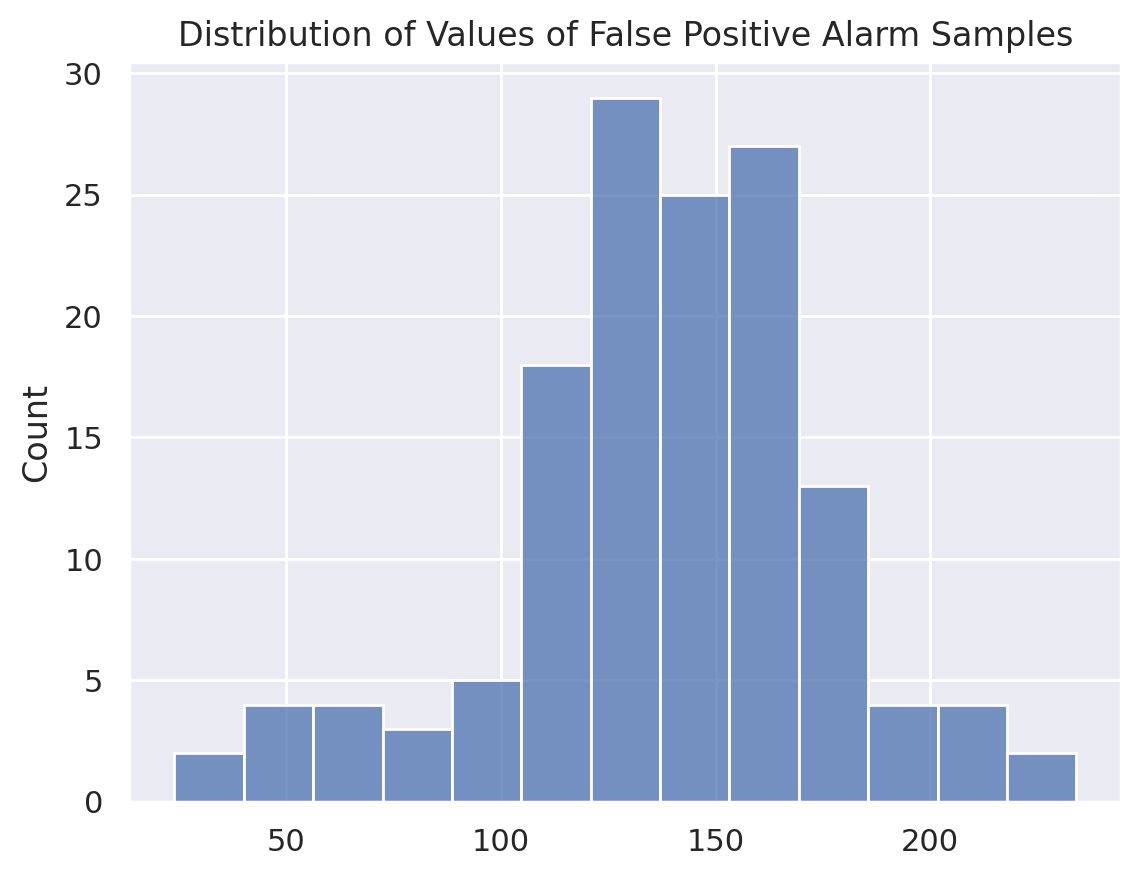

In [ ]:
flat_values = miss.values.flatten()
sns.histplot(flat_values, kde=False)
plt.title('Distribution of Values of False Positive Alarm Samples')
plt.show()

In [ ]:
percentage_over_100 = (miss > 100).mean().mean() * 100
print(f"Percentage of entries with values over 100: {percentage_over_100:.2f}%")

Percentage of entries with values over 100: 87.86%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## MLP Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_test = testing_alarm_data.drop('Alert', axis=1)
y_test = testing_alarm_data['Alert']
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3809/3809 [==============================] - 26s 6ms/step - loss: 0.0309 - accuracy: 0.9924 - val_loss: 0.2180 - val_accuracy: 0.9410
Epoch 2/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0106 - accuracy: 0.9974 - val_loss: 0.1952 - val_accuracy: 0.9562
Epoch 3/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.1421 - val_accuracy: 0.9683
Epoch 4/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.1179 - val_accuracy: 0.9748
Epoch 5/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.1078 - val_accuracy: 0.9771
Epoch 6/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0866 - val_accuracy: 0.9828
Epoch 7/10
3809/3809 [==============================] - 14s 4ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0851 - val_ac

In [ ]:
y_pred_probs = model.predict(X_test)
thresholds =  [0.1, 0.6, 0.7, 0.8,0.9, 0.91, 0.92, 0.93, 0.94, 0.945, 0.95, 0.96, 0.97, 0.98, 0.99]

for threshold in thresholds:
    y_pred = (y_pred_probs > threshold).astype(int)
    print(f"Threshold: {threshold}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

# BASELINE MODEL

## Prophet

In [ ]:
for col in training_no2_hourly_imputed_global_df.columns:
  print(col)

28079008
28079011
28079016
28079017
28079018
28079024
28079027
28079035
28079036
28079038
28079039
28079040
28079048
28079050
28079054
28079055
28079057
28079058
28079059
28079060
Hour
Day
Month
Year
DayOfWeek_Monday
DayOfWeek_Tuesday
DayOfWeek_Wednesday
DayOfWeek_Thursday
DayOfWeek_Friday
DayOfWeek_Saturday
DayOfWeek_Sunday
TEMPERATURA
VIENTO
PRECIPITACION
PRESION
WorkingDay
Trend
Policies
COVID


In [ ]:
from prophet import Prophet

In [ ]:
modified_df = training_no2_hourly_imputed_global_df.copy()
modified_df['NO2_Values_Average'] = modified_df.iloc[:, :20].mean(axis=1)
modified_df = modified_df.iloc[:, 20:]
column_order = ['NO2_Values_Average'] + modified_df.columns.tolist()
modified_df = modified_df[column_order]
modified_df = modified_df.iloc[:, :-1]

In [ ]:
modified_df_test = testing_no2_hourly_imputed_df.copy()
modified_df_test['NO2_Values_Average'] = modified_df_test.iloc[:, :20].mean(axis=1)
modified_df_test = modified_df_test.iloc[:, 20:]
column_order = ['NO2_Values_Average'] + modified_df_test.columns.tolist()
modified_df_test = modified_df_test[column_order]
modified_df_test = modified_df_test.iloc[:, :-1]

In [ ]:
train_df = modified_df
test_df = modified_df_test
train_df.reset_index(inplace=True)
test_df.reset_index(inplace=True)
train_df = train_df.rename(columns={'FECHA':'ds','NO2_Values_Average':'y'})
test_df= test_df.rename(columns={'FECHA':'ds','NO2_Values_Average':'y'})
future=test_df

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnln7lt79/603d7h1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnln7lt79/jdoumh4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55128', 'data', 'file=/tmp/tmpnln7lt79/603d7h1u.json', 'init=/tmp/tmpnln7lt79/jdoumh4k.json', 'output', 'file=/tmp/tmpnln7lt79/prophet_model0scp_d7w/prophet_model-20240129174922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:50:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


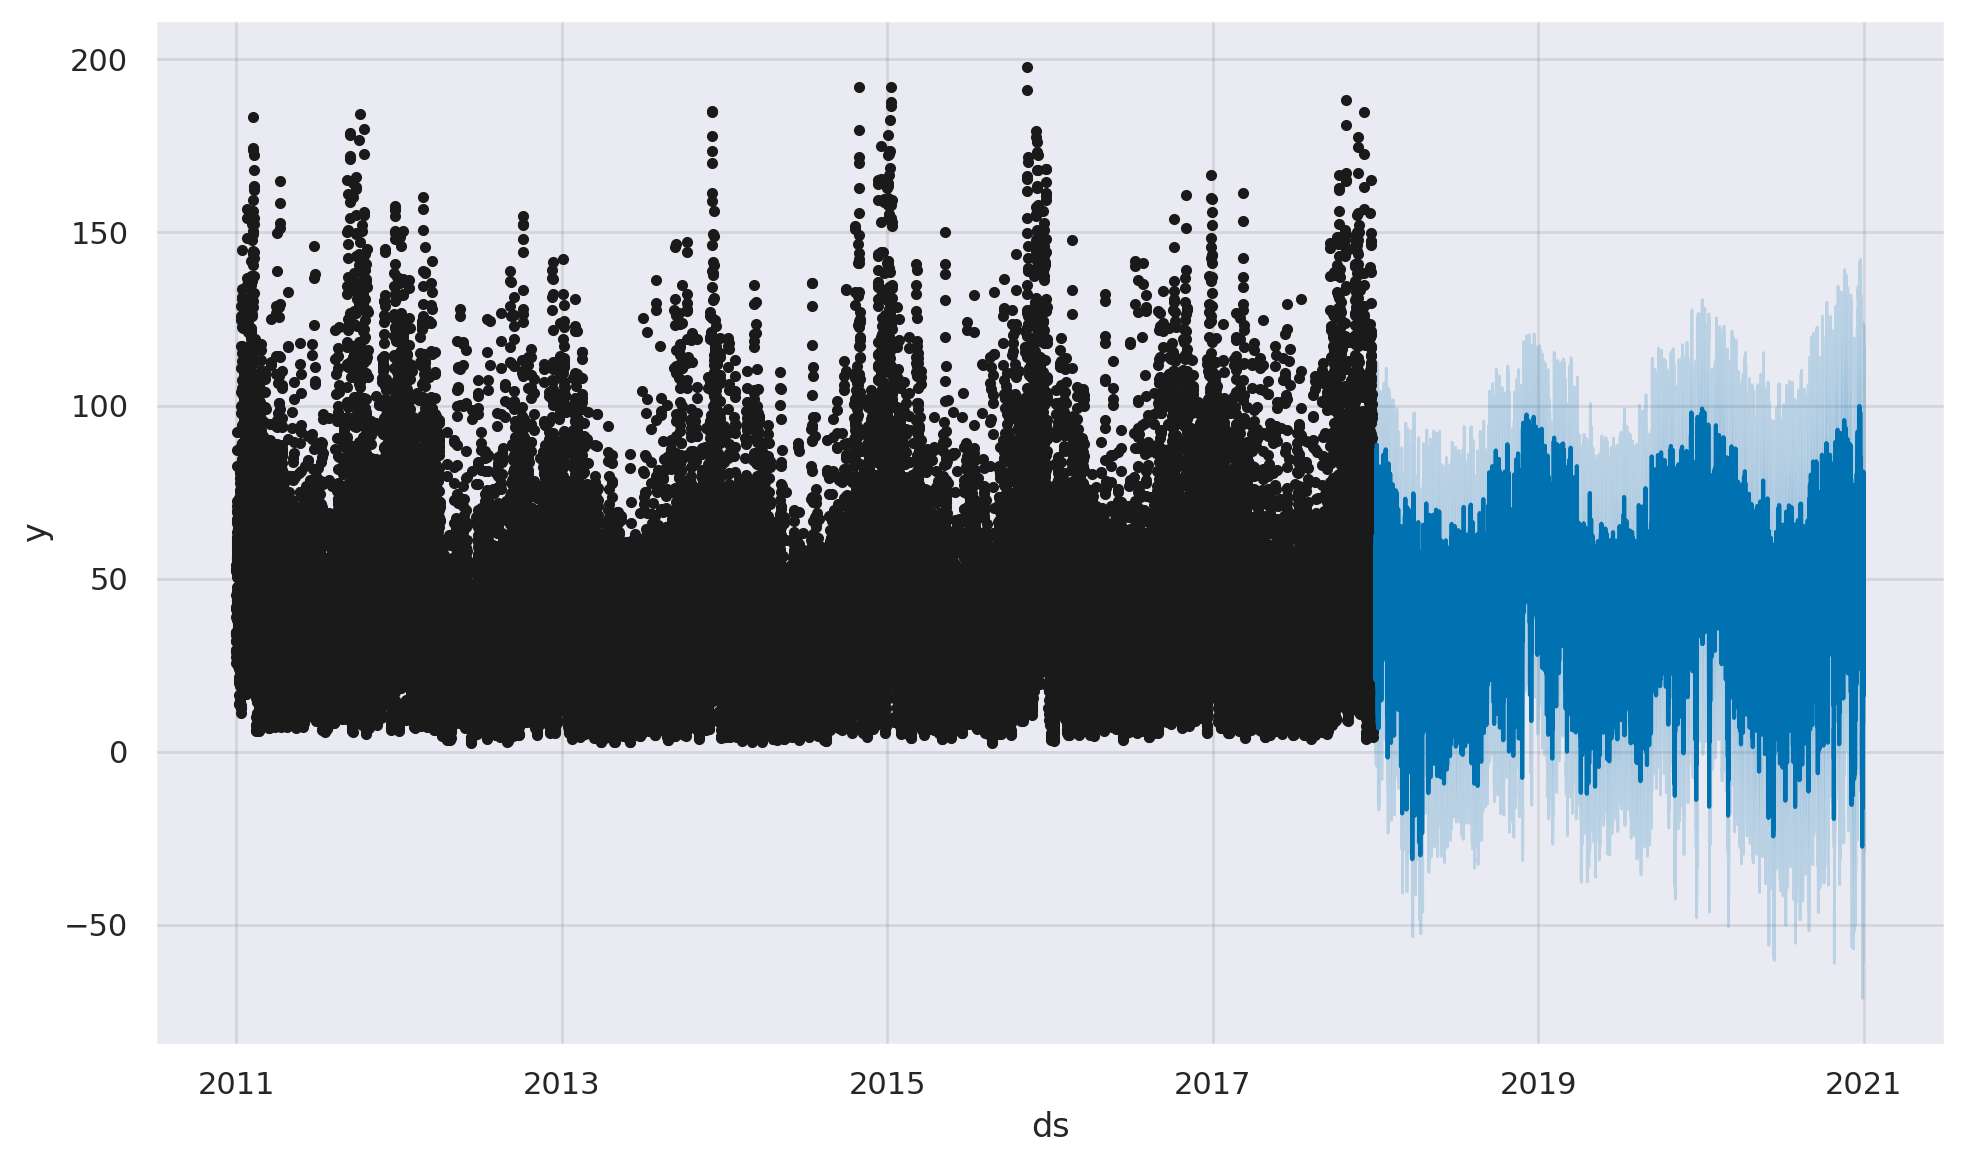

In [ ]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
for column in list(train_df.columns[2:20]):
    model.add_regressor(column)
model.fit(train_df)
predictions = model.predict(future)
predicted_values = predictions[['ds', 'yhat']].set_index('ds')
fig = model.plot(predictions)
fig.show()

In [ ]:
y_true = test_df['y'].values
predicted_values = predicted_values['yhat'].values
mae = mean_absolute_error(y_true, predicted_values)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_true, predicted_values)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

In [ ]:
predictions

ds  trend  yhat_lower  yhat_upper  trend_lower  \
0     2018-01-01 00:00:00  47.03        8.46       53.90        47.03   
1     2018-01-01 01:00:00  47.03        8.84       54.44        47.03   
2     2018-01-01 02:00:00  47.04       13.72       60.92        47.04   
3     2018-01-01 03:00:00  47.04       -3.75       44.35        47.04   
4     2018-01-01 04:00:00  47.04       10.69       56.71        47.04   
...                   ...    ...         ...         ...          ...   
26298 2020-12-31 18:00:00  65.78      -19.35       70.05        30.61   
26299 2020-12-31 19:00:00  65.78      -14.09       75.52        30.61   
26300 2020-12-31 20:00:00  65.78       -1.39       87.45        30.60   
26301 2020-12-31 21:00:00  65.79       -0.59       87.87        30.60   
26302 2020-12-31 22:00:00  65.79       14.24      101.14        30.60   

       trend_upper   Day  Day_lower  Day_upper  DayOfWeek_Friday  ...  weekly  \
0            47.03  0.46       0.46       0.46              0.00  ...   -8.99   
1            47.03  0.46       0.46       0.46              0.00  ...   -8.79   
2            47.04  0.46       0.46       0.46              0.00  ...   -8.57   
3            47.04  0.46       0.46       0.46              0.00  ...   -8.33   
4            47.04  0.46       0.46       0.46              0.00  ...   -8.08   
...            ...   ...        ...        ...               ...  ...     ...   
26298       100.68 -0.48      -0.48      -0.48              0.00  ...    6.00   
26299       100.69 -0.48      -0.48      -0.48              0.00  ...    6.12   
26300       100.69 -0.48      -0.48      -0.48              0.00  ...    6.24   
26301       100.69 -0.48      -0.48      -0.48              0.00  ...    6.35   
26302       100.69 -0.48      -0.48      -0.48              0.00  ...    6.47   

       weekly_lower  weekly_upper  yearly  yearly_lower  yearly_upper  \
0             -8.99         -8.99    9.59          9.59          9.59   
1             -8.79         -8.79    9.59          9.59          9.59   
2             -8.57         -8.57    9.58          9.58          9.58   
3             -8.33         -8.33    9.57          9.57          9.57   
4             -8.08         -8.08    9.56          9.56          9.56   
...             ...           ...     ...           ...           ...   
26298          6.00          6.00    9.59          9.59          9.59   
26299          6.12          6.12    9.59          9.59          9.59   
26300          6.24          6.24    9.58          9.58          9.58   
26301          6.35          6.35    9.57          9.57          9.57   
26302          6.47          6.47    9.56          9.56          9.56   

       multiplicative_terms  multiplicative_terms_lower  \
0                      0.00                        0.00   
1                      0.00                        0.00   
2                      0.00                        0.00   
3                      0.00                        0.00   
4                      0.00                        0.00   
...                     ...                         ...   
26298                  0.00                        0.00   
26299                  0.00                        0.00   
26300                  0.00                        0.00   
26301                  0.00                        0.00   
26302                  0.00                        0.00   

       multiplicative_terms_upper  yhat  
0                            0.00 30.38  
1                            0.00 32.59  
2                            0.00 36.10  
3                            0.00 20.65  
4                            0.00 33.58  
...                           ...   ...  
26298                        0.00 25.04  
26299                        0.00 28.67  
26300                        0.00 43.21  
26301                        0.00 45.07  
26302                        0.00 58.13  

[26303 rows x 79 columns]

## Naive

In [ ]:
df_melted_test_noweekdays_naive = df_melted_test_noweekdays.iloc[:, [12]]
def create_sequences(data, seq_length_x, seq_length_y):
    X, y = [], []
    for i in range(0, len(data) - seq_length_x - seq_length_y + 1, seq_length_x + seq_length_y):
        seq_x = data.iloc[i:i+seq_length_x].values
        seq_y = data.iloc[i+seq_length_x:i+seq_length_x+seq_length_y].values
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
sequence_length_x = 24
sequence_length_y = 48
X, y = create_sequences(df_melted_test_noweekdays_naive, sequence_length_x, sequence_length_y)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (7306, 24, 1)
Shape of y: (7306, 48, 1)


In [ ]:
# Extract the last known 24 hour values from each sequence in X
naive_predictions = X[:, -sequence_length_x:, :]
# Repeat the last known 24 hour values for the next two days (48 timesteps)
naive_predictions_repeated = np.concatenate([naive_predictions[:, :sequence_length_x]] * 2, axis=1)
y_flattened = y.reshape(y.shape[0], -1)
naive_predictions_flattened = naive_predictions_repeated.reshape(naive_predictions_repeated.shape[0], -1)
mse = mean_squared_error(y_flattened, naive_predictions_flattened)
print("Mean Squared Error (MSE) of the naive model:", mse)
mae = mean_absolute_error(y_flattened, naive_predictions_flattened)
rmse = np.sqrt(mean_squared_error(y_flattened, naive_predictions_flattened))
print("Mean Absolute Error (MAE) of the naive model:", mae)
print("Root Mean Squared Error (RMSE) of the naive model:", rmse)


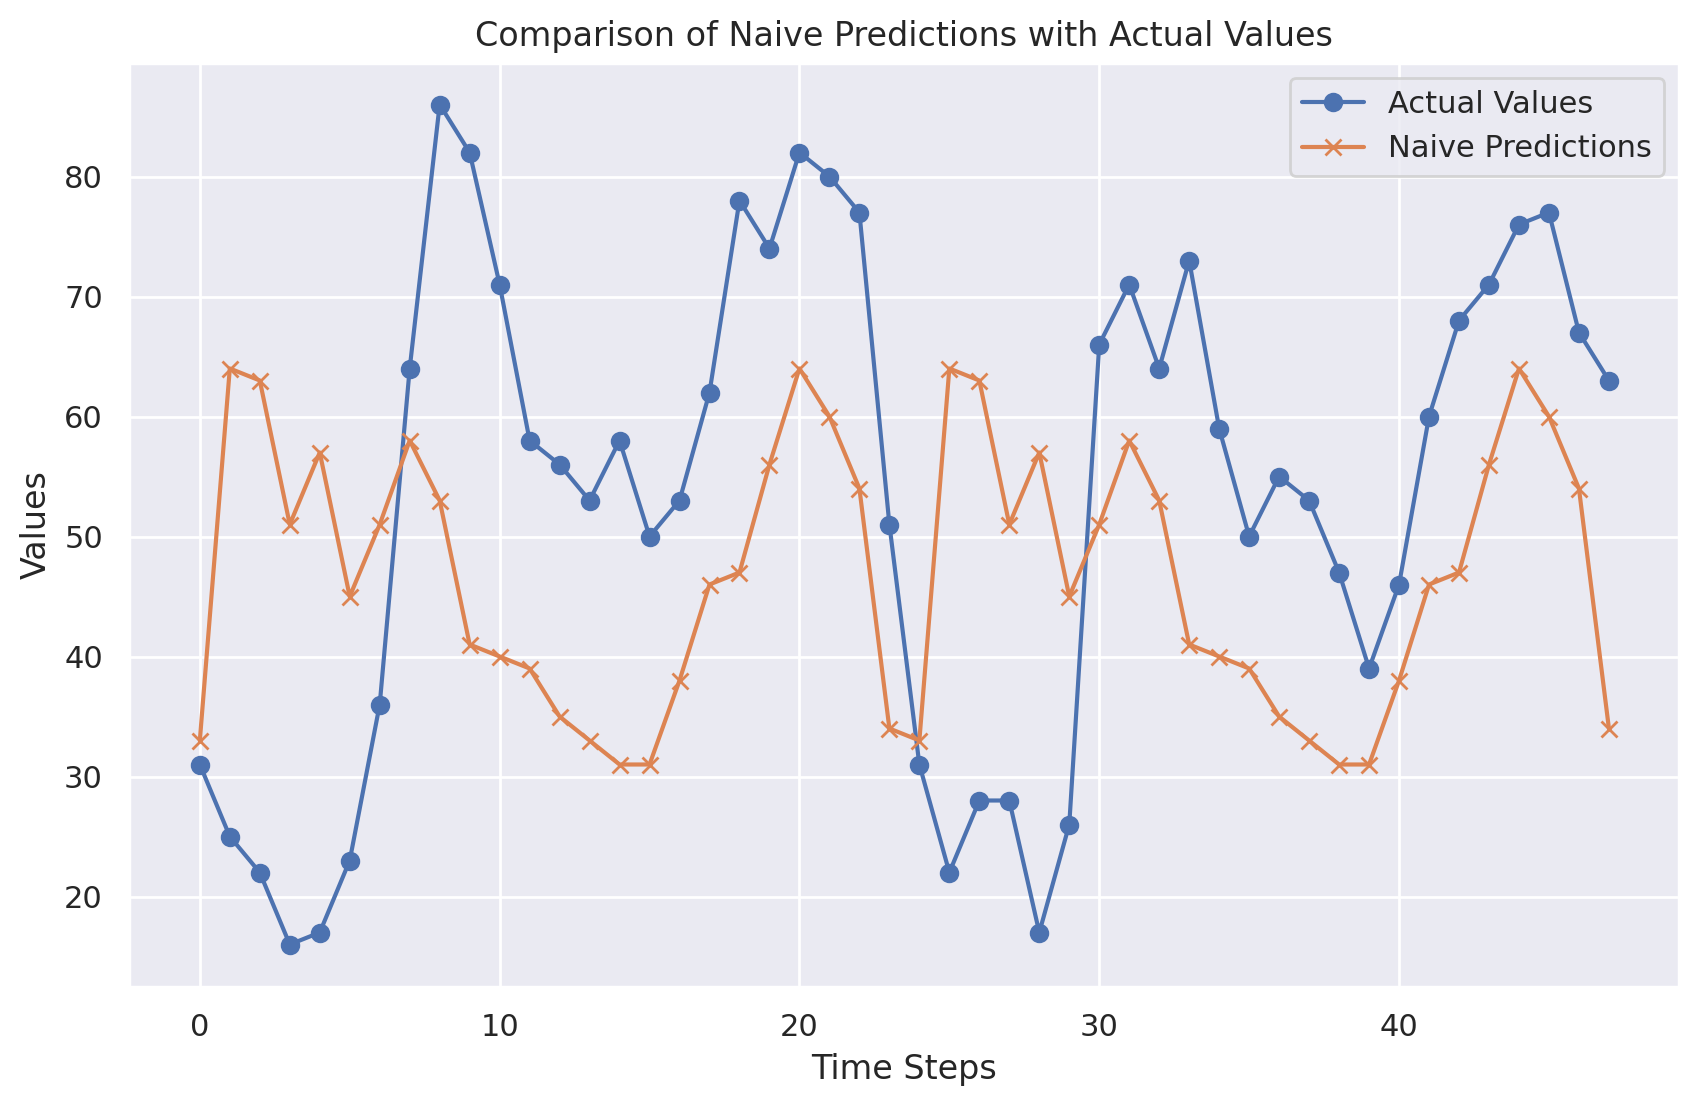

In [ ]:
sequence_index = 0
actual_values = y_flattened[sequence_index]
naive_predicted_values = naive_predictions_flattened[sequence_index]
time_steps = np.arange(0, sequence_length_y, 1)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, actual_values, label='Actual Values', marker='o')
plt.plot(time_steps, naive_predicted_values, label='Naive Predictions', marker='x')
plt.title('Comparison of Naive Predictions with Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()


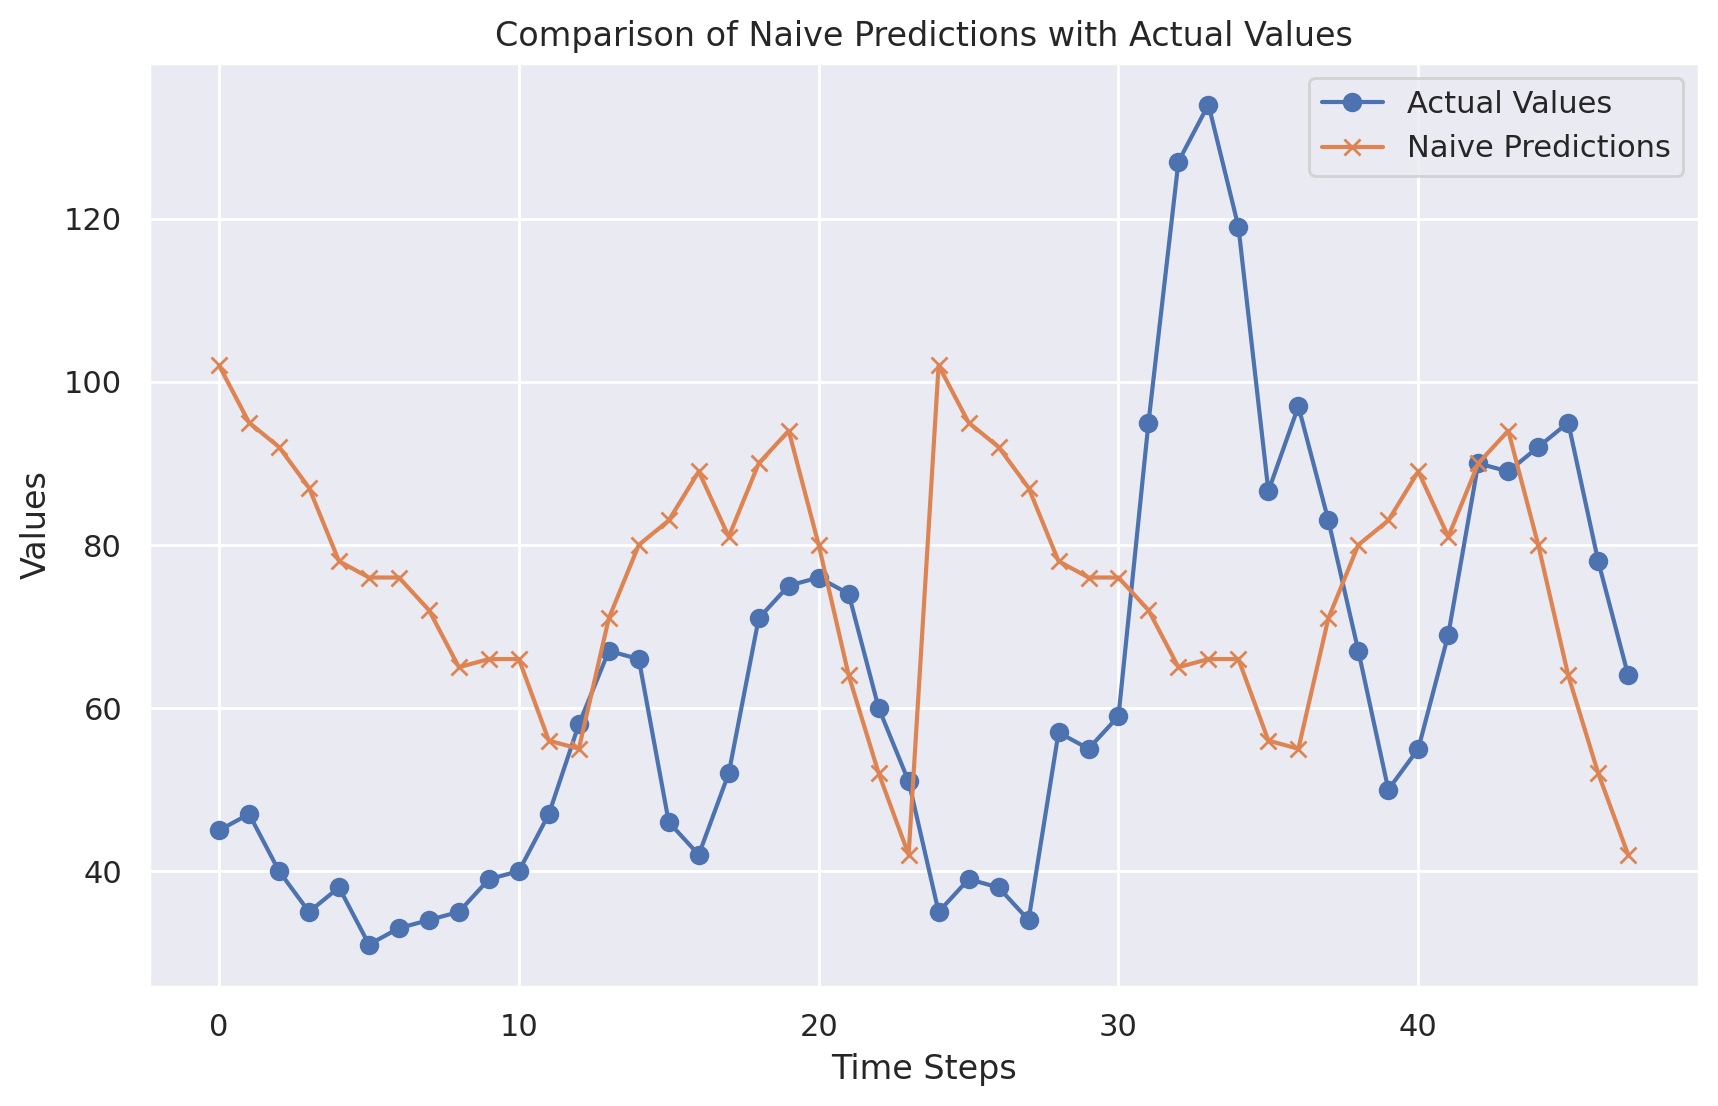

In [ ]:
sequence_index = 4
actual_values = y_flattened[sequence_index]
naive_predicted_values = naive_predictions_flattened[sequence_index]
time_steps = np.arange(0, sequence_length_y, 1)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, actual_values, label='Actual Values', marker='o')
plt.plot(time_steps, naive_predicted_values, label='Naive Predictions', marker='x')
plt.title('Comparison of Naive Predictions with Actual Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

# ROC Points

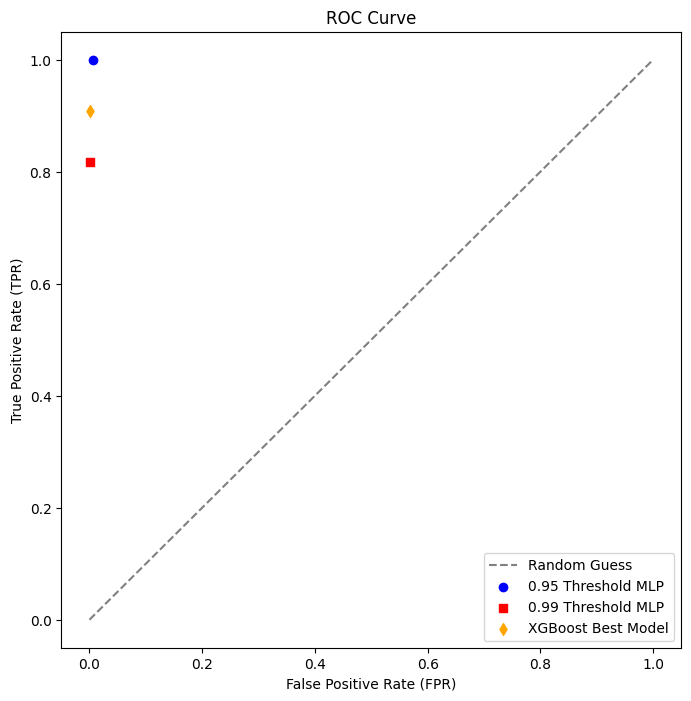

In [ ]:
confusion_matrix_1 = (26137, 156, 0, 11)
confusion_matrix_2 = (26253, 40, 2, 9)
confusion_matrix_3= (26246, 47, 1, 10)
def calculate_rates(confusion_matrix):
    TN, FP, FN, TP = confusion_matrix
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    return TPR, FPR
TPR_1, FPR_1 = calculate_rates(confusion_matrix_1)
TPR_2, FPR_2 = calculate_rates(confusion_matrix_2)
TPR_3, FPR_3 = calculate_rates(confusion_matrix_3)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.scatter(FPR_1, TPR_1, color='blue', marker='o', label='0.95 Threshold MLP')
plt.scatter(FPR_2, TPR_2, color='red', marker='s', label='0.99 Threshold MLP')
plt.scatter(FPR_3, TPR_3, color='orange', marker='d', label='XGBoost Best Model')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()


In [ ]:
FPR_1

0.002129844445289621

In [ ]:
FPR_2

0.8163265306122449

In [ ]:
TPR_1

1.0

In [ ]:
TPR_2

0.9999238240335174